Import

In [ ]:
#import library
import pandas as pd #read data
import matplotlib.pyplot as plt #draw charts
import numpy as np #data processing
from sklearn.preprocessing import MinMaxScaler #Normalize data
#from keras.callbacks import ModelCheckpoint #Save the best training
#from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
#Layers to build model
#from keras.models import Sequential #input
#from keras.layers import Bidirectional,LSTM #deep learning
#from keras.layers import Dropout,SimpleRNN,BatchNormalization #avoid learning by heart
#from keras.layers import GRU,Dense,LeakyReLU #output
#from keras.optimizers import RMSprop,Adam,AdamW    # Different optimizer
#Check the correctness of the model
from sklearn.metrics import r2_score #measure fitness
from sklearn.metrics import mean_absolute_error #do sai so tuyet doi trung binh
from sklearn.metrics import mean_absolute_percentage_error #do % sai so tuyet doi trung binh
from sklearn.metrics import mean_squared_error

In [ ]:
path = 'https://drive.google.com/uc?id=1QROS6HCnXKe7OeI1Ikhsf0cywW2yWF-9&export=download'
df = pd.read_csv(path, low_memory=False)
df = df.drop(index=0)

In [ ]:
df.shape

(336292, 8)

Data pre-processing

In [ ]:
df['MonitoringDate'] = pd.to_datetime(df['MonitoringDate'])
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

Get monitoring station with most amount of data

In [ ]:
most_occurred_count = df['MonitoringLocationIdentifier'].value_counts().idxmax()
print ("Location with the highest count: ",most_occurred_count)
filtered_df = df[df['MonitoringLocationIdentifier'] == most_occurred_count]
filtered_df.sort_values(by='MonitoringDate')

Location with the highest count:  132


MonitoringLocationIdentifier  LongitudeMeasure_WGS84  \
191986                           132              118.142558   
191987                           132              118.142558   
191988                           132              118.142558   
191989                           132              118.142558   
191990                           132              118.142558   
...                              ...                     ...   
193812                           132              118.142558   
193815                           132              118.142558   
193816                           132              118.142558   
193814                           132              118.142558   
193817                           132              118.142558   

        LatitudeMeasure_WGS84 MonitoringDate IndicatorsName  Value  Unit  \
191986              34.599912     2007-10-29           NH4N   0.20  mg/l   
191987              34.599912     2007-10-29          CODMn   3.90  mg/l   
191988              34.599912     2007-10-29             pH   8.50    pH   
191989              34.599912     2007-10-29             DO   9.79  mg/l   
191990              34.599912     2007-11-05           NH4N   0.03  mg/l   
...                       ...            ...            ...    ...   ...   
193812              34.599912     2018-12-17             pH   7.50    pH   
193815              34.599912     2018-12-24          CODMn   4.20  mg/l   
193816              34.599912     2018-12-24             pH   8.20    pH   
193814              34.599912     2018-12-24           NH4N   0.10  mg/l   
193817              34.599912     2018-12-24             DO  12.40  mg/l   

                                           SourceProvider  
191986  China National Environmental Monitoring Centre...  
191987  China National Environmental Monitoring Centre...  
191988  China National Environmental Monitoring Centre...  
191989  China National Environmental Monitoring Centre...  
191990  China National Environmental Monitoring Centre...  
...                                                   ...  
193812  China National Environmental Monitoring Centre...  
193815  China National Environmental Monitoring Centre...  
193816  China National Environmental Monitoring Centre...  
193814  China National Environmental Monitoring Centre...  
193817  China National Environmental Monitoring Centre...  

[1832 rows x 8 columns]

In [ ]:
distinct_values = filtered_df['IndicatorsName'].unique()
print(distinct_values)

['NH4N' 'CODMn' 'pH' 'DO']


In [ ]:
NH4df = filtered_df[filtered_df['IndicatorsName'] == 'NH4N']
CODdf = filtered_df[filtered_df['IndicatorsName'] == 'CODMn']
pHdf = filtered_df[filtered_df['IndicatorsName'] == 'pH']
DOdf = filtered_df[filtered_df['IndicatorsName'] == 'DO']
dfList = [NH4df,CODdf,pHdf,DOdf]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Iterate over each DataFrame in the list
for df in dfList:
    print(f"\nEDA for {df['IndicatorsName'].iloc[0]}:")

    # Summary statistics
    print("Summary Statistics:\n", df.describe())



EDA for NH4N:
Summary Statistics:
        MonitoringLocationIdentifier  LongitudeMeasure_WGS84  \
count                         458.0            4.580000e+02   
mean                          132.0            1.181426e+02   
min                           132.0            1.181426e+02   
25%                           132.0            1.181426e+02   
50%                           132.0            1.181426e+02   
75%                           132.0            1.181426e+02   
max                           132.0            1.181426e+02   
std                             0.0            3.129807e-13   

       LatitudeMeasure_WGS84                 MonitoringDate       Value  
count           4.580000e+02                            458  458.000000  
mean            3.459991e+01  2012-08-18 04:20:57.641921280    0.223908  
min             3.459991e+01            2007-10-29 00:00:00    0.010000  
25%             3.459991e+01            2010-04-06 18:00:00    0.130000  
50%             3.459991e+

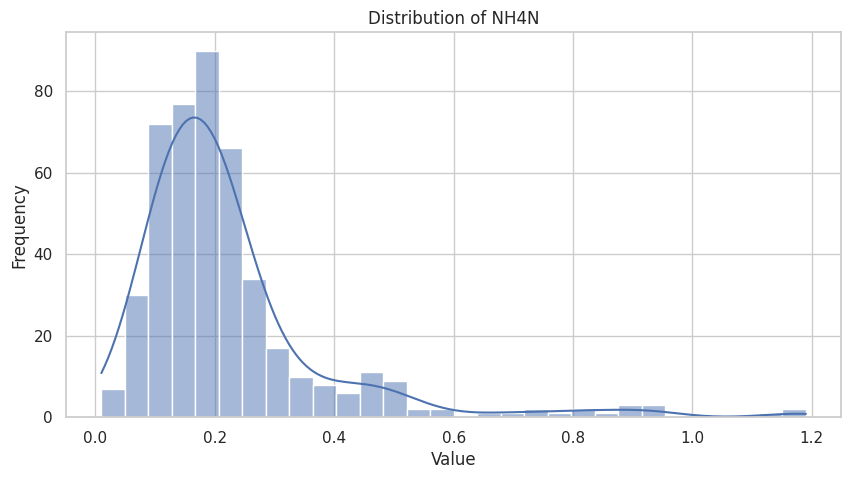

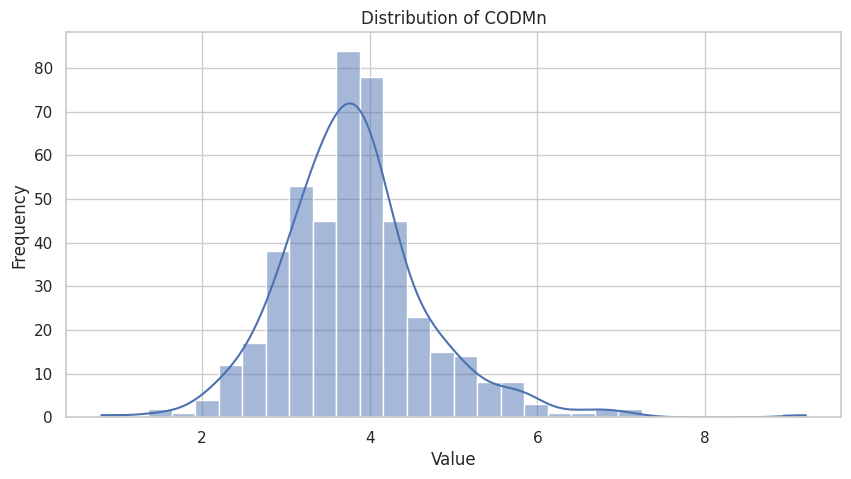

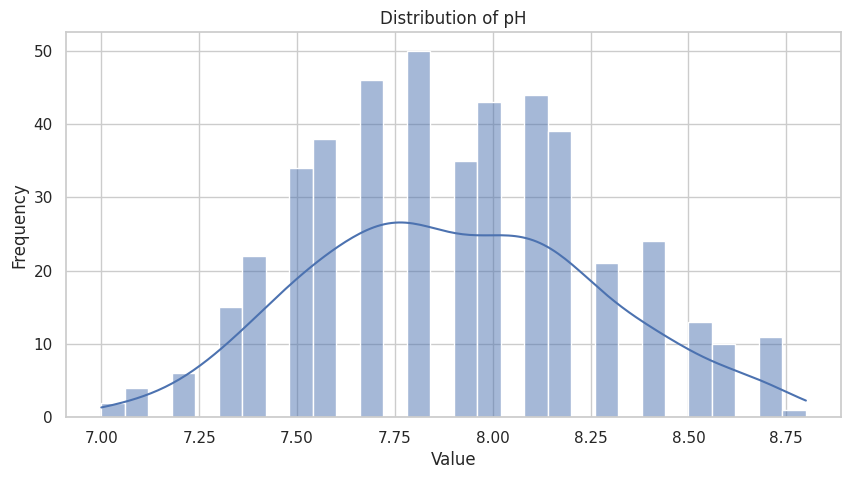

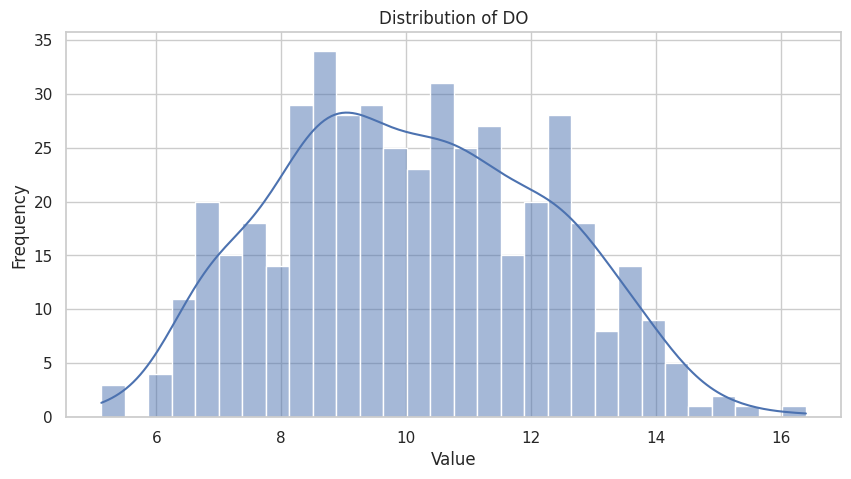

In [ ]:
# Set up visualization style
sns.set(style="whitegrid")

# Plot distributions
for df in dfList:
    plt.figure(figsize=(10, 5))
    sns.histplot(df['Value'], kde=True, bins=30)
    plt.title(f"Distribution of {df['IndicatorsName'].iloc[0]}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()


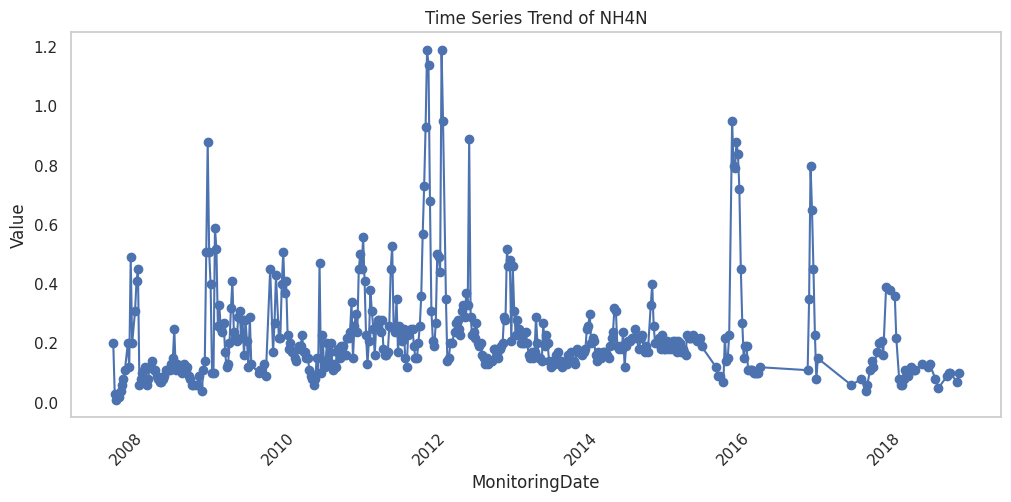

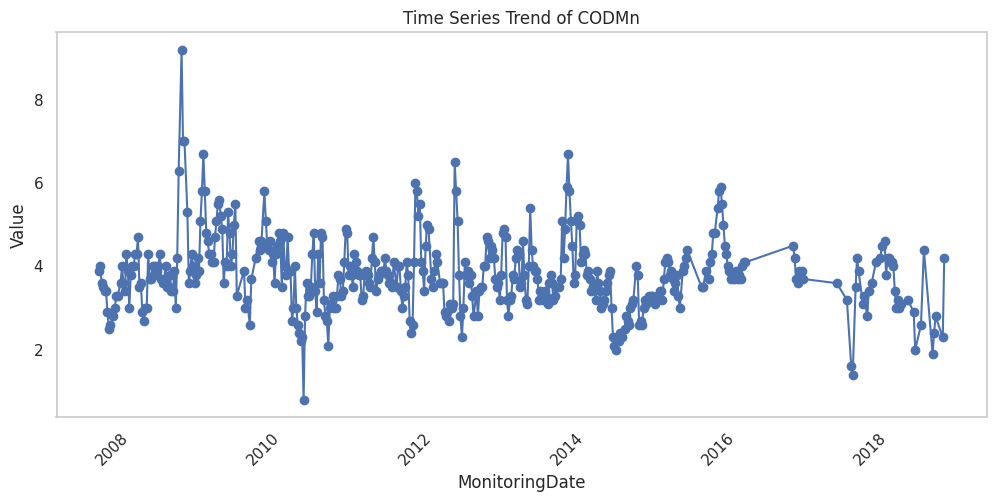

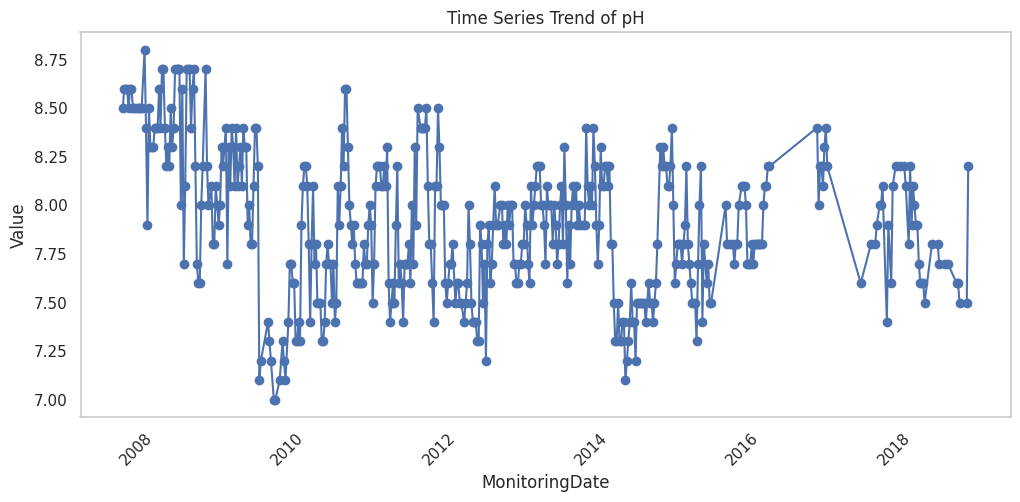

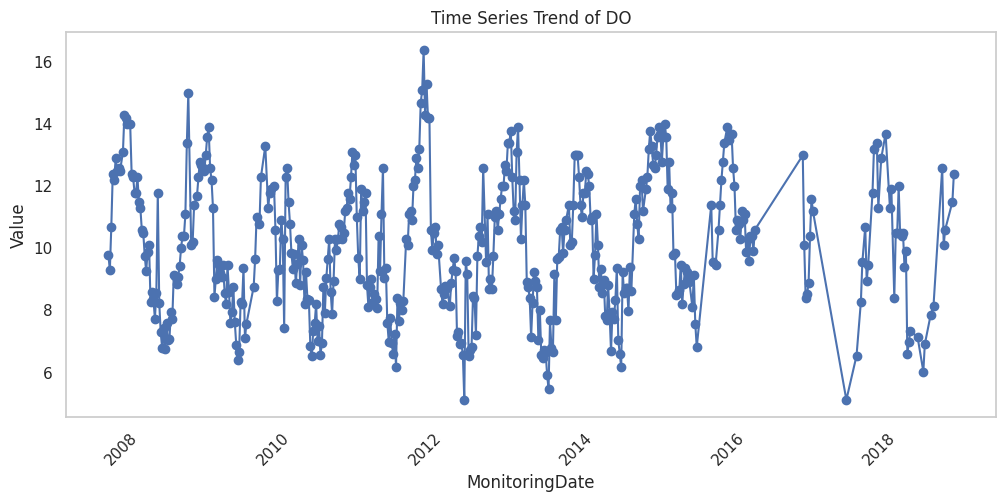

In [ ]:
for df in dfList:
    if 'MonitoringDate' in df.columns:
        df_sorted = df.sort_values(by='MonitoringDate')  # Ensure chronological order
        plt.figure(figsize=(12, 5))
        plt.plot(df_sorted['MonitoringDate'], df_sorted['Value'], marker='o', linestyle='-')
        plt.title(f"Time Series Trend of {df['IndicatorsName'].iloc[0]}")
        plt.xlabel("MonitoringDate")
        plt.ylabel("Value")
        plt.xticks(rotation=45)
        plt.grid()
        plt.show()


Boxplot

<ipython-input-10-c296f341265f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
<ipython-input-10-c296f341265f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
<ipython-input-10-c296f341265f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

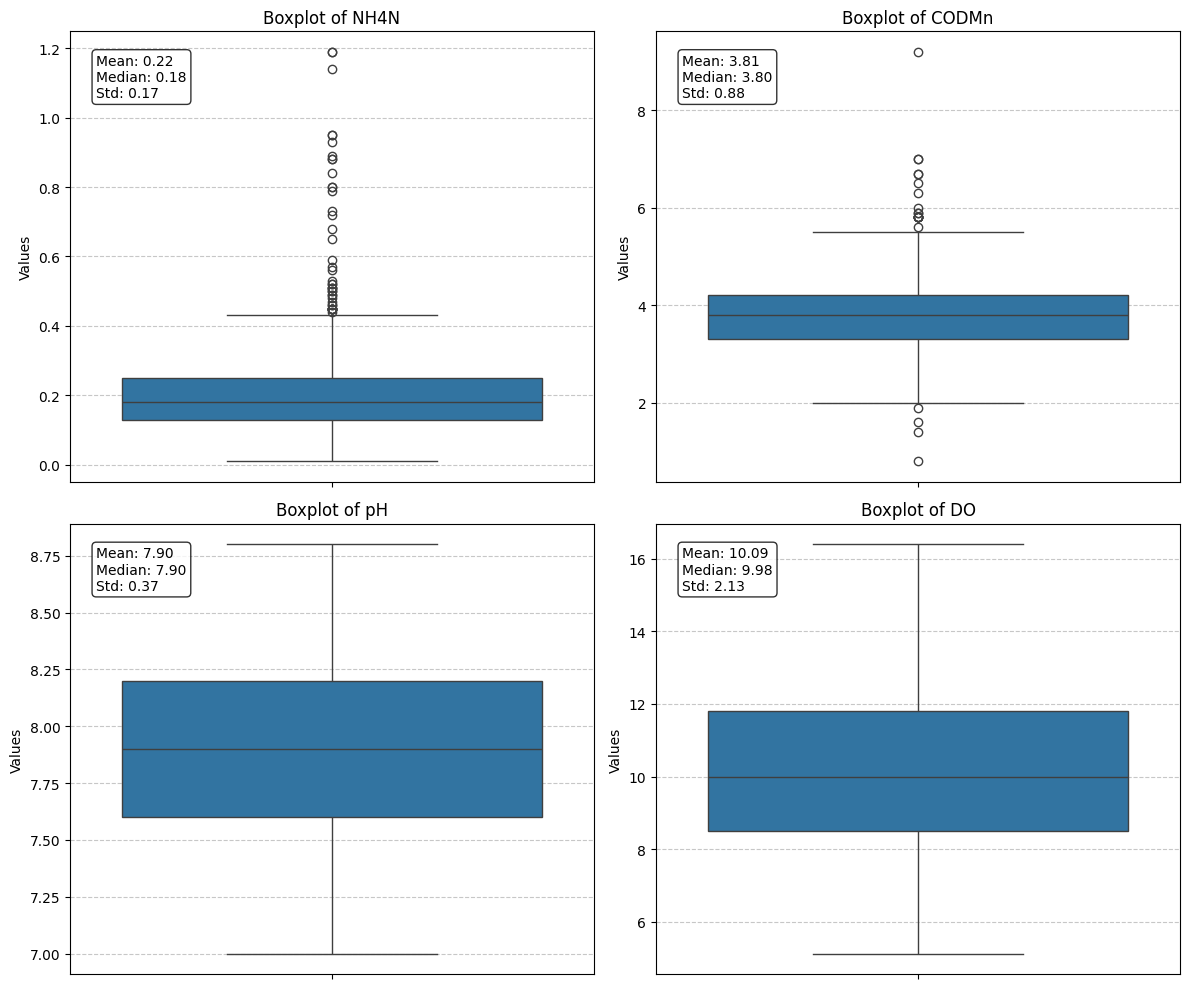

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# List of DataFrames and their names
dfList = [NH4df, CODdf, pHdf, DOdf]
df_names = ['NH4N', 'CODMn', 'pH', 'DO']

# Creating subplots for each DataFrame
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flattening the axes for easy iteration
axes = axes.flatten()

# Plotting each boxplot with error handling
for i, (df, name) in enumerate(zip(dfList, df_names)):
    # First ensure values are numeric
    try:
        # Check if 'Value' column contains strings that need conversion
        if df['Value'].dtype == 'object':
            # Try to convert directly - will work if simple strings of numbers
            df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

        # Create boxplot only with valid numeric data
        sns.boxplot(y=df['Value'].dropna(), ax=axes[i])

        # Calculate statistics (only on numeric values)
        mean_val = df['Value'].mean()
        median_val = df['Value'].median()
        std_val = df['Value'].std()

        # Add statistics text
        stats_text = f"Mean: {mean_val:.2f}\nMedian: {median_val:.2f}\nStd: {std_val:.2f}"
        axes[i].text(0.05, 0.95, stats_text, transform=axes[i].transAxes,
                     fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    except Exception as e:
        # If there's an error, print a message on the plot
        axes[i].text(0.5, 0.5, f"Could not plot: {str(e)}",
                     ha='center', va='center', transform=axes[i].transAxes)

    # Set title and labels
    axes[i].set_title(f"Boxplot of {name}")
    axes[i].set_ylabel("Values")
    axes[i].grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

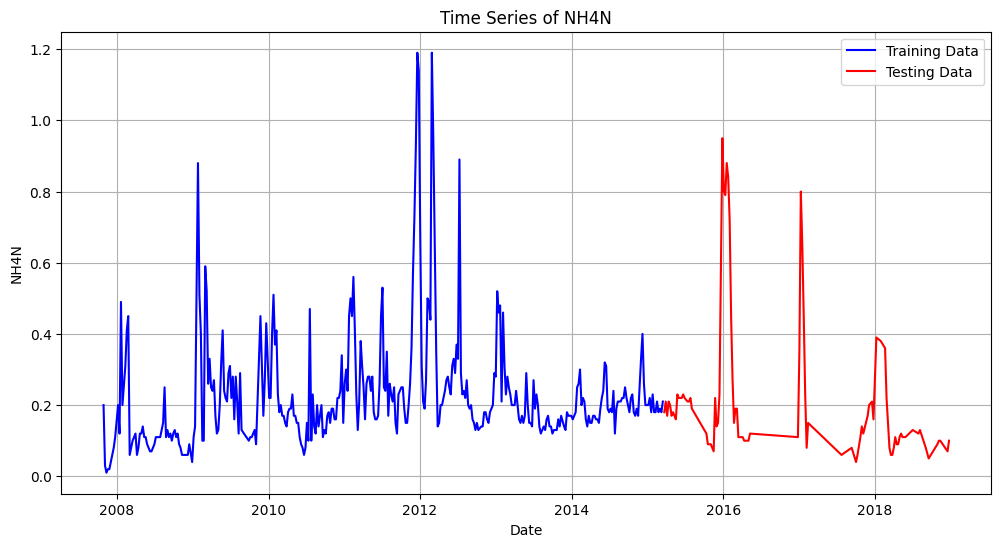

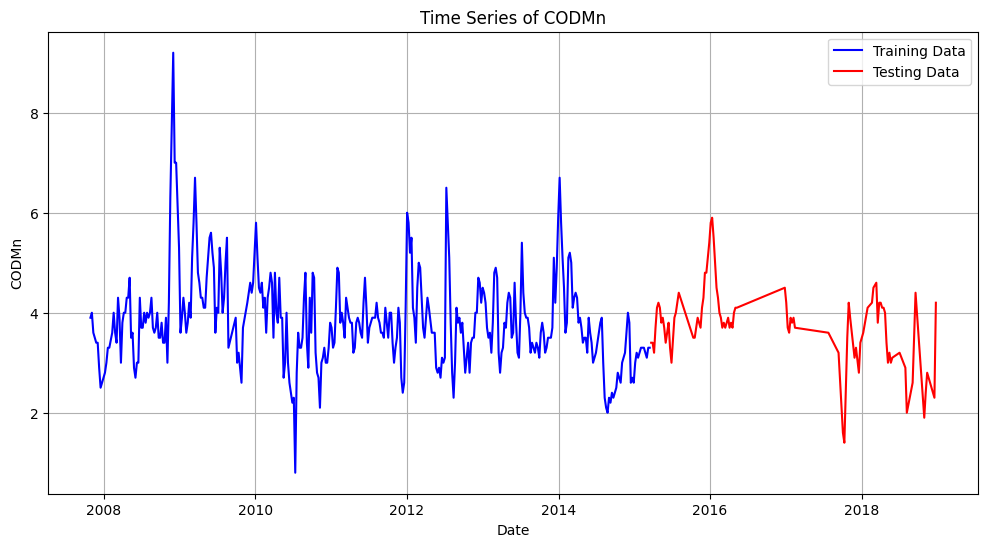

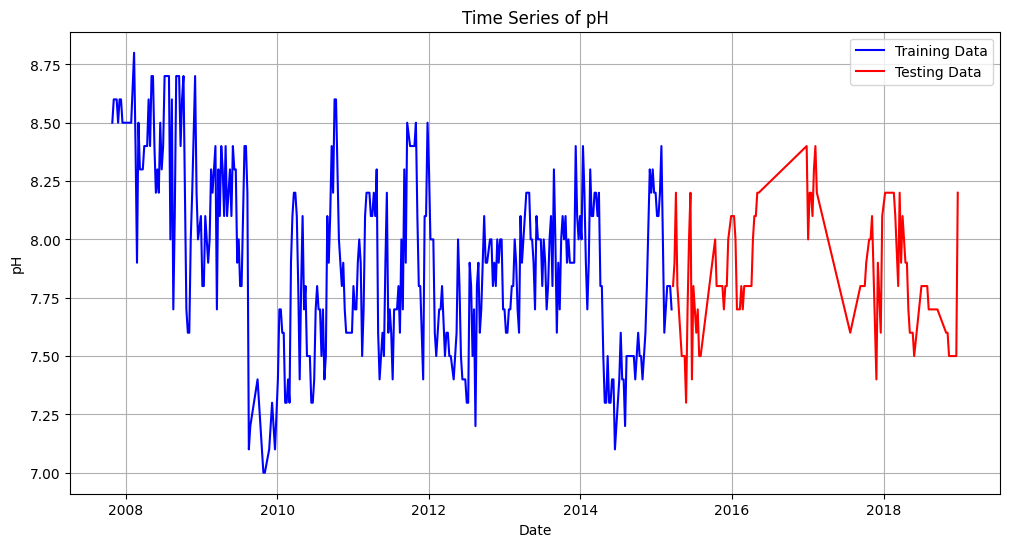

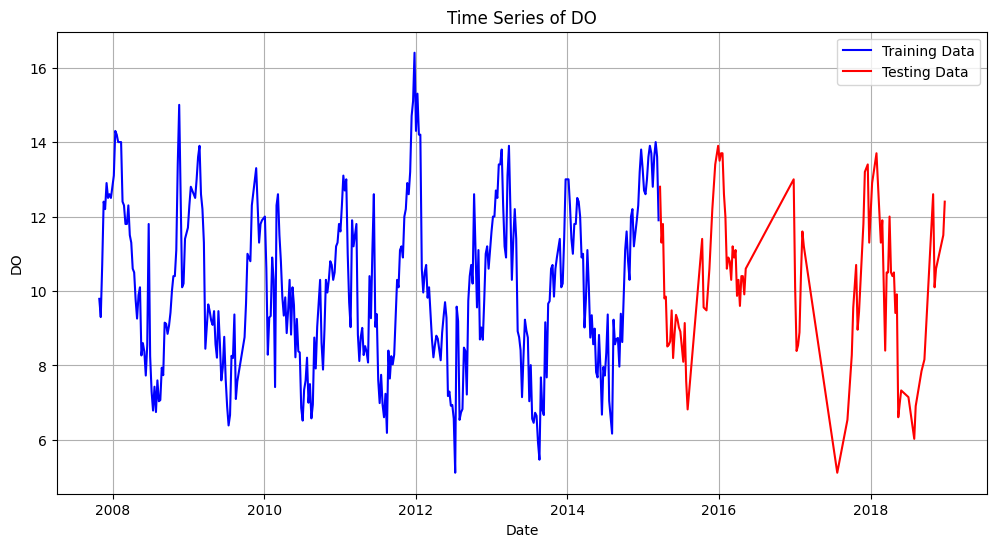

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

df_names = ['NH4N', 'CODMn', 'pH', 'DO']

for df, name in zip(dfList, df_names):
    # Splitting data into 80% training and 20% testing
    train, test = train_test_split(df, test_size=0.2, shuffle=False)

    plt.figure(figsize=(12, 6))

    # Plot training data
    plt.plot(train['MonitoringDate'], train['Value'], label='Training Data', color='blue')

    # Plot testing data
    plt.plot(test['MonitoringDate'], test['Value'], label='Testing Data', color='red')

    plt.title(f'Time Series of {name}')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend()
    plt.grid(True)
    plt.show()


S-ARIMA

Processing DataFrame 1...
ARIMA model for DataFrame 1:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  366
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 276.991
Date:                Sat, 29 Mar 2025   AIC                           -547.981
Time:                        08:43:20   BIC                           -536.273
Sample:                             0   HQIC                          -543.329
                                - 366                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0684      0.012      5.512      0.000       0.044       0.093
ar.L1          0.6974      0.023     30.873      0.000       0.653       0.7

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Metrics for DataFrame 1:
  Highest RMSE: 0.722
  Overall RMSE: 0.115
  Overall MAE: 0.063


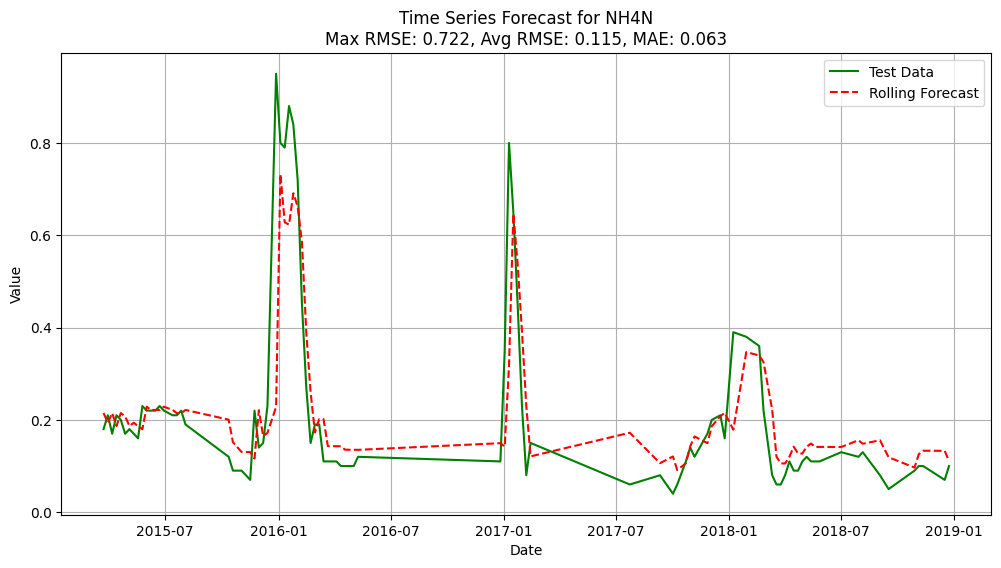

Processing DataFrame 2...
ARIMA model for DataFrame 2:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  366
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -363.224
Date:                Sat, 29 Mar 2025   AIC                            728.448
Time:                        08:43:28   BIC                            732.348
Sample:                             0   HQIC                           729.998
                                - 366                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.4284      0.019     22.235      0.000       0.391       0.466
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Metrics for DataFrame 2:
  Highest RMSE: 2.500
  Overall RMSE: 0.586
  Overall MAE: 0.382


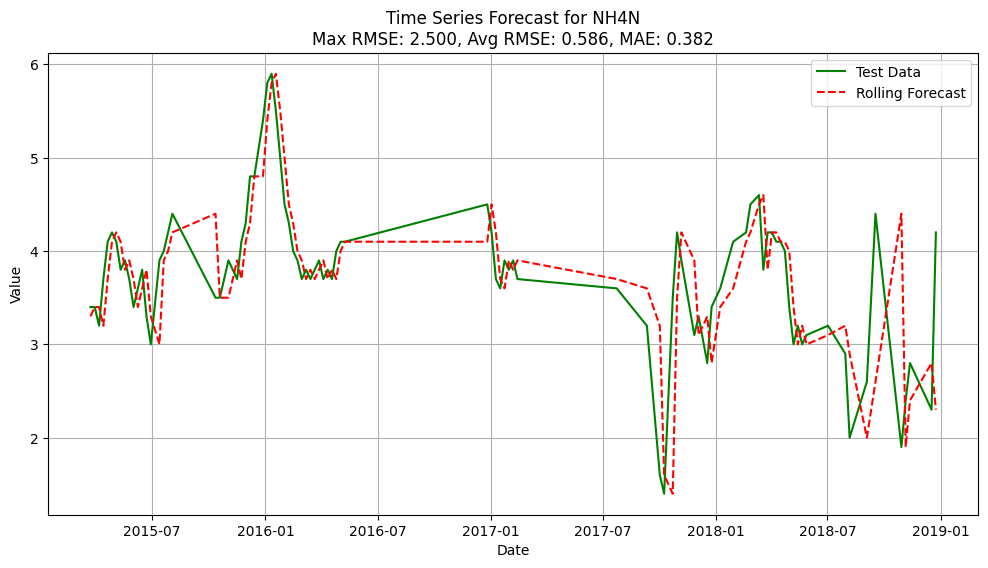

Processing DataFrame 3...
ARIMA model for DataFrame 3:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  366
Model:               SARIMAX(2, 1, 1)   Log Likelihood                  16.876
Date:                Sat, 29 Mar 2025   AIC                            -25.753
Time:                        08:43:41   BIC                            -10.153
Sample:                             0   HQIC                           -19.553
                                - 366                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6421      0.054     11.859      0.000       0.536       0.748
ar.L2          0.0954      0.046      2.077      0.038       0.005       0.1

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Metrics for DataFrame 3:
  Highest RMSE: 0.684
  Overall RMSE: 0.210
  Overall MAE: 0.155


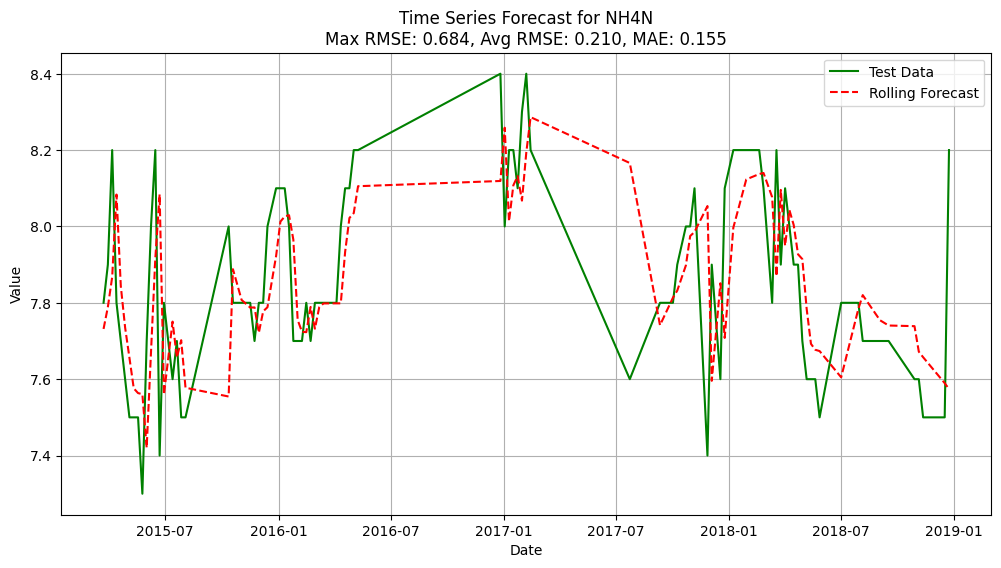

Processing DataFrame 4...
ARIMA model for DataFrame 4:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  366
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -558.787
Date:                Sat, 29 Mar 2025   AIC                           1125.574
Time:                        08:43:53   BIC                           1141.185
Sample:                             0   HQIC                          1131.777
                                - 366                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.0472      0.285      3.668      0.000       0.488       1.607
ar.L1          0.8963      0.028     31.974      0.000       0.841       0.9

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Metrics for DataFrame 4:
  Highest RMSE: 5.964
  Overall RMSE: 1.410
  Overall MAE: 1.008


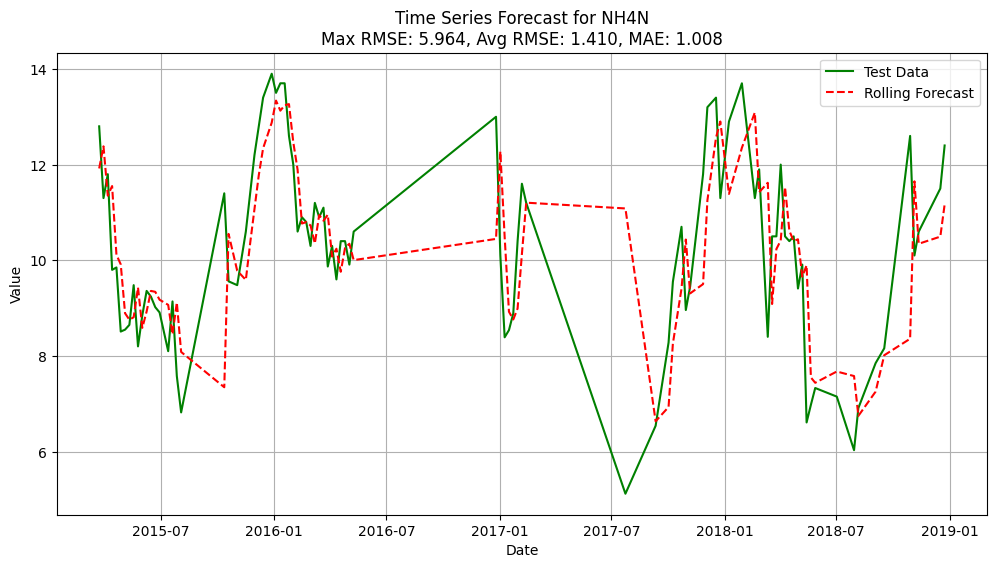

In [ ]:
!pip install pmdarima
!pip install numpy==1.23.5
import pmdarima as pm
import matplotlib.pyplot as plt
from pandas import to_datetime
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error
import numpy as np

import warnings

# Suppress sklearn deprecation warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Iterate through each DataFrame in the list
for i, df2 in enumerate(dfList):

    # Train-test split (80-20)
    split_idx = int(len(df2) * 0.8)
    train = df2.iloc[:split_idx]
    test = df2.iloc[split_idx:].copy()

    # Auto ARIMA model fitting on the training data
    print(f"Processing DataFrame {i + 1}...")
    model = pm.auto_arima(train['Value'],
                          seasonal=True,  # Change to True if seasonality is expected
                          stepwise=True,
                          error_action='ignore',
                          suppress_warnings=True)

    # Print the summary of the ARIMA model
    print(f"ARIMA model for DataFrame {i + 1}:")
    print(model.summary())

    # Rolling forecast every 1 value
    step_size = 1
    forecast_values = []
    conf_int_values = []
    individual_rmse = []
    all_actual_values = []  # To store all actual values for overall MAE calculation

    for start in range(0, len(test), step_size):
        end = min(start + step_size, len(test))
        forecast, conf_int = model.predict(n_periods=(end - start), return_conf_int=True)
        forecast_values.extend(forecast)
        conf_int_values.extend(conf_int)

        # Store actual values for overall MAE calculation
        actual_values = test.iloc[start:end]['Value'].values
        all_actual_values.extend(actual_values)

        # Compute RMSE for each prediction step
        rmse_step = np.sqrt(mean_squared_error(actual_values, forecast))
        individual_rmse.append(rmse_step)

        # Update model with new observations
        model.update(actual_values)

    # Convert forecast lists to numpy arrays
    forecast_values = np.array(forecast_values)
    conf_int_values = np.array(conf_int_values)
    all_actual_values = np.array(all_actual_values)

    # Calculate highest and average RMSE across individual predictions
    max_rmse = np.max(individual_rmse)
    avg_rmse = np.mean(individual_rmse)

    # Calculate overall MAE using all predictions together
    overall_mae = mean_absolute_error(all_actual_values, forecast_values)
    overall_rmse = np.sqrt(mean_squared_error(all_actual_values, forecast_values))

    print(f"Metrics for DataFrame {i + 1}:")
    print(f"  Highest RMSE: {max_rmse:.3f}")
    print(f"  Overall RMSE: {overall_rmse:.3f}")
    print(f"  Overall MAE: {overall_mae:.3f}")

    # Plot the training data, test data, and forecasts
    plt.figure(figsize=(12, 6))
    plt.plot(train['MonitoringDate'], train['Value'], label='Training Data')
    plt.plot(test['MonitoringDate'], test['Value'], label='Test Data',color='green')
    plt.plot(test['MonitoringDate'], forecast_values,'r--', label='Rolling Forecast')

    plt.title(f'ARIMA Time Series Forecast for NH4N\nMax RMSE: {max_rmse:.3f}, Avg RMSE: {overall_rmse:.3f}, MAE: {overall_mae:.3f}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

ETS Model

Processing DataFrame 1...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Metrics for DataFrame 1:
  Highest RMSE: 0.712
  Overall RMSE: 0.121
  Overall MAE: 0.064


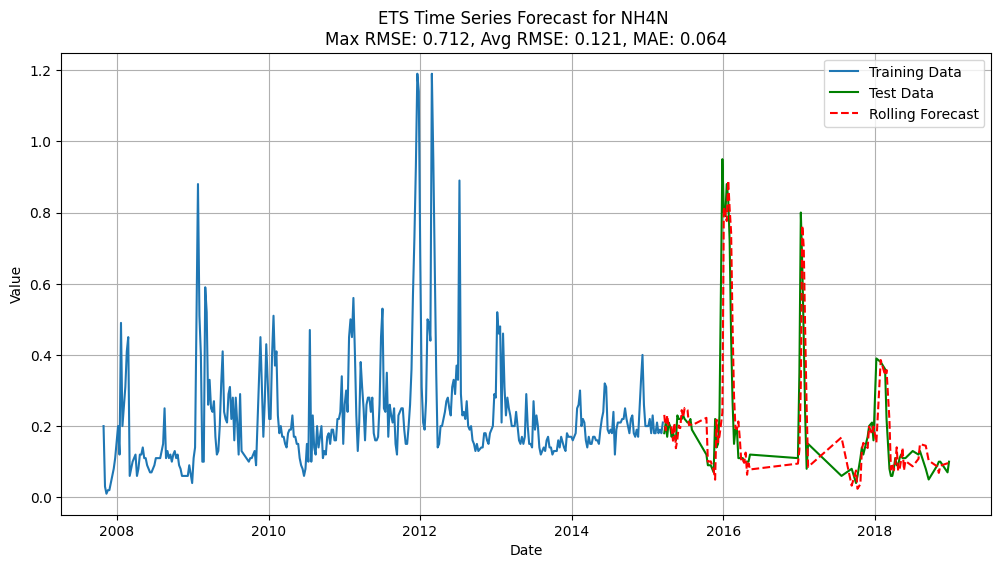

Processing DataFrame 2...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Metrics for DataFrame 2:
  Highest RMSE: 2.449
  Overall RMSE: 0.598
  Overall MAE: 0.408


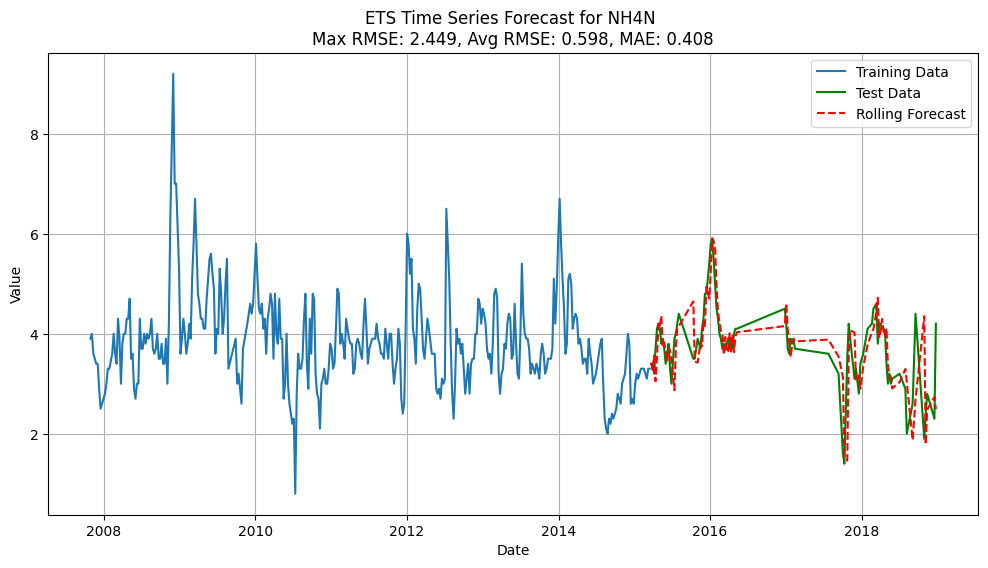

Processing DataFrame 3...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Metrics for DataFrame 3:
  Highest RMSE: 0.738
  Overall RMSE: 0.221
  Overall MAE: 0.150


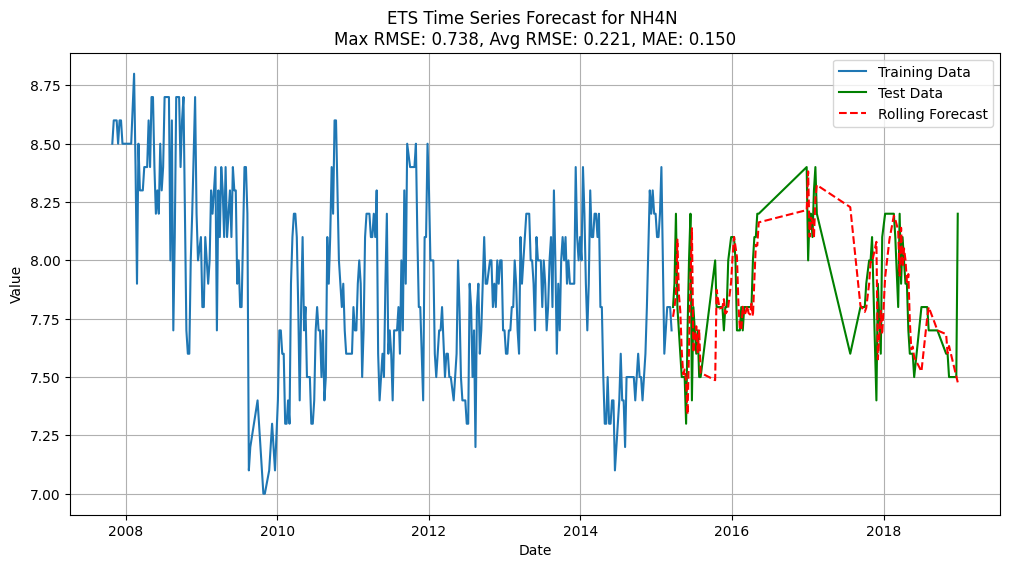

Processing DataFrame 4...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Metrics for DataFrame 4:
  Highest RMSE: 6.279
  Overall RMSE: 1.493
  Overall MAE: 1.050


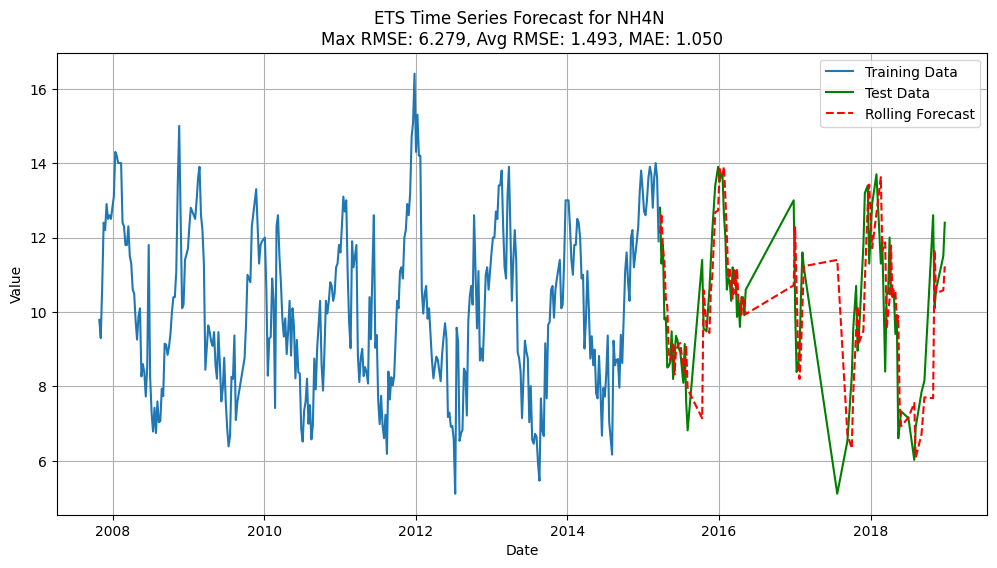

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import to_datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Iterate through each DataFrame in the list
for i, df2 in enumerate(dfList):

    # Train-test split (80-20)
    split_idx = int(len(df2) * 0.8)
    train = df2.iloc[:split_idx]
    test = df2.iloc[split_idx:].copy()

    print(f"Processing DataFrame {i + 1}...")

    # Fit ETS model on training data
    model = ExponentialSmoothing(train['Value'], trend='add', seasonal='add', seasonal_periods=12).fit()

    # Rolling forecast every 1 value
    step_size = 1
    forecast_values = []
    individual_rmse = []
    all_actual_values = []

    for start in range(0, len(test), step_size):
        end = min(start + step_size, len(test))
        forecast = model.forecast(steps=(end - start))
        forecast_values.extend(forecast)

        # Store actual values
        actual_values = test.iloc[start:end]['Value'].values
        all_actual_values.extend(actual_values)

        # Compute RMSE for each step
        rmse_step = np.sqrt(mean_squared_error(actual_values, forecast))
        individual_rmse.append(rmse_step)

        # Update model with new observations
        model = ExponentialSmoothing(np.append(train['Value'].values, all_actual_values),
                                     trend='add', seasonal='add', seasonal_periods=12).fit()

    # Convert forecast lists to numpy arrays
    forecast_values = np.array(forecast_values)
    all_actual_values = np.array(all_actual_values)

    # Calculate highest and average RMSE
    max_rmse = np.max(individual_rmse)
    avg_rmse = np.mean(individual_rmse)

    # Calculate overall MAE and RMSE
    overall_mae = mean_absolute_error(all_actual_values, forecast_values)
    overall_rmse = np.sqrt(mean_squared_error(all_actual_values, forecast_values))

    print(f"Metrics for DataFrame {i + 1}:")
    print(f"  Highest RMSE: {max_rmse:.3f}")
    print(f"  Overall RMSE: {overall_rmse:.3f}")
    print(f"  Overall MAE: {overall_mae:.3f}")

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(train['MonitoringDate'], train['Value'], label='Training Data')
    plt.plot(test['MonitoringDate'], test['Value'], label='Test Data', color='green')
    plt.plot(test['MonitoringDate'], forecast_values,'r--', label='Rolling Forecast')

    plt.title(f'ETS Time Series Forecast for NH4N \nMax RMSE: {max_rmse:.3f}, Avg RMSE: {overall_rmse:.3f}, MAE: {overall_mae:.3f}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()


LSTM (not included due to poor performance)


Processing DataFrame 1...
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0397
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0181
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0182
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0148
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0144
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0125
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0171
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0135
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0143
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0154
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0142
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0128
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0151
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0166
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0125
Epoch 16/50
23/

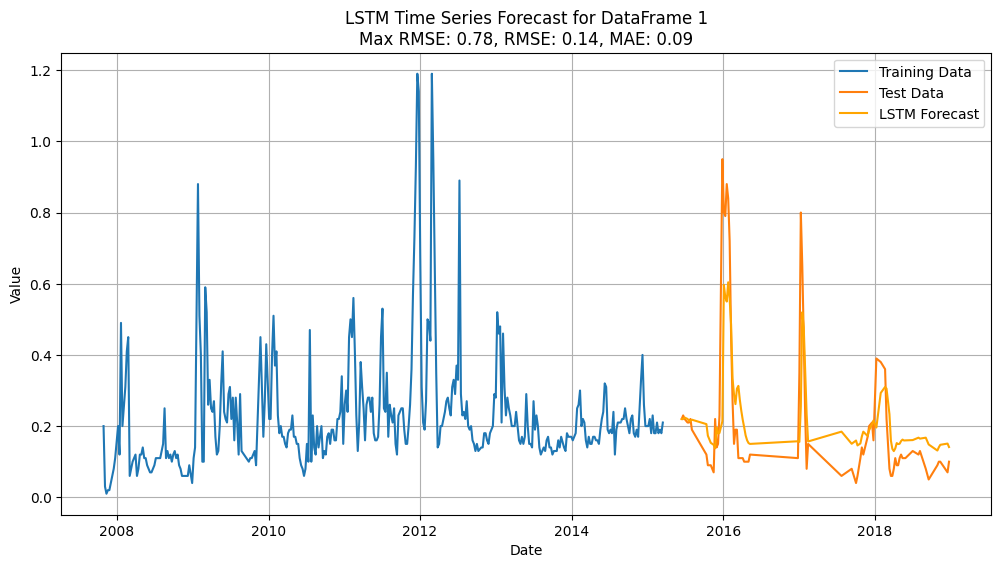

Processing DataFrame 2...
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0952
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0140
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0098
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0112
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0128
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0110
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0125
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0118
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0116
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0101
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0104
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0091
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0114
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0088
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0105
Epoch 16/50
23/

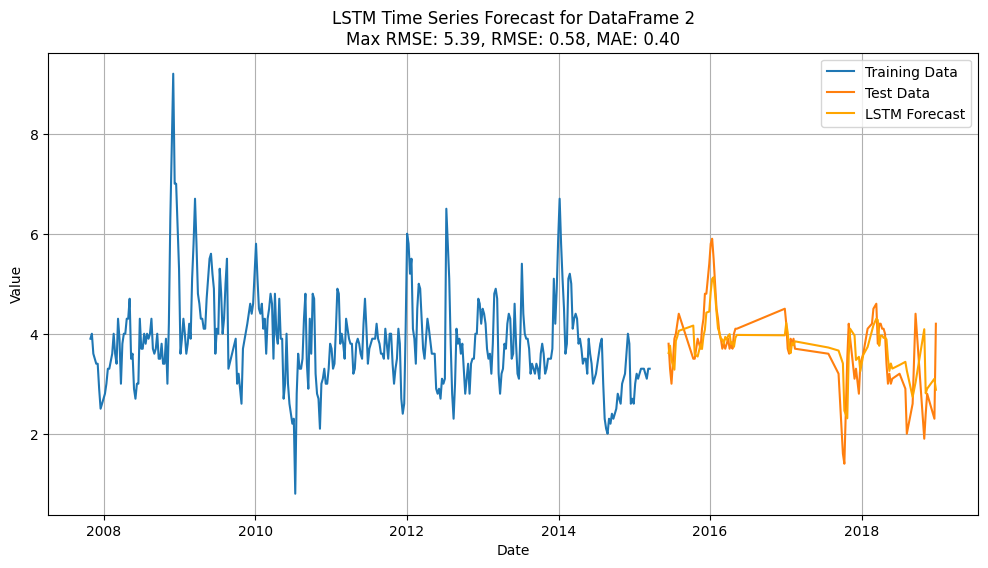

Processing DataFrame 3...
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.2420
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0396
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0295
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0321
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0315
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0276
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0308
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0266
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0260
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0253
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0266
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0290
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0244
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0235
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0253
Epoch 16/50
23/

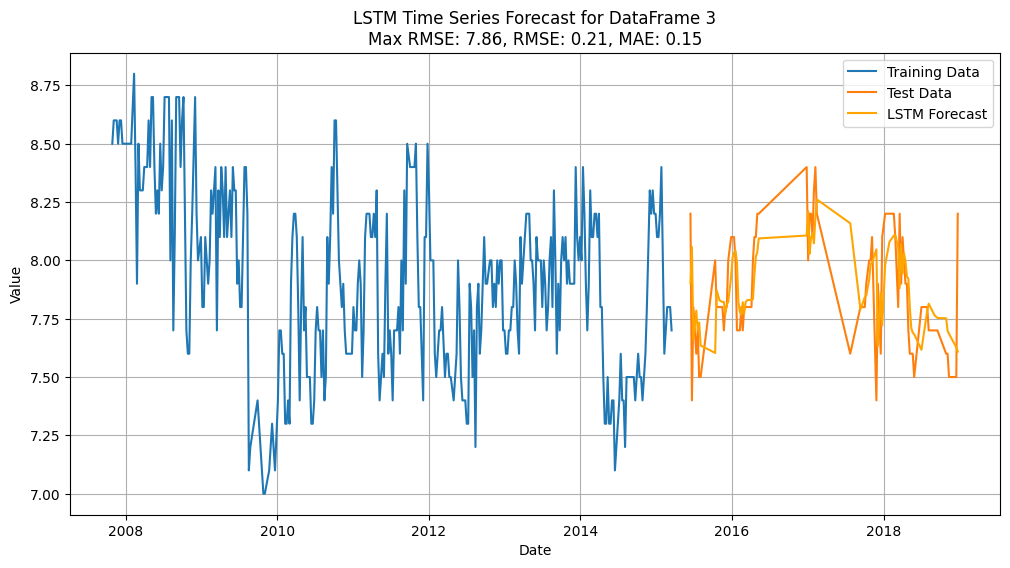

Processing DataFrame 4...
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1649
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0338
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0248
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0255
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0245
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0245
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0233
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0214
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0194
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0247
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0161
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0154
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0165
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0155
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0145
Epoch 16/50
23/

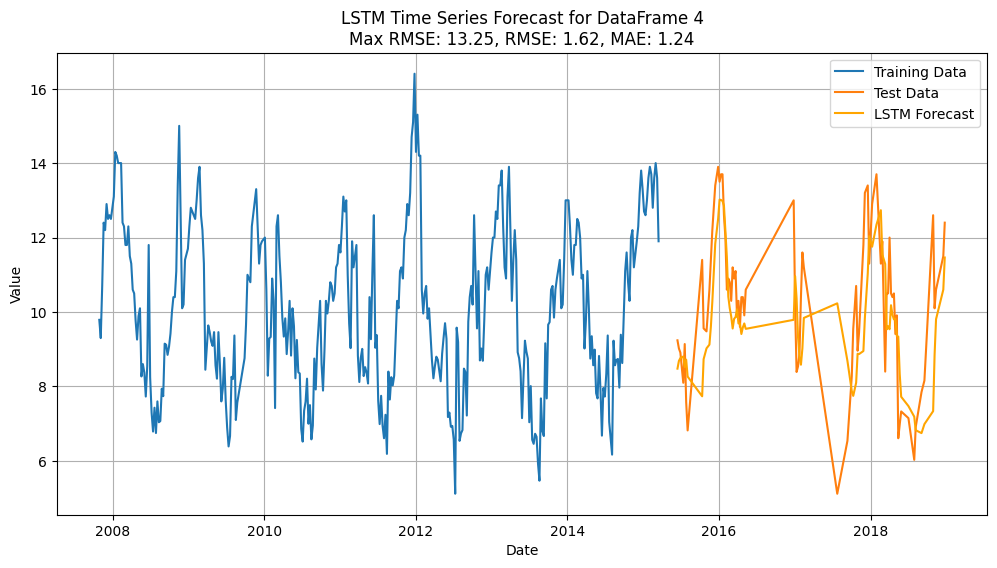

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 12  # Define sequence length for LSTM input

for i, df2 in enumerate(dfList):
    print(f"Processing DataFrame {i + 1}...")

    # Train-test split (80-20)
    split_idx = int(len(df2) * 0.8)
    train = df2.iloc[:split_idx]
    test = df2.iloc[split_idx:].copy()

    # Normalize data
    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(train[['Value']])
    test_scaled = scaler.transform(test[['Value']])

    # Prepare sequences
    X_train, y_train = create_sequences(train_scaled, seq_length)
    X_test, y_test = create_sequences(test_scaled, seq_length)

    # Reshape for LSTM input
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Build LSTM model
    model = Sequential([
        LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
        LSTM(50, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

    # Train model
    model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

    # Forecasting
    forecast_values = []
    actual_values = test['Value'].values[seq_length:]
    input_seq = X_test[0]
    individual_rmse = []

    for idx in range(len(test) - seq_length):
        prediction = model.predict(input_seq.reshape(1, seq_length, 1), verbose=0)
        forecast_values.append(prediction[0, 0])

        # Use last real data instead of predicted value
        input_seq = np.roll(input_seq, -1)
        input_seq[-1] = test_scaled[seq_length + idx]

        # Compute RMSE for each step
        rmse_step = np.sqrt(mean_squared_error([actual_values[idx]], [forecast_values[idx]]))
        individual_rmse.append(rmse_step)

    # Inverse transform predictions
    forecast_values = scaler.inverse_transform(np.array(forecast_values).reshape(-1, 1)).flatten()

    # Calculate metrics
    overall_mae = mean_absolute_error(actual_values, forecast_values)
    overall_rmse = np.sqrt(mean_squared_error(actual_values, forecast_values))
    max_rmse = np.max(individual_rmse)

    print(f"Metrics for DataFrame {i + 1}:")
    print(f"  Highest RMSE: {max_rmse:.3f}")
    print(f"  Overall RMSE: {overall_rmse:.3f}")
    print(f"  Overall MAE: {overall_mae:.3f}")

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(train['MonitoringDate'], train['Value'], label='Training Data')
    plt.plot(test['MonitoringDate'][seq_length:], test['Value'].values[seq_length:], label='Test Data')
    plt.plot(test['MonitoringDate'][seq_length:], forecast_values, label='LSTM Forecast', color='orange')

    plt.title(f'LSTM Time Series Forecast for DataFrame {i + 1}\nMax RMSE: {max_rmse:.2f}, RMSE: {overall_rmse:.2f}, MAE: {overall_mae:.2f}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()


XGBOOST + RANDOM FOREST

<ipython-input-7-d2f1470bd1b6>:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_col] = pd.to_datetime(df[date_col])



Training XGBoost Model for DataFrame 1...

XGBoost Metrics:
  MAE: 0.085
  RMSE: 0.140
  Highest RMSE: 0.761
  MAPE: 56.302%
  R^2: 0.515


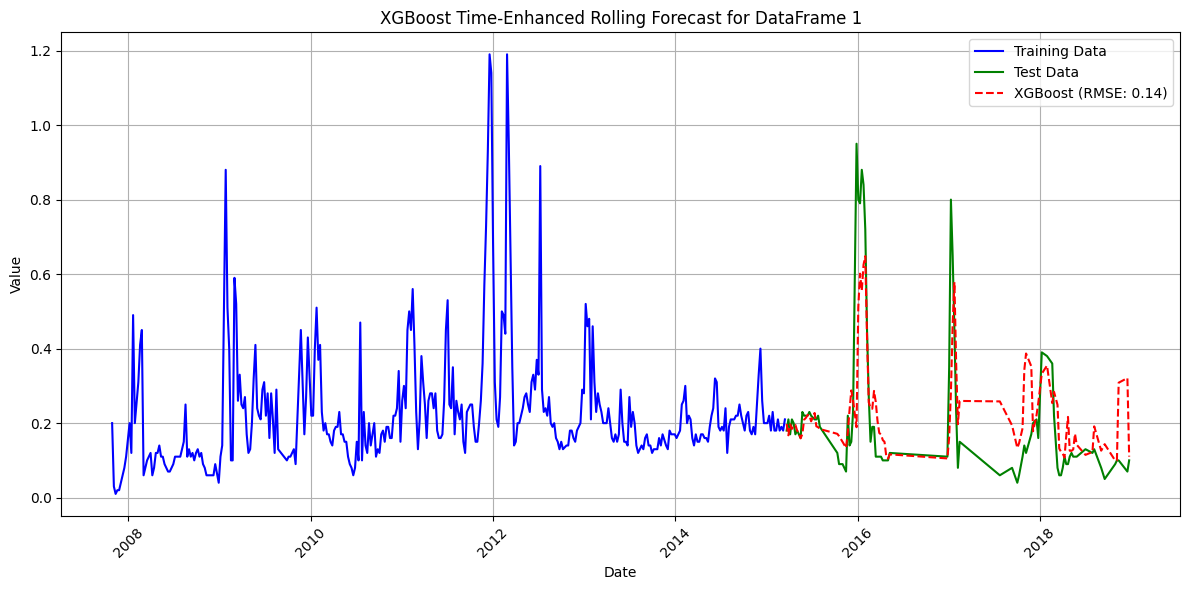


Training Random Forest Model for DataFrame 1...

Random Forest Metrics:
  MAE: 0.080
  RMSE: 0.127
  Highest RMSE: 0.683
  MAPE: 50.894%
  R^2: 0.601


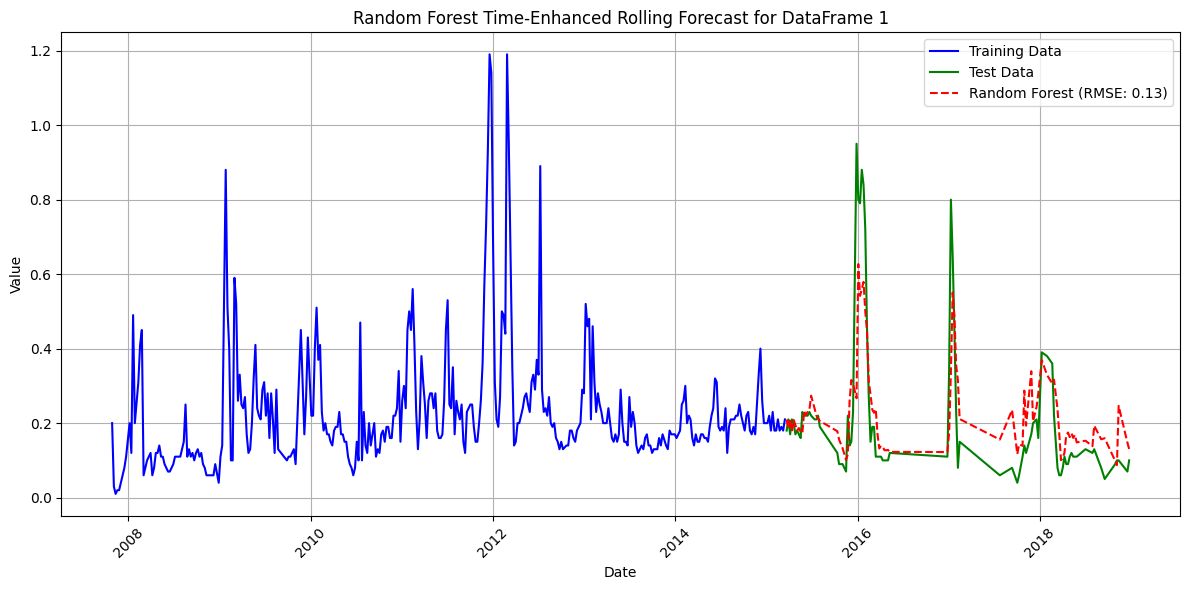

<ipython-input-7-d2f1470bd1b6>:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_col] = pd.to_datetime(df[date_col])



Training XGBoost Model for DataFrame 2...

XGBoost Metrics:
  MAE: 0.430
  RMSE: 0.559
  Highest RMSE: 1.874
  MAPE: 13.083%
  R^2: 0.476


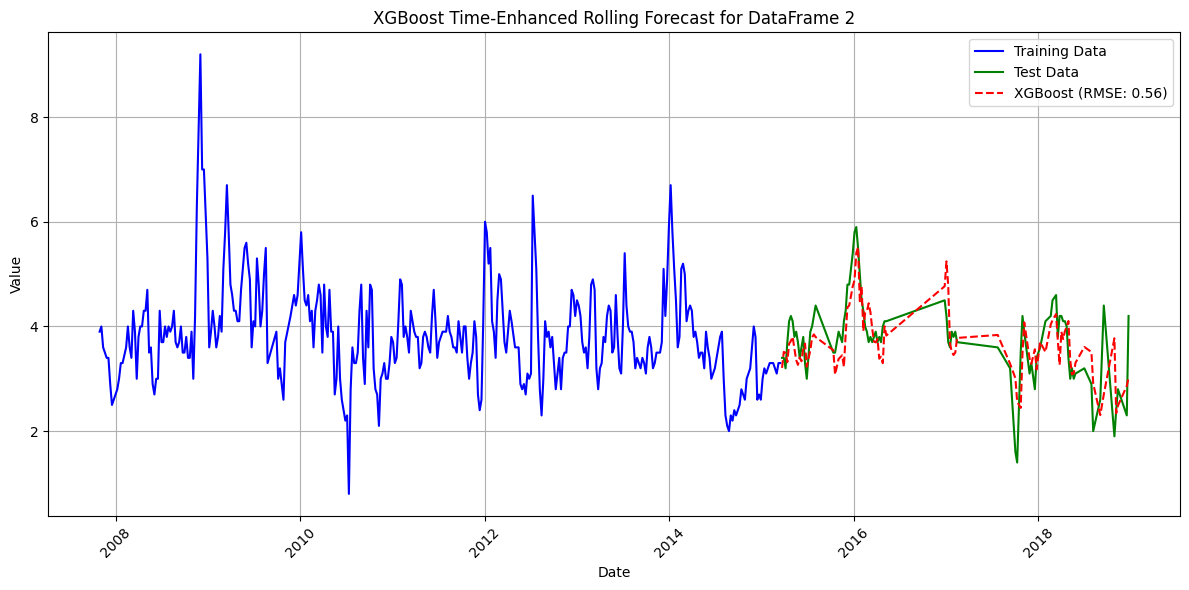


Training Random Forest Model for DataFrame 2...

Random Forest Metrics:
  MAE: 0.386
  RMSE: 0.559
  Highest RMSE: 2.498
  MAPE: 12.437%
  R^2: 0.475


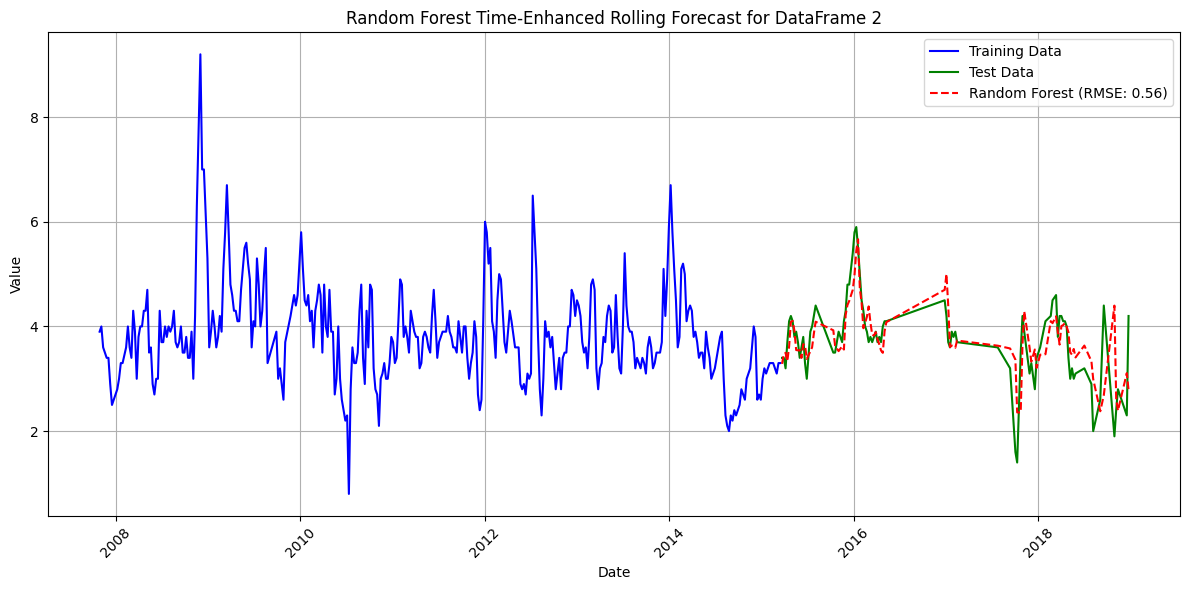

<ipython-input-7-d2f1470bd1b6>:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_col] = pd.to_datetime(df[date_col])



Training XGBoost Model for DataFrame 3...

XGBoost Metrics:
  MAE: 0.168
  RMSE: 0.209
  Highest RMSE: 0.586
  MAPE: 2.141%
  R^2: 0.294


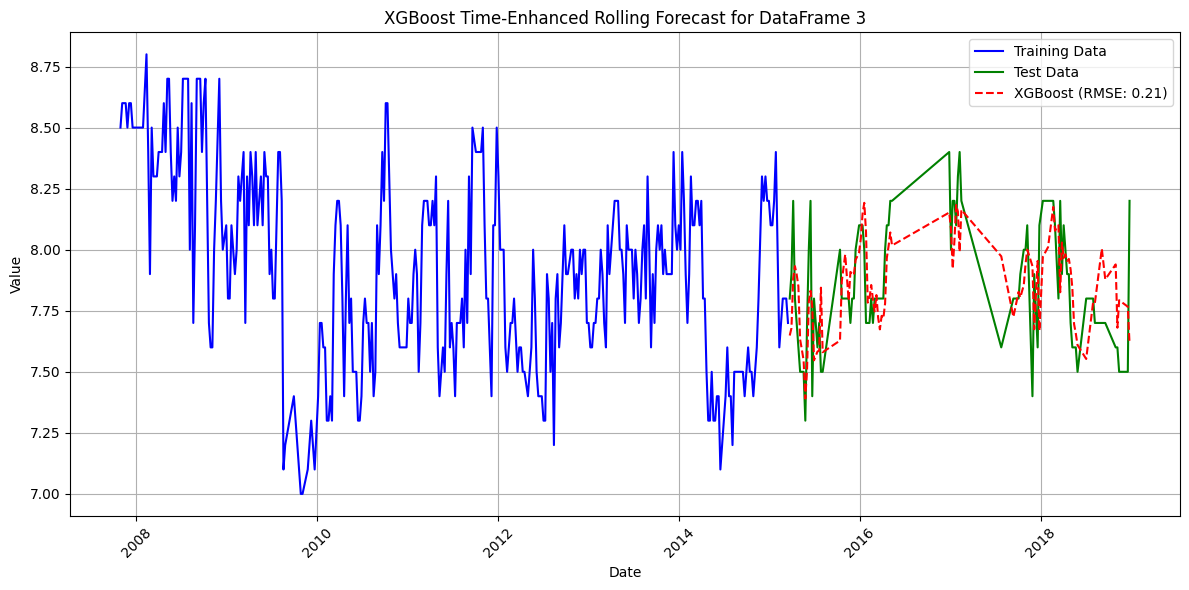


Training Random Forest Model for DataFrame 3...

Random Forest Metrics:
  MAE: 0.163
  RMSE: 0.212
  Highest RMSE: 0.631
  MAPE: 2.084%
  R^2: 0.274


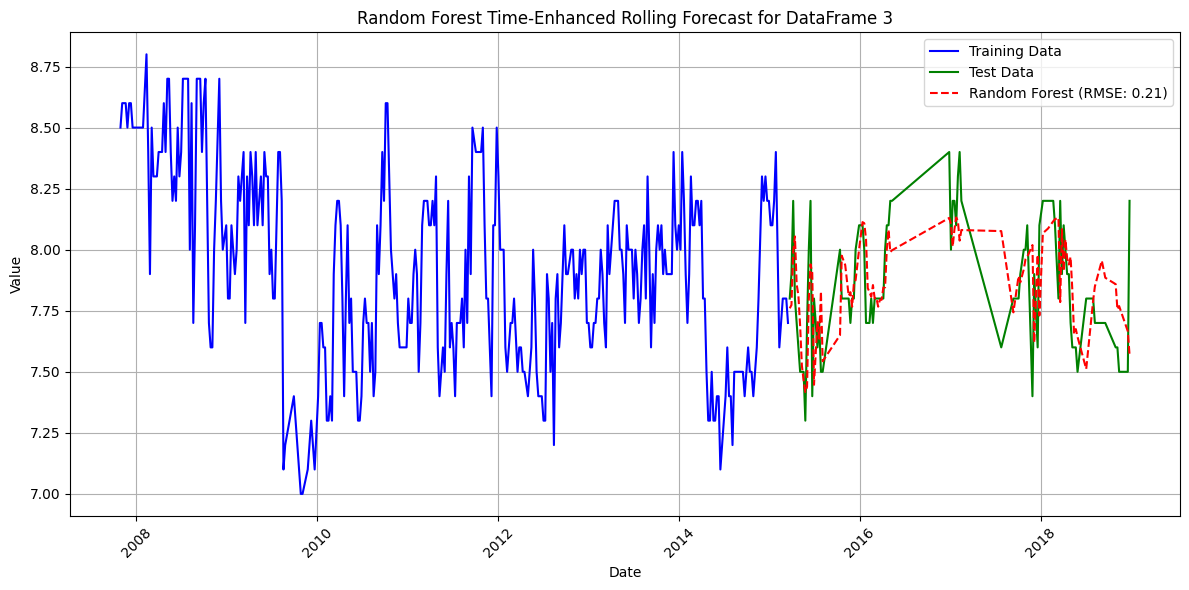

<ipython-input-7-d2f1470bd1b6>:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_col] = pd.to_datetime(df[date_col])



Training XGBoost Model for DataFrame 4...

XGBoost Metrics:
  MAE: 1.053
  RMSE: 1.333
  Highest RMSE: 4.615
  MAPE: 11.000%
  R^2: 0.533


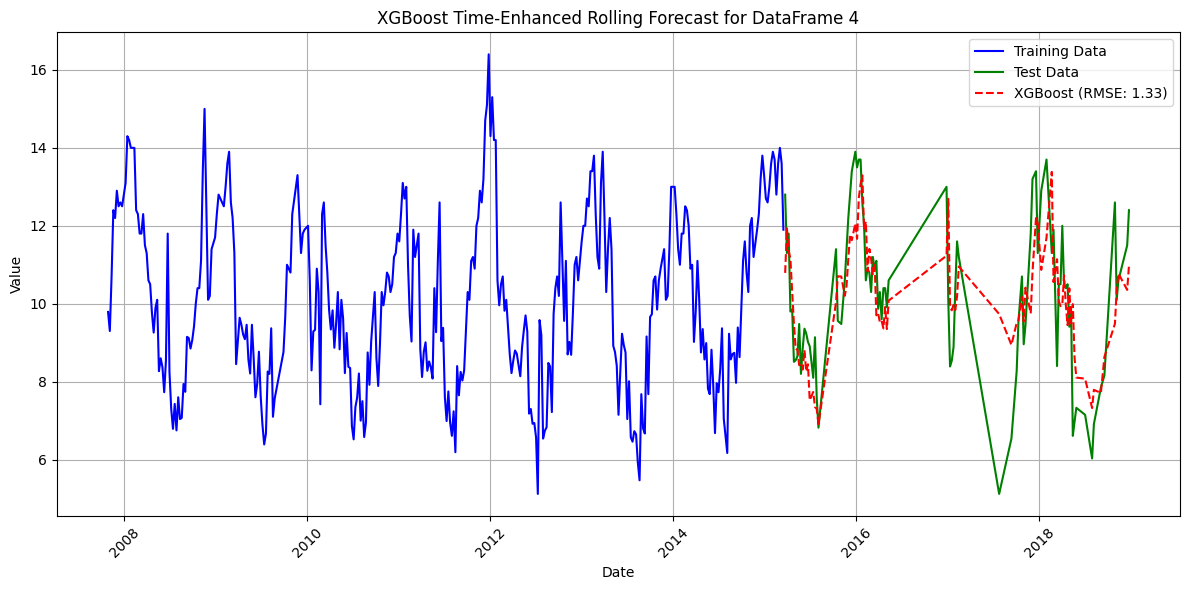


Training Random Forest Model for DataFrame 4...

Random Forest Metrics:
  MAE: 0.970
  RMSE: 1.274
  Highest RMSE: 5.158
  MAPE: 10.198%
  R^2: 0.574


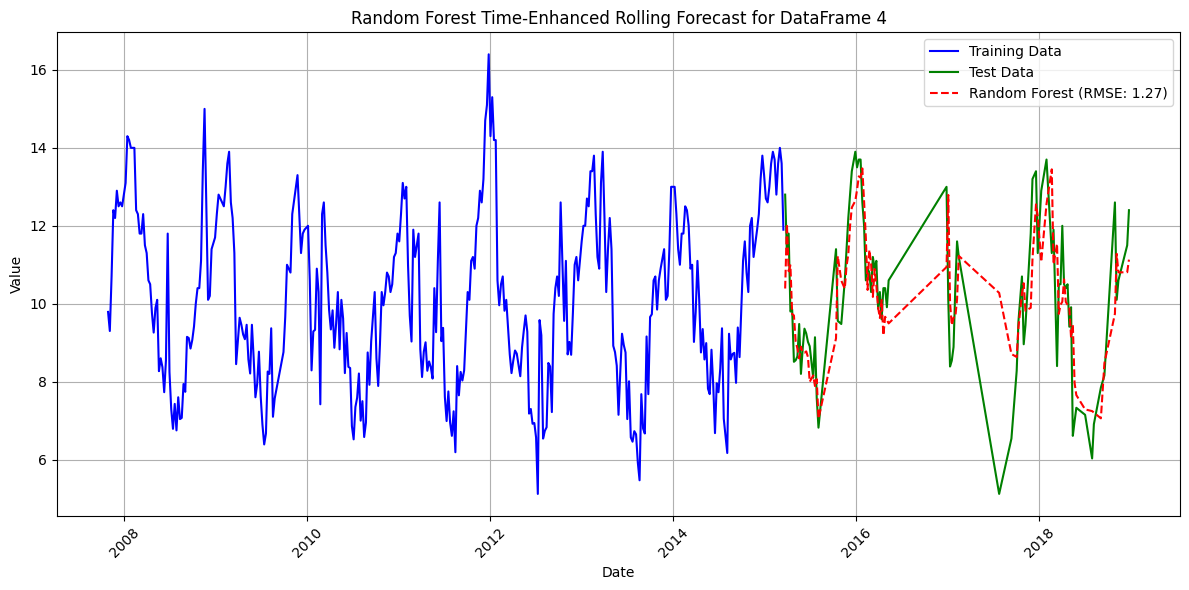

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

class TimeEnhancedRollingForecaster:
    def __init__(self, lag_features=128, model_type='xgboost'):
        self.lag_features = lag_features
        self.scaler = StandardScaler()
        self.is_fitted = False
        self.model_type = model_type.lower()

        if self.model_type == 'xgboost':
            self.model = XGBRegressor(
                n_estimators=100,
                learning_rate=0.1,
                max_depth=5,
                subsample=0.8,
                colsample_bytree=0.8,
                random_state=42
            )
        elif self.model_type == 'random_forest':
            self.model = RandomForestRegressor(
                n_estimators=100,
                max_depth=10,
                min_samples_split=2,
                min_samples_leaf=1,
                random_state=42
            )
        else:
            raise ValueError("model_type must be 'xgboost' or 'random_forest'")

    def _create_time_features(self, dates):
        """Create time-based features from datetime column"""
        date_df = pd.DataFrame({'date': dates})

        # Extract basic time components
        date_df['day'] = date_df['date'].dt.day
        date_df['month'] = date_df['date'].dt.month
        date_df['year'] = date_df['date'].dt.year
        date_df['day_of_week'] = date_df['date'].dt.dayofweek
        date_df['day_of_year'] = date_df['date'].dt.dayofyear
        date_df['quarter'] = date_df['date'].dt.quarter

        # Add cyclical features for seasonal patterns
        # Convert day of week, day of year, month to cyclical features
        date_df['month_sin'] = np.sin(2 * np.pi * date_df['month'] / 12)
        date_df['month_cos'] = np.cos(2 * np.pi * date_df['month'] / 12)
        date_df['day_of_week_sin'] = np.sin(2 * np.pi * date_df['day_of_week'] / 7)
        date_df['day_of_week_cos'] = np.cos(2 * np.pi * date_df['day_of_week'] / 7)
        date_df['day_of_year_sin'] = np.sin(2 * np.pi * date_df['day_of_year'] / 365)
        date_df['day_of_year_cos'] = np.cos(2 * np.pi * date_df['day_of_year'] / 365)

        # Drop the original date column
        date_df = date_df.drop('date', axis=1)

        return date_df

    def _create_features(self, series, dates):
        """Create lag features from time series data and time-based features"""
        # Create lag features
        df = pd.DataFrame({'y': series})
        for i in range(1, self.lag_features + 1):
            df[f'lag_{i}'] = df['y'].shift(i)

        # Add time-based features
        time_features = self._create_time_features(dates)

        # Ensure both dataframes have the same length after creating lags
        time_features = time_features.iloc[self.lag_features:]
        df = df.dropna()

        # Combine lag features with time features
        combined_df = pd.concat([df.reset_index(drop=True), time_features.reset_index(drop=True)], axis=1)

        return combined_df

    def fit(self, train_df, value_col='Value', date_col='MonitoringDate'):
        train_df = train_df.sort_values(by=date_col)
        self.train_dates = pd.to_datetime(train_df[date_col]).values
        self.y_train = train_df[value_col].values

        # Scale the target variable
        self.y_train_scaled = self.scaler.fit_transform(self.y_train.reshape(-1, 1)).flatten()

        # Create features
        features_df = self._create_features(self.y_train_scaled, pd.to_datetime(train_df[date_col]))

        X_train = features_df.drop('y', axis=1).values
        y_train = features_df['y'].values

        self.model.fit(X_train, y_train)
        self.last_values = list(self.y_train_scaled[-self.lag_features:])
        self.is_fitted = True

        # Store the last training date for time features generation during forecasting
        self.last_train_date = pd.to_datetime(train_df[date_col].iloc[-1])

        return self

    def rolling_forecast(self, test_df, value_col='Value', date_col='MonitoringDate'):
        if not self.is_fitted:
            raise ValueError("Model must be fitted before making predictions")

        test_df = test_df.sort_values(by=date_col)
        test_dates = pd.to_datetime(test_df[date_col]).values
        y_actual = test_df[value_col].values
        predictions = []
        individual_rmse = []  # Track RMSE for each individual prediction

        # Use last values from training data
        rolling_window = self.last_values.copy()

        for i in range(len(test_df)):
            current_date = test_dates[i]

            # Create time features for the current date
            time_features = self._create_time_features(pd.Series([current_date]))

            # Prepare lag features
            lag_features = np.array(rolling_window[::-1])

            # Combine lag features with time features
            X_test_lag = lag_features.reshape(1, -1)
            X_test_time = time_features.values
            X_test = np.hstack((X_test_lag, X_test_time))

            # Make prediction
            forecast_scaled = self.model.predict(X_test)[0]
            forecast = self.scaler.inverse_transform([[forecast_scaled]])[0, 0]
            predictions.append(forecast)

            # Calculate RMSE for this individual prediction
            if i < len(y_actual):
                step_rmse = np.sqrt(mean_squared_error([y_actual[i]], [forecast]))
                individual_rmse.append(step_rmse)

            # Update rolling window with the actual value (for next prediction)
            actual_scaled = self.scaler.transform([[max(y_actual[i], 1e-3)]])[0, 0]
            rolling_window.pop(0)
            rolling_window.append(actual_scaled)

        # Store individual RMSE values
        self.individual_rmse = individual_rmse

        return np.array(predictions), test_dates

    def evaluate(self, y_true, y_pred):
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_true, y_pred)
        epsilon = 1e-10
        mape = np.mean(np.abs((y_true - y_pred) / (np.abs(y_true) + epsilon))) * 100

        # Calculate highest RMSE from individual predictions
        highest_rmse = max(self.individual_rmse) if len(self.individual_rmse) > 0 else np.nan

        return {'mae': mae, 'mse': mse, 'rmse': rmse, 'r2': r2, 'mape': mape, 'highest_rmse': highest_rmse}


def apply_time_enhanced_forecasting(dfList, value_col='Value', date_col='MonitoringDate', lag_features=11):
    for i, df in enumerate(dfList):
        df[date_col] = pd.to_datetime(df[date_col])
        split_idx = int(len(df) * 0.8)
        train = df.iloc[:split_idx]
        test = df.iloc[split_idx:].reset_index(drop=True)

        print(f"\nTraining XGBoost Model for DataFrame {i+1}...\n")
        xgb_model = TimeEnhancedRollingForecaster(lag_features=lag_features, model_type='xgboost')
        xgb_model.fit(train, value_col=value_col, date_col=date_col)
        xgb_forecasts, test_dates = xgb_model.rolling_forecast(test, value_col=value_col, date_col=date_col)
        xgb_metrics = xgb_model.evaluate(test[value_col].values[:len(xgb_forecasts)], xgb_forecasts)

        print("XGBoost Metrics:")
        print(f"  MAE: {xgb_metrics['mae']:.3f}")
        print(f"  RMSE: {xgb_metrics['rmse']:.3f}")
        print(f"  Highest RMSE: {xgb_metrics['highest_rmse']:.3f}")
        print(f"  MAPE: {xgb_metrics['mape']:.3f}%")
        print(f"  R^2: {xgb_metrics['r2']:.3f}")

        plt.figure(figsize=(12, 6))
        plt.plot(train[date_col], train[value_col], label='Training Data', color='blue')
        plt.plot(test[date_col][:len(xgb_forecasts)], test[value_col][:len(xgb_forecasts)], label='Test Data', color='green')
        plt.plot(test[date_col][:len(xgb_forecasts)], xgb_forecasts, 'r--', label=f'XGBoost (RMSE: {xgb_metrics["rmse"]:.2f})')
        plt.title(f'XGBoost Time-Enhanced Rolling Forecast for DataFrame {i+1}')
        plt.xlabel('Date')
        plt.ylabel(value_col)
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        ## ---- Random Forest Model ---- ##
        print(f"\nTraining Random Forest Model for DataFrame {i+1}...\n")
        rf_model = TimeEnhancedRollingForecaster(lag_features=lag_features, model_type='random_forest')
        rf_model.fit(train, value_col=value_col, date_col=date_col)
        rf_forecasts, _ = rf_model.rolling_forecast(test, value_col=value_col, date_col=date_col)
        rf_metrics = rf_model.evaluate(test[value_col].values[:len(rf_forecasts)], rf_forecasts)

        print("Random Forest Metrics:")
        print(f"  MAE: {rf_metrics['mae']:.3f}")
        print(f"  RMSE: {rf_metrics['rmse']:.3f}")
        print(f"  Highest RMSE: {rf_metrics['highest_rmse']:.3f}")
        print(f"  MAPE: {rf_metrics['mape']:.3f}%")
        print(f"  R^2: {rf_metrics['r2']:.3f}")

        plt.figure(figsize=(12, 6))
        plt.plot(train[date_col], train[value_col], label='Training Data', color='blue')
        plt.plot(test[date_col][:len(rf_forecasts)], test[value_col][:len(rf_forecasts)], label='Test Data', color='green')
        plt.plot(test[date_col][:len(rf_forecasts)], rf_forecasts,'r--', label=f'Random Forest (RMSE: {rf_metrics["rmse"]:.2f})')
        plt.title(f'Random Forest Time-Enhanced Rolling Forecast for DataFrame {i+1}')
        plt.xlabel('Date')
        plt.ylabel(value_col)
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Example Testing
apply_time_enhanced_forecasting(dfList)

In [ ]:
import pandas as pd
dfList = [NH4df, CODdf, pHdf, DOdf]

# Combine all DataFrames into one
combined_df = pd.concat(dfList)

# Ensure the 'MonitoringDate' column is in datetime format
combined_df['MonitoringDate'] = pd.to_datetime(combined_df['MonitoringDate'])

# Rename columns for consistency
combined_df.rename(columns={
    'MonitoringLocationIdentifier': 'Place',
    'MonitoringDate': 'date',
    'IndicatorsName': 'Indicator',
    'Value': 'value'
}, inplace=True)

# Pivot the DataFrame to have indicators as columns
pivot_df = combined_df.pivot_table(index=['Place', 'date'], columns='Indicator', values='value', aggfunc='first').reset_index()

# Drop rows with missing values
pivot_df.dropna(inplace=True)

# Ensure the DataFrame is sorted by 'Place' and 'date'
pivot_df.sort_values(by=['Place', 'date'], inplace=True)

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [20/120], Loss: 0.0828
Epoch [40/120], Loss: 0.0701
Epoch [60/120], Loss: 0.0546
Epoch [80/120], Loss: 0.0440
Epoch [100/120], Loss: 0.0223
Epoch [120/120], Loss: 0.0178
Highest Error MSE: 0.700
132 - NH4N: RMSE=0.162, MAE=0.090, R²=0.353, MAPE=46.275%
Highest Error MSE: 1.712
132 - CODMn: RMSE=0.615, MAE=0.478, R²=0.365, MAPE=13.898%
Highest Error MSE: 0.675
132 - pH: RMSE=0.219, MAE=0.160, R²=0.227, MAPE=2.045%
Highest Error MSE: 6.812
132 - DO: RMSE=1.562, MAE=1.121, R²=0.360, MAPE=12.206%


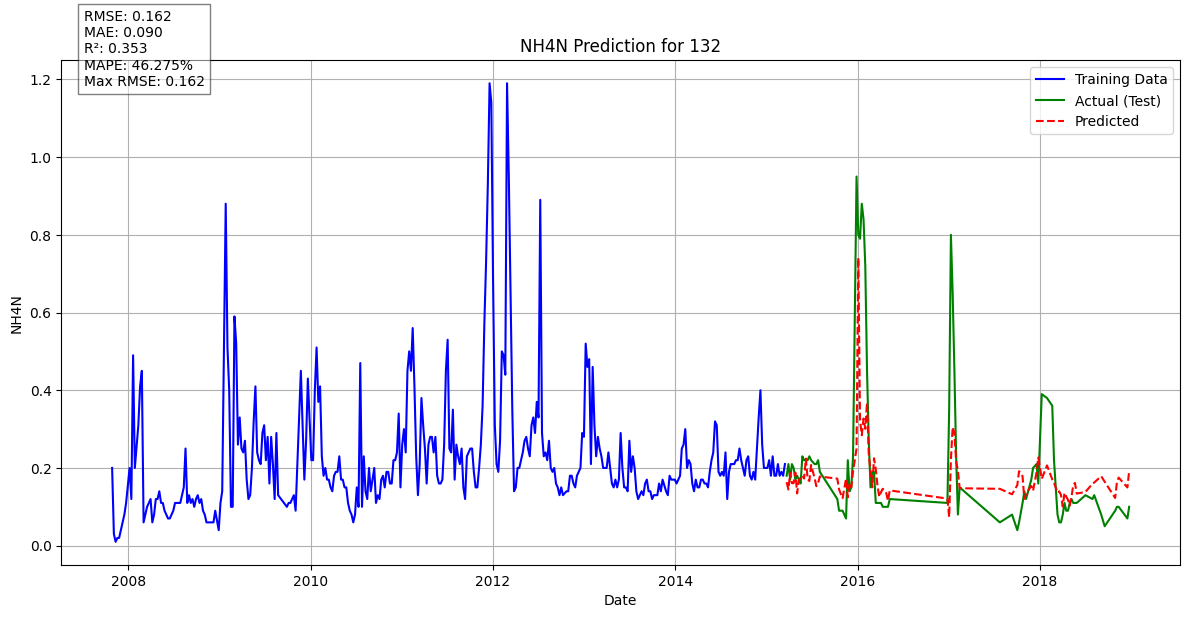

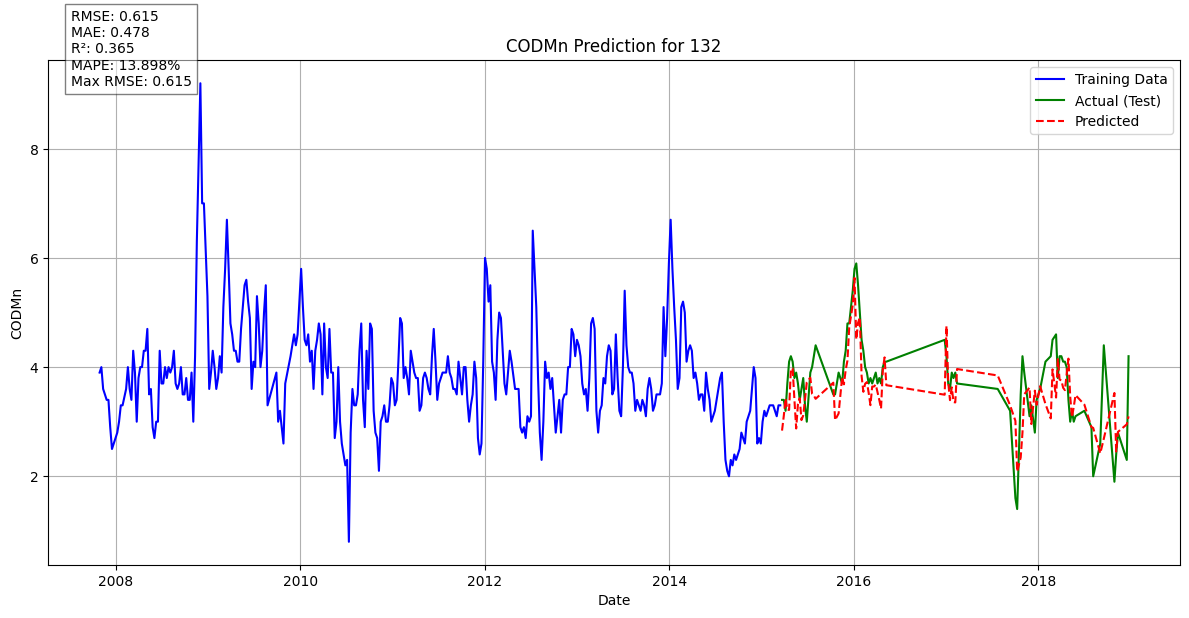

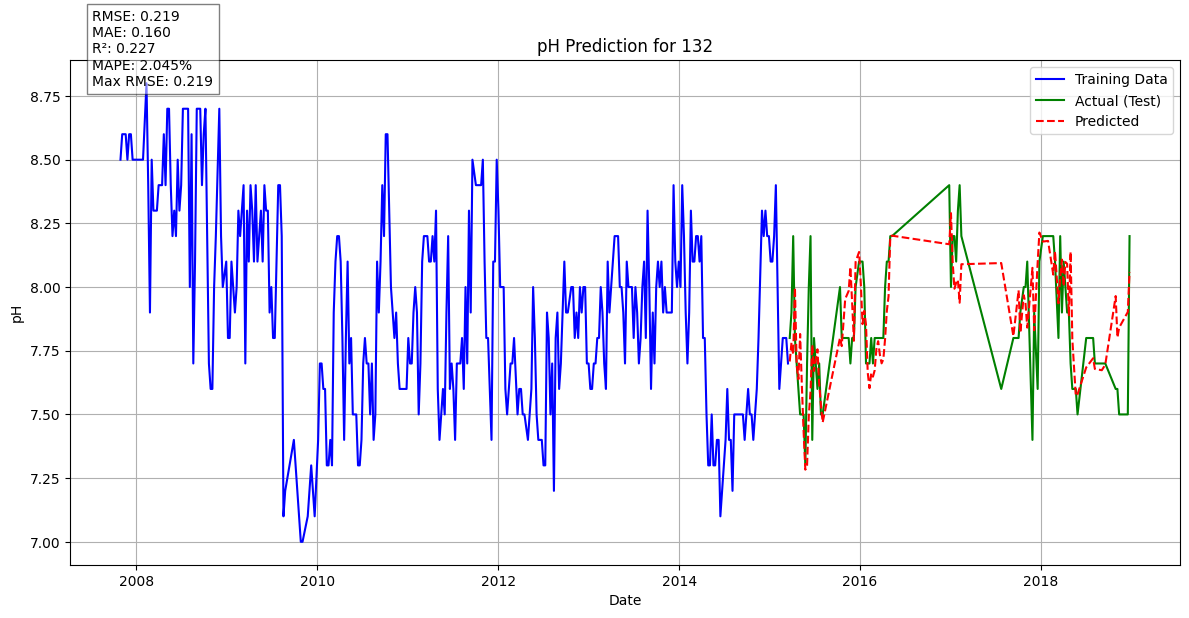

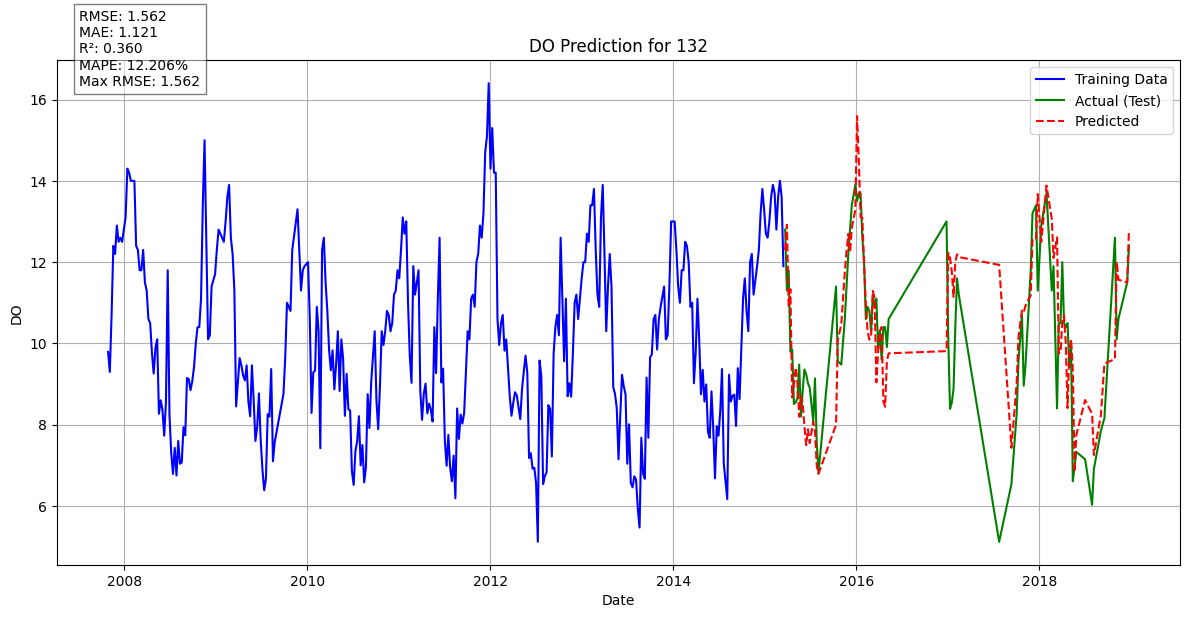

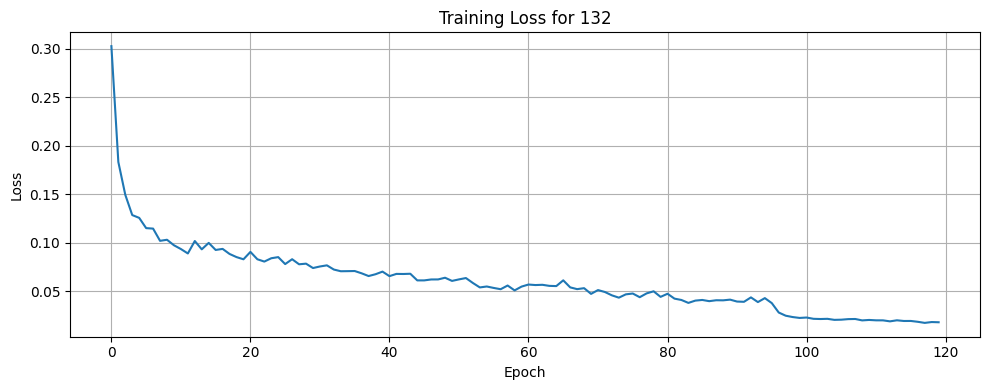

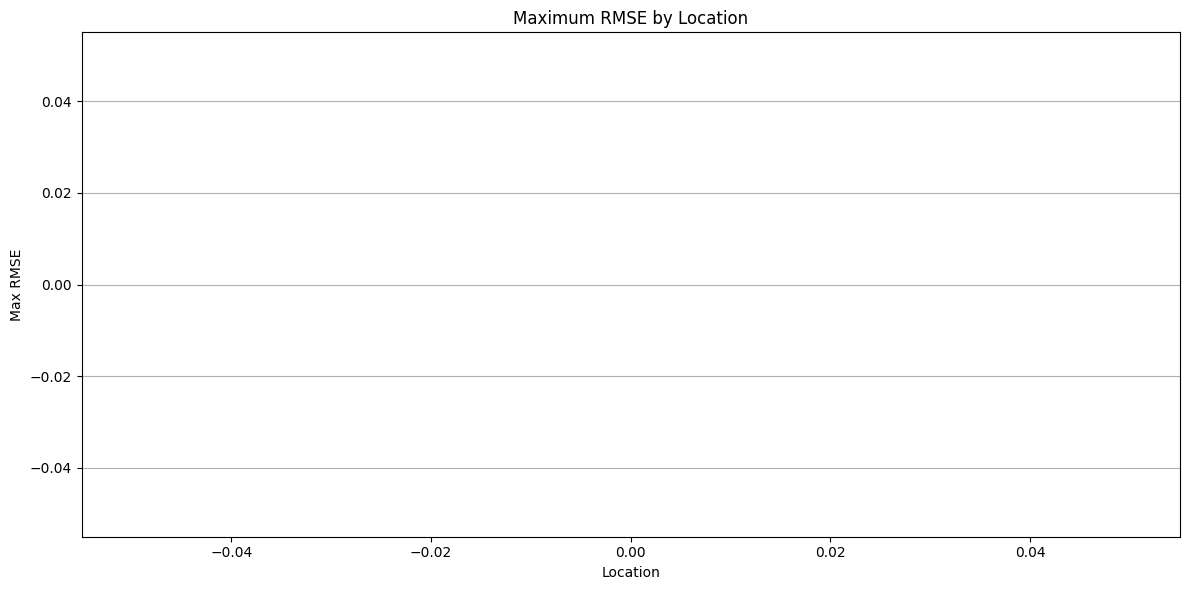

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from datetime import datetime

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)

class EnhancedTransformer(nn.Module):
    """Enhanced Transformer model with CNN layers for time series forecasting"""
    def __init__(self, input_dim, d_model=64, nhead=4, num_encoder_layers=2,
                 num_decoder_layers=2, dim_feedforward=256, dropout=0.1,
                 cnn_channels=64):
        super(EnhancedTransformer, self).__init__()

        # Input embedding layer
        self.input_embedding = nn.Linear(input_dim, d_model)

        # Positional encoding
        self.pos_encoder = PositionalEncoding(d_model, dropout)

        # Transformer encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=nhead,
            dim_feedforward=dim_feedforward,
            dropout=dropout,
            batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(
            encoder_layer,
            num_layers=num_encoder_layers
        )

        # CNN Layer with multiple filters - adjust output channels to match d_model
        self.conv1d = nn.Sequential(
            nn.Conv1d(in_channels=d_model, out_channels=d_model*2, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv1d(in_channels=d_model*2, out_channels=d_model, kernel_size=3, padding=1),
            nn.ReLU()
        )

        # Transformer decoder - using d_model as input dimension, not lstm_hidden*2
        decoder_layer = nn.TransformerDecoderLayer(
            d_model=d_model,  # Match CNN output dimension
            nhead=nhead,
            dim_feedforward=dim_feedforward,
            dropout=dropout,
            batch_first=True
        )
        self.transformer_decoder = nn.TransformerDecoder(
            decoder_layer,
            num_layers=num_decoder_layers
        )

        # Output prediction layer with Swish activation
        self.swish = Swish()
        self.output_layer = nn.Sequential(
            nn.Linear(d_model, 64),
            self.swish,
            nn.Linear(64, input_dim)
        )

        self.d_model = d_model
        self.input_dim = input_dim

    def forward(self, src, tgt=None):
        # src shape: [batch_size, src_seq_len, input_dim]
        batch_size, src_seq_len, _ = src.shape

        # If target not provided, use the last time step of src as target
        if tgt is None:
            tgt = src[:, -1:, :]  # [batch_size, 1, input_dim]

        # Embedding and positional encoding for source sequence
        src = self.input_embedding(src) * np.sqrt(self.d_model)  # Scale by sqrt(d_model)
        src = self.pos_encoder(src)

        # Transformer encoder
        memory = self.transformer_encoder(src)

        # Apply CNN layers
        x = memory
        x = x.transpose(1, 2)  # Convert for Conv1d [batch, d_model, seq_len]
        x = self.conv1d(x)
        x = x.transpose(1, 2)  # Convert back [batch, seq_len, d_model]

        # Embedding for target sequence
        tgt = self.input_embedding(tgt) * np.sqrt(self.d_model)
        tgt = self.pos_encoder(tgt)

        # Transformer decoder
        output = self.transformer_decoder(tgt, x)

        # Output projection
        output = self.output_layer(output)

        # Return last prediction
        return output[:, -1, :]  # [batch_size, input_dim]

# Helper functions from original code (with necessary modifications)
def create_sequences(data, seq_length):
    """
    Create sequences of data for transformer input
    """
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length]  # Target is the next time step for all features
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error (MAPE)"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Handle zero values to avoid division by zero
    mask = y_true != 0
    if mask.sum() == 0:
        return float('inf')
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

class LogCoshLoss(nn.Module):
    def forward(self, y_pred, y_true):
        return torch.mean(torch.log(torch.cosh(y_pred - y_true + 1e-12)))  # Avoid log(0)

def add_time_features(data):
    """
    Add time-based features (day, month, year) to the dataframe

    Args:
    data (DataFrame): DataFrame with a 'date' column

    Returns:
    DataFrame: Original dataframe with additional time features
    """
    # Make a copy to avoid modifying the original
    df = data.copy()

    # Ensure date column is datetime type
    if not pd.api.types.is_datetime64_any_dtype(df['date']):
        df['date'] = pd.to_datetime(df['date'])

    # Extract time features
    df['day'] = df['date'].dt.day
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year

    # Optional: Add cyclical encoding for day and month
    # This helps the model understand the cyclical nature of time
    df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)
    df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

    return df

def train_enhanced_transformer2(data, features, seq_length=12, epochs=100):
    """
    Train an Enhanced Transformer model with CNN and LSTM layers for multivariate time series forecasting.
    Now includes time features (day, month, year) and calculates max error.

    Args:
    data (DataFrame): The dataset with 'Place', 'date', and feature columns.
    features (list): Feature column names.
    seq_length (int): Sequence length for transformer input.
    epochs (int): Number of training epochs.

    Returns:
    dict: A dictionary containing models and evaluation metrics for each place.
    """
    results = {}
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    if 'Place' not in data.columns or 'date' not in data.columns:
        print("Columns 'Place' and 'date' must exist in the dataset.")
        return None

    # Add time features to the dataset
    data = add_time_features(data)

    # Add the new time features to the features list
    time_features = ['day', 'month', 'year', 'day_sin', 'day_cos', 'month_sin', 'month_cos']
    all_features = features + time_features

    # Dictionary to store max RMSE for each place
    max_rmse_per_place = {}

    # Combine 80% of data from each location into a single training set
    train_data_list = []
    test_data_dict = {}
    for place, group in data.groupby('Place'):
        # Drop rows with missing values in selected columns
        group = group.dropna(subset=features)

        if group.shape[0] < seq_length + 10:  # Skip locations with too few data points
            print(f"Skipping {place} due to insufficient data.")
            continue

        # Sort by date to maintain time order
        group = group.sort_values(by='date')

        # Time-based split (80% train, 20% test)
        split_idx = int(len(group) * 0.8)
        train_data_list.append(group.iloc[:split_idx])
        test_data_dict[place] = group.iloc[split_idx:]

    # Combine all training data
    train_data = pd.concat(train_data_list)

    # Extract features for training
    X_train = train_data[all_features].values

    # Normalize the training data
    scaler_X = StandardScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)

    # Create sequences for training
    X_train_seq, y_train_seq = create_sequences(X_train_scaled, seq_length)

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train_seq)
    y_train_tensor = torch.FloatTensor(y_train_seq)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=False)

    # Initialize model
    num_features = X_train_scaled.shape[1]
    model = EnhancedTransformer(
        input_dim=num_features,
        d_model=64,
        nhead=4,
        num_encoder_layers=2,
        num_decoder_layers=2,
        dropout=0.1,
        cnn_channels=64
    ).to(device)

    # Loss and optimizer
    criterion = LogCoshLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

    # Learning rate scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=10, verbose=True
    )

    # Training loop
    train_losses = []
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            # Forward pass
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)

            # Backward pass and optimize
            loss.backward()
            # Gradient clipping to prevent explosion
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Adjust learning rate
        scheduler.step(avg_loss)

        if (epoch + 1) % 20 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')

    # Prepare for inference on individual test sets
    model.eval()

    for place, test_data in test_data_dict.items():
        # Extract features for testing
        X_test = test_data[all_features].values

        # Normalize the test data using the same scalers
        X_test_scaled = scaler_X.transform(X_test)

        # Create sequences from test data for prediction
        test_dates = test_data['date'].values

        # Initialize with the last sequence from training data
        input_seq = X_train_scaled[-seq_length:]

        # Recursive forecasting
        y_pred_scaled = []


        with torch.no_grad():
            for _ in range(len(X_test_scaled)):
                # Convert sequence to tensor
                seq_tensor = torch.FloatTensor(input_seq).unsqueeze(0).to(device)

                # Predict next value
                prediction = model(seq_tensor).cpu().numpy()
                y_pred_scaled.append(prediction)

                # Update input sequence
                input_seq = np.vstack((input_seq[1:], X_test_scaled[len(y_pred_scaled)-1]))

        # Convert predictions back to original scale
        y_pred = scaler_X.inverse_transform(np.array(y_pred_scaled).squeeze())

        # Actual test values
        y_test = scaler_X.inverse_transform(X_test_scaled)

        # We only care about the original features, not the time features
        # Get the indices of the original features in the all_features list
        orig_feature_indices = [all_features.index(f) for f in features]

        # Filter y_pred and y_test to include only the original features
        y_pred_orig = y_pred[:, orig_feature_indices]
        y_test_orig = y_test[:, orig_feature_indices]

        # Store results
        results[place] = {
            "model": model,
            "test_dates": test_dates,
            "predictions": y_pred_orig,
            "actual": y_test_orig,
            "train_loss": train_losses
        }

        # Calculate evaluation metrics for each feature
        for i, feature in enumerate(features):
            mse = mean_squared_error(y_test_orig[:, i], y_pred_orig[:, i])

            # Compute individual squared errors
            squared_errors = (y_test_orig[:, i] - y_pred_orig[:, i])**2

            # Find the index of the highest error
            max_error_index = np.argmax(squared_errors)

            # Get the corresponding true and predicted values
            highest_error_mse = np.sqrt(squared_errors[max_error_index])
            highest_error_true_value = y_test_orig[max_error_index, i]
            highest_error_predicted_value = y_pred_orig[max_error_index, i]

            print(f"Highest Error MSE: {highest_error_mse:.3f}")
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_test_orig[:, i], y_pred_orig[:, i])
            r2 = r2_score(y_test_orig[:, i], y_pred_orig[:, i])
            mape = mean_absolute_percentage_error(y_test_orig[:, i], y_pred_orig[:, i])

            # Add metrics to results
            results[place][f'{feature}_metrics'] = {
                "mse": mse,
                "rmse": rmse,
                "mae": mae,
                "r2": r2,
                "mape": mape
            }

            print(f"{place} - {feature}: RMSE={rmse:.3f}, MAE={mae:.3f}, R²={r2:.3f}, MAPE={mape:.3f}%")

        # Get training data for the current location
        train_data_place = train_data[train_data['Place'] == place]
        train_dates_place = train_data_place['date'].values
        train_values_place = train_data_place[features].values

        # Plot results for each feature
        for i, feature in enumerate(features):
            plt.figure(figsize=(12, 6))

            # Plot training data
            plt.plot(train_dates_place, train_values_place[:, i], 'b-', label='Training Data')

            # Plot test data
            plt.plot(test_dates, y_test_orig[:, i], 'g-', label='Actual (Test)')
            plt.plot(test_dates, y_pred_orig[:, i], 'r--', label='Predicted')

            plt.title(f'{feature} Prediction for {place}')
            plt.xlabel('Date')
            plt.ylabel(feature)
            plt.legend()
            plt.grid(True)
            plt.tight_layout()

            # Add metrics to the plot
            rmse = results[place][f'{feature}_metrics']['rmse']
            max_rmse = results[place][f'{feature}_metrics']['rmse']
            mae = results[place][f'{feature}_metrics']['mae']
            r2 = results[place][f'{feature}_metrics']['r2']
            mape = results[place][f'{feature}_metrics']['mape']

            metrics_text = (f"RMSE: {rmse:.3f}\nMAE: {mae:.3f}\nR²: {r2:.3f}\nMAPE: {mape:.3f}%\nMax RMSE: {max_rmse:.3f}")
            plt.annotate(metrics_text, xy=(0.02, 0.95), xycoords='axes fraction',
                        bbox=dict(facecolor='white', alpha=0.5))

            plt.show()

        # Plot training loss
        plt.figure(figsize=(10, 4))
        plt.plot(train_losses)
        plt.title(f'Training Loss for {place}')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # Add max RMSE per place to results
    results["max_rmse_per_place"] = max_rmse_per_place

    # Create a summary plot of max RMSE for all places
    places = list(max_rmse_per_place.keys())
    max_rmses = [info["max_rmse"] for info in max_rmse_per_place.values()]
    features = [info["feature"] for info in max_rmse_per_place.values()]

    plt.figure(figsize=(12, 6))
    bars = plt.bar(places, max_rmses)

    # Add feature labels to each bar
    for i, (bar, feature) in enumerate(zip(bars, features)):
        plt.text(bar.get_x() + bar.get_width()/2.,
                bar.get_height() + 0.1,
                feature,
                ha='center', va='bottom', rotation=45)

    plt.title('Maximum RMSE by Location')
    plt.xlabel('Location')
    plt.ylabel('Max RMSE')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

    return results



# Usage example:
# Define the features to forecast
features = ['NH4N', 'CODMn', 'pH', 'DO']

# Train the model with time features and max error calculation
results = train_enhanced_transformer2(pivot_df, features, seq_length=4, epochs=120)

TFTformer

Epoch [20/40], Loss: 0.1662
Epoch [40/40], Loss: 0.0953
132 - NH4N: RMSE=0.161, MAE=0.104, R²=0.359, MAPE=68.470% Max SE=0.773
132 - CODMn: RMSE=0.731, MAE=0.576, R²=0.102, MAPE=15.860% Max SE=1.874
132 - pH: RMSE=0.392, MAE=0.329, R²=-1.492, MAPE=4.135% Max SE=0.873
132 - DO: RMSE=1.478, MAE=1.064, R²=0.427, MAPE=11.750% Max SE=5.529


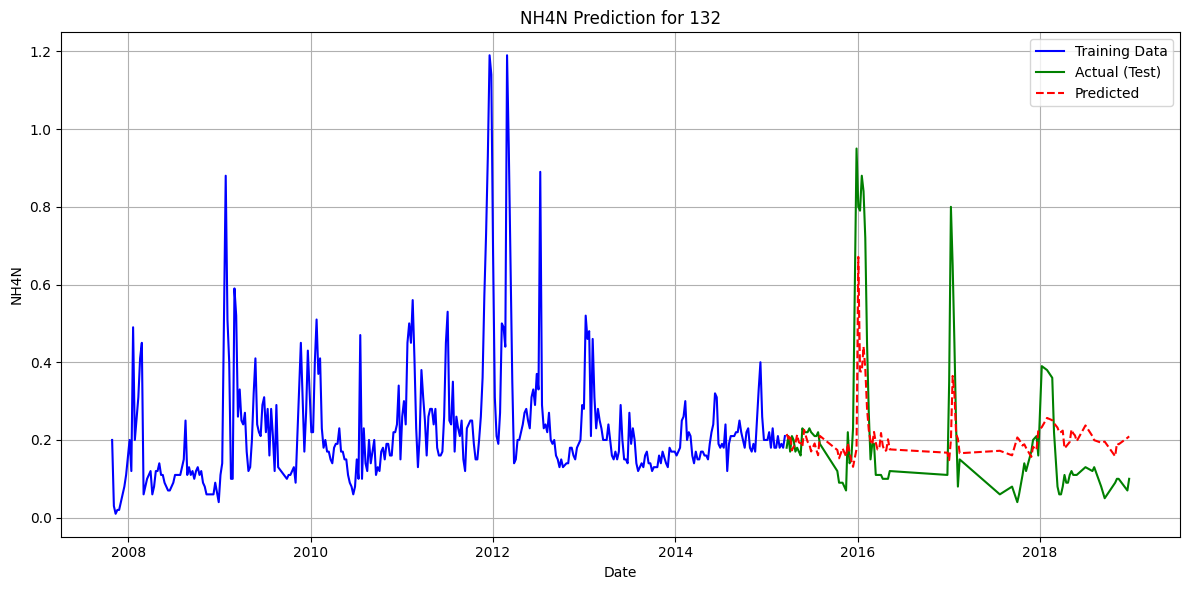

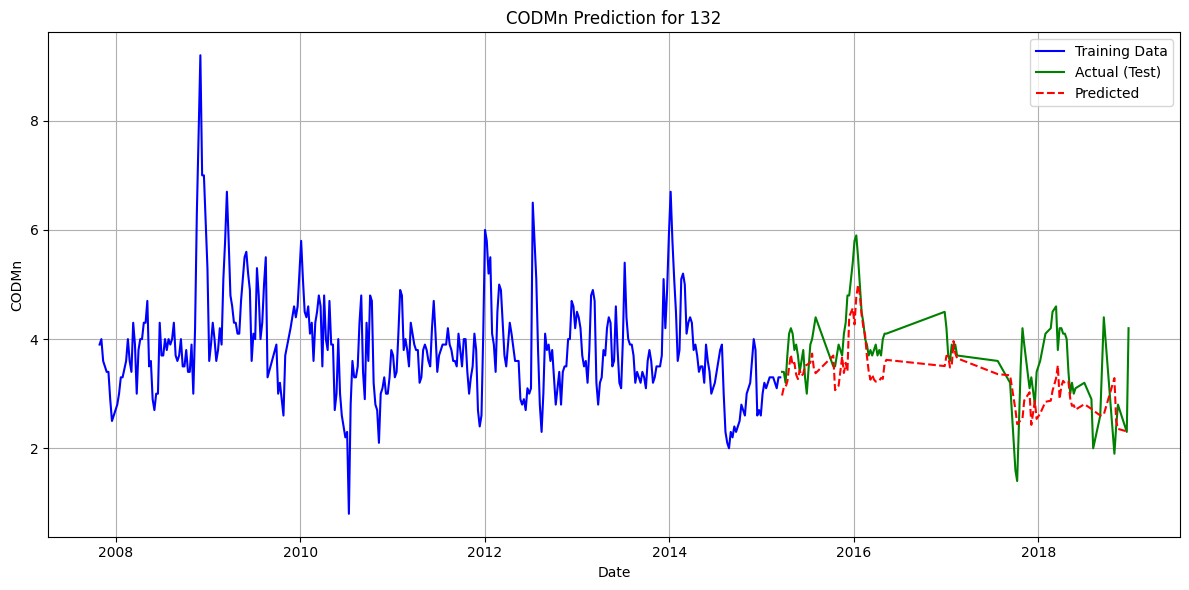

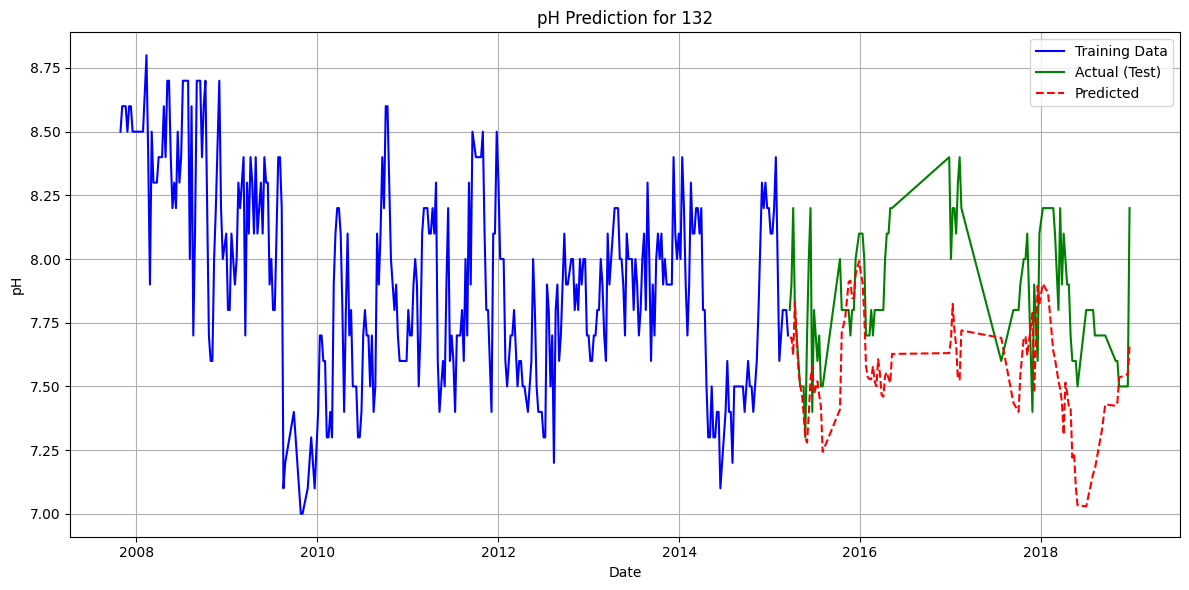

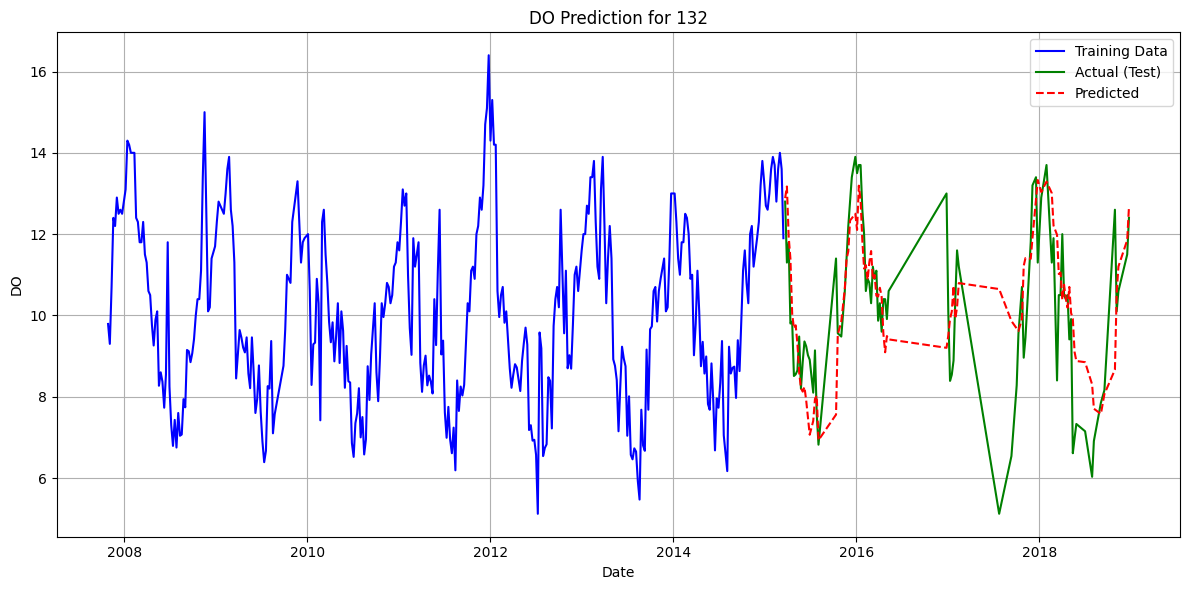

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Define the Temporal Fusion Transformer (TFT) model (unchanged)
class GatedLinearUnit(nn.Module):
    """Gated Linear Unit for the TFT model"""
    def __init__(self, input_dim, output_dim=None):
        super(GatedLinearUnit, self).__init__()
        if output_dim is None:
            output_dim = input_dim
        self.fc = nn.Linear(input_dim, output_dim * 2)

    def forward(self, x):
        x = self.fc(x)
        x_linear, x_gated = torch.chunk(x, 2, dim=-1)
        return x_linear * torch.sigmoid(x_gated)

class GatedResidualNetwork(nn.Module):
    """Gated Residual Network as used in TFT"""
    def __init__(self, input_dim, hidden_dim, output_dim=None, dropout=0.1):
        super(GatedResidualNetwork, self).__init__()
        self.input_dim = input_dim
        if output_dim is None:
            output_dim = input_dim

        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.elu = nn.ELU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)
        self.gate = GatedLinearUnit(output_dim)

        # Skip connection if dimensions differ
        self.skip_connection = (input_dim != output_dim)
        if self.skip_connection:
            self.skip_linear = nn.Linear(input_dim, output_dim)

        # LayerNorm for stabilizing training
        self.layer_norm = nn.LayerNorm(output_dim)

    def forward(self, x, c=None):
        if c is not None:
            # If we have context, concatenate with input
            x_and_c = torch.cat((x, c), dim=-1)
            hidden = self.fc1(x_and_c)
        else:
            hidden = self.fc1(x)

        hidden = self.elu(hidden)
        hidden = self.fc2(hidden)
        hidden = self.dropout(hidden)

        # Apply gating mechanism
        hidden = self.gate(hidden)

        # Apply residual connection
        if self.skip_connection:
            x = self.skip_linear(x)

        output = self.layer_norm(hidden + x)

        return output

class VariableSelectionNetwork(nn.Module):
    """Variable selection network from TFT"""
    def __init__(self, input_sizes, hidden_dim, output_dim, dropout=0.1):
        super(VariableSelectionNetwork, self).__init__()
        self.input_sizes = input_sizes
        self.num_inputs = len(input_sizes)

        # Create a GRN for each input variable
        self.variable_grns = nn.ModuleList([
            GatedResidualNetwork(input_size, hidden_dim, output_dim, dropout)
            for input_size in input_sizes
        ])

        # GRN for the variable selection weights
        total_input_size = sum(input_sizes)
        self.selection_grn = GatedResidualNetwork(
            total_input_size, hidden_dim, self.num_inputs, dropout
        )

    def forward(self, inputs, static_context=None):
        # Process each variable with its own GRN
        var_outputs = []
        for i, grn in enumerate(self.variable_grns):
            var_outputs.append(grn(inputs[i]))

        # Concatenate all inputs for the selection weights
        combined = torch.cat(inputs, dim=-1)

        # Get variable selection weights
        sparse_weights = self.selection_grn(combined, static_context)
        sparse_weights = torch.softmax(sparse_weights, dim=-1).unsqueeze(-1)

        # Weight and combine variable outputs
        outputs = 0
        for i in range(self.num_inputs):
            outputs = outputs + var_outputs[i] * sparse_weights[:, i]

        return outputs, sparse_weights

class TemporalFusionTransformer(nn.Module):
    """Temporal Fusion Transformer for multivariate time series forecasting"""
    def __init__(self, num_time_varying, input_dim, hidden_dim=64,
                 num_heads=4, dropout=0.1, num_encoder_layers=2, num_decoder_layers=2):
        super(TemporalFusionTransformer, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_time_varying = num_time_varying

        # Input transformations
        self.input_sizes = [input_dim] * num_time_varying

        # Variable selection networks
        self.encoder_vsn = VariableSelectionNetwork(
            self.input_sizes, hidden_dim, hidden_dim, dropout
        )

        # Temporal processing
        self.lstm_encoder = nn.LSTM(
            hidden_dim, hidden_dim, batch_first=True
        )
        self.lstm_decoder = nn.LSTM(
            hidden_dim, hidden_dim, batch_first=True
        )

        # Self-attention transformer components
        self.attention = nn.MultiheadAttention(
            hidden_dim, num_heads, dropout=dropout, batch_first=True
        )

        # Position-wise feed-forward network
        self.pos_wise_ff = GatedResidualNetwork(
            hidden_dim, hidden_dim * 4, hidden_dim, dropout
        )

        self.norm = nn.LayerNorm(4)

        # Dropout layer before final prediction
        self.dropout_layer = nn.Dropout(dropout)

        # Final prediction layer (outputs all features)
        self.prediction_layer = nn.Linear(hidden_dim, num_time_varying)

    def forward(self, x):
        # x shape: [batch_size, seq_len, num_features]
        batch_size, seq_len, _ = x.shape

        # Split inputs into separate variables and reshape for VSN
        time_varying_inputs = []
        for i in range(self.num_time_varying):
            # Extract one feature across all time steps
            time_varying_inputs.append(x[:, :, i].unsqueeze(-1))

        # Apply variable selection for time-varying inputs
        selected_inputs, _ = self.encoder_vsn(time_varying_inputs)

        # Temporal processing
        # Split the sequence into observed (encoder) and prediction (decoder) parts
        # For simplicity, we use the last time step as decoder input
        encoder_input = selected_inputs[:, :-1, :]
        decoder_input = selected_inputs[:, -1:, :]

        # LSTM encoder
        encoder_output, (h_n, c_n) = self.lstm_encoder(encoder_input)
        encoder_output = self.dropout_layer(encoder_output)  # Apply dropout manually

        # LSTM decoder with initial state from encoder
        decoder_output, _ = self.lstm_decoder(decoder_input, (h_n, c_n))
        decoder_output = self.dropout_layer(decoder_output)  # Apply dropout manually

        # Combine encoder and decoder outputs for attention
        lstm_output = torch.cat([encoder_output, decoder_output], dim=1)

        # Apply self-attention mechanism
        attn_output, _ = self.attention(lstm_output, lstm_output, lstm_output)

        # Position-wise feed-forward
        output = self.pos_wise_ff(attn_output)

        x = self.norm(x)

        # Apply dropout before final prediction
        output = self.dropout_layer(output)

        # Get final prediction from the last time step
        output = output[:, -1, :]

        # Final prediction layer (outputs all features)
        predictions = self.prediction_layer(output)

        return predictions

# Define Log-Cosh Loss for multivariate output
class LogCoshLoss(nn.Module):
    def forward(self, y_pred, y_true):
        return torch.mean(torch.log(torch.cosh(y_pred - y_true + 1e-12)))  # Avoid log(0)

class HuberLogCoshLoss(nn.Module):
    def __init__(self, delta=1.0):
        super().__init__()
        self.delta = delta

    def forward(self, y_pred, y_true):
        error = y_true - y_pred
        return torch.mean(torch.where(
            torch.abs(error) < self.delta,
            (error ** 2) / 2,  # MSE-like behavior for small errors
            torch.log(torch.cosh(error))  # Log-Cosh behavior for large errors
        ))
class ExpWeightedLoss(nn.Module):
    def __init__(self, alpha=0.1):  # α controls the importance of large errors
        super().__init__()
        self.alpha = alpha

    def forward(self, y_pred, y_true):
        error = torch.abs(y_true - y_pred)
        return torch.mean((torch.exp(self.alpha * error) - 1))  # Exponential weighting
def create_sequences(data, seq_length):
    """
    Create sequences of data for transformer input
    """
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length]  # Target is the next time step for all features
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

from sklearn.metrics import mean_absolute_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error (MAPE)"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Handle zero values to avoid division by zero
    mask = y_true != 0
    if mask.sum() == 0:
        return float('inf')
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

def train_tft_multivariate(data, features, seq_length=12, epochs=100):
    """
    Train a Temporal Fusion Transformer model for multivariate time series forecasting.

    Args:
    data (DataFrame): The dataset with 'Place', 'date', and feature columns.
    features (list): Feature column names.
    seq_length (int): Sequence length for transformer input.
    epochs (int): Number of training epochs.

    Returns:
    dict: A dictionary containing models and evaluation metrics for each place.
    """
    results = {}
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    if 'Place' not in data.columns or 'date' not in data.columns:
        print("Columns 'Place' and 'date' must exist in the dataset.")
        return None

    # Ensure date column is datetime type
    if not pd.api.types.is_datetime64_any_dtype(data['date']):
        data['date'] = pd.to_datetime(data['date'])

    # Extract time features
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['year'] = data['date'].dt.year

    # Add the time features to the feature list
    time_features = ['month', 'day', 'year']
    all_features = features + time_features

    # Combine 80% of data from each location into a single training set
    train_data_list = []
    test_data_dict = {}
    for place, group in data.groupby('Place'):
        # Drop rows with missing values in selected columns
        group = group.dropna(subset=all_features)

        if group.shape[0] < seq_length + 10:  # Skip locations with too few data points
            print(f"Skipping {place} due to insufficient data.")
            continue

        # Sort by date to maintain time order
        group = group.sort_values(by='date')

        # Time-based split (80% train, 20% test)
        split_idx = int(len(group) * 0.8)
        train_data_list.append(group.iloc[:split_idx])
        test_data_dict[place] = group.iloc[split_idx:]

    # Combine all training data
    train_data = pd.concat(train_data_list)

    # Extract features for training
    X_train = train_data[all_features].values

    # Normalize the training data
    scaler_X = StandardScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)

    # Create sequences for training
    X_train_seq, y_train_seq = create_sequences(X_train_scaled, seq_length)

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train_seq)
    y_train_tensor = torch.FloatTensor(y_train_seq)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=False)

    # Initialize model with the correct number of features
    num_features = len(all_features)  # Use the count of all features

    # Modify the TFT model initialization to match the feature dimensions
    input_size = 1  # Each feature's input size
    input_sizes = [input_size] * num_features  # List of input sizes for each feature

    # Create a custom version of the VSN class that properly handles our features
    class CustomVSN(nn.Module):
        def __init__(self, input_dims, hidden_dim, output_dim, dropout=0.1):
            super(CustomVSN, self).__init__()
            self.num_inputs = len(input_dims)

            # Create a GRN for each input variable
            self.variable_grns = nn.ModuleList([
                GatedResidualNetwork(1, hidden_dim, output_dim, dropout)
                for _ in range(self.num_inputs)
            ])

            # GRN for the variable selection weights
            self.selection_grn = GatedResidualNetwork(
                self.num_inputs, hidden_dim, self.num_inputs, dropout
            )

        def forward(self, x):
            # Process input: x is [batch_size, seq_len, num_features]
            batch_size, seq_len, num_features = x.shape

            # Prepare individual feature inputs
            var_outputs = []
            feature_inputs = []

            # Process each feature separately
            for i in range(self.num_inputs):
                # Extract the i-th feature for all time steps
                feature = x[:, :, i:i+1]  # Keep dim: [batch, seq_len, 1]
                feature_inputs.append(feature.reshape(batch_size * seq_len, -1))

                # Process with GRN
                processed = self.variable_grns[i](feature.reshape(batch_size * seq_len, -1))
                processed = processed.reshape(batch_size, seq_len, -1)
                var_outputs.append(processed)

            # Calculate selection weights
            # Concatenate features along feature dimension for selection input
            selection_input = torch.cat([x[:, :, i:i+1].reshape(batch_size * seq_len, -1)
                                         for i in range(self.num_inputs)], dim=1)

            sparse_weights = self.selection_grn(selection_input)
            sparse_weights = sparse_weights.reshape(batch_size, seq_len, -1)
            sparse_weights = torch.softmax(sparse_weights, dim=-1)

            # Apply weights to combine outputs
            outputs = 0
            for i in range(self.num_inputs):
                outputs = outputs + var_outputs[i] * sparse_weights[:, :, i:i+1]

            return outputs, sparse_weights

    # Create a modified TFT model using our custom VSN
    class ModifiedTFT(nn.Module):
        def __init__(self, num_features, hidden_dim=64, num_heads=4, dropout=0.1):
            super(ModifiedTFT, self).__init__()
            self.hidden_dim = hidden_dim
            self.num_features = num_features

            # Custom variable selection
            self.encoder_vsn = CustomVSN(
                [1] * num_features, hidden_dim, hidden_dim, dropout
            )

            # Temporal processing
            self.lstm_encoder = nn.LSTM(
                hidden_dim, hidden_dim, batch_first=True
            )
            self.lstm_decoder = nn.LSTM(
                hidden_dim, hidden_dim, batch_first=True
            )

            # Self-attention
            self.attention = nn.MultiheadAttention(
                hidden_dim, num_heads, dropout=dropout, batch_first=True
            )

            # Position-wise feed-forward
            self.pos_wise_ff = GatedResidualNetwork(
                hidden_dim, hidden_dim * 4, hidden_dim, dropout
            )

            # Final processing
            self.dropout_layer = nn.Dropout(dropout)
            self.prediction_layer = nn.Linear(hidden_dim, num_features)

        def forward(self, x):
            batch_size, seq_len, _ = x.shape

            # Apply variable selection
            selected_inputs, _ = self.encoder_vsn(x)

            # Temporal processing - split encoder/decoder
            encoder_input = selected_inputs[:, :-1, :]
            decoder_input = selected_inputs[:, -1:, :]

            # LSTM processing
            encoder_output, (h_n, c_n) = self.lstm_encoder(encoder_input)
            decoder_output, _ = self.lstm_decoder(decoder_input, (h_n, c_n))

            # Combine outputs for attention
            lstm_output = torch.cat([encoder_output, decoder_output], dim=1)

            # Self-attention
            attn_output, _ = self.attention(lstm_output, lstm_output, lstm_output)

            # Position-wise feed-forward
            output = self.pos_wise_ff(attn_output)

            # Final prediction from last time step
            output = self.dropout_layer(output[:, -1, :])
            predictions = self.prediction_layer(output)

            return predictions

    # Initialize our modified model
    model = ModifiedTFT(
        num_features=num_features,
        hidden_dim=64,
        num_heads=4,
        dropout=0.1
    ).to(device)

    # Loss and optimizer
    criterion = HuberLogCoshLoss(delta=1.0)
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

    # Training loop
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            # Forward pass
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        if (epoch + 1) % 20 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}')

    # Prepare for inference on individual test sets
    model.eval()

    for place, test_data in test_data_dict.items():
        # Extract features for testing including time features
        X_test = test_data[all_features].values

        # Normalize the test data using the same scalers
        X_test_scaled = scaler_X.transform(X_test)

        # Create sequences from test data for prediction
        test_dates = test_data['date'].values

        # Initialize with the last sequence from training data
        input_seq = X_train_scaled[-seq_length:]

        # Recursive forecasting
        y_pred_scaled = []

        with torch.no_grad():
            for _ in range(len(X_test_scaled)):
                # Convert sequence to tensor
                seq_tensor = torch.FloatTensor(input_seq).unsqueeze(0).to(device)

                # Predict next value
                prediction = model(seq_tensor).cpu().numpy()
                y_pred_scaled.append(prediction)

                # Update input sequence
                input_seq = np.vstack((input_seq[1:], X_test_scaled[len(y_pred_scaled)-1]))

        # Convert predictions back to original scale
        y_pred = scaler_X.inverse_transform(np.array(y_pred_scaled).squeeze())

        # Actual test values
        y_test = scaler_X.inverse_transform(X_test_scaled)

        # Store results
        results[place] = {
            "model": model,
            "test_dates": test_dates,
            "predictions": y_pred,
            "actual": y_test
        }

        # Calculate evaluation metrics for each original feature (excluding the time features)
        for i, feature in enumerate(features):
            # Find the index of the feature in the all_features list
            feature_idx = all_features.index(feature)

            mse = mean_squared_error(y_test[:, feature_idx], y_pred[:, feature_idx])
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_test[:, feature_idx], y_pred[:, feature_idx])
            r2 = r2_score(y_test[:, feature_idx], y_pred[:, feature_idx])
            mape = mean_absolute_percentage_error(y_test[:, feature_idx], y_pred[:, feature_idx])

            se_list = np.sqrt((y_test[:, feature_idx]-y_pred[:, feature_idx])**2)
            max_se = np.max(se_list)

            # Add metrics to results
            results[place][f'{feature}_metrics'] = {
                "mse": mse,
                "rmse": rmse,
                "mae": mae,
                "r2": r2,
                "mape": mape,
                "max_se": max_se
            }

            print(f"{place} - {feature}: RMSE={rmse:.3f}, MAE={mae:.3f}, R²={r2:.3f}, MAPE={mape:.3f}%", f"Max SE={max_se:.3f}")

        # Plot results for each original feature (excluding the time features)
        train_data_place = train_data[train_data['Place'] == place]
        train_dates_place = train_data_place['date'].values

        # Get training data values for original features
        train_values_place = train_data_place[features].values

        for i, feature in enumerate(features):
            feature_idx = all_features.index(feature)

            plt.figure(figsize=(12, 6))

            # Plot training data
            plt.plot(train_dates_place, train_values_place[:, i], 'b-', label='Training Data')

            # Plot test data
            plt.plot(test_dates, y_test[:, feature_idx], 'g-', label='Actual (Test)')
            plt.plot(test_dates, y_pred[:, feature_idx], 'r--', label='Predicted')

            plt.title(f'{feature} Prediction for {place}')
            plt.xlabel('Date')
            plt.ylabel(feature)
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

    return results

    # Define the features to forecast
features = ['NH4N', 'CODMn', 'pH', 'DO']

# Train the model
results = train_tft_multivariate(pivot_df, features, seq_length=4, epochs=40)

ETSFormer 1 (linear)

Epoch [20/40], Loss: 0.1616
Epoch [40/40], Loss: 0.1457
132 - NH4N: RMSE=0.136, MAE=0.076, R²=0.544, MAPE=38.629%, SEMax=0.722 
132 - CODMn: RMSE=0.534, MAE=0.372, R²=0.521, MAPE=11.518%, SEMax=2.034 
132 - pH: RMSE=0.234, MAE=0.176, R²=0.110, MAPE=2.235%, SEMax=0.652 
132 - DO: RMSE=1.532, MAE=1.121, R²=0.384, MAPE=11.686%, SEMax=5.830 


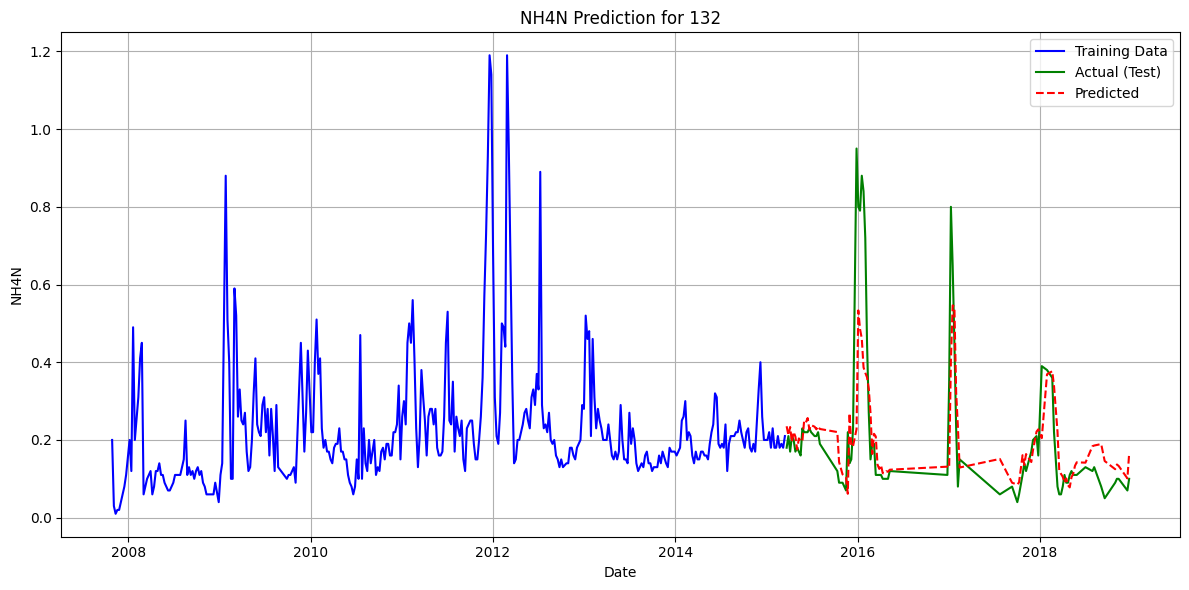

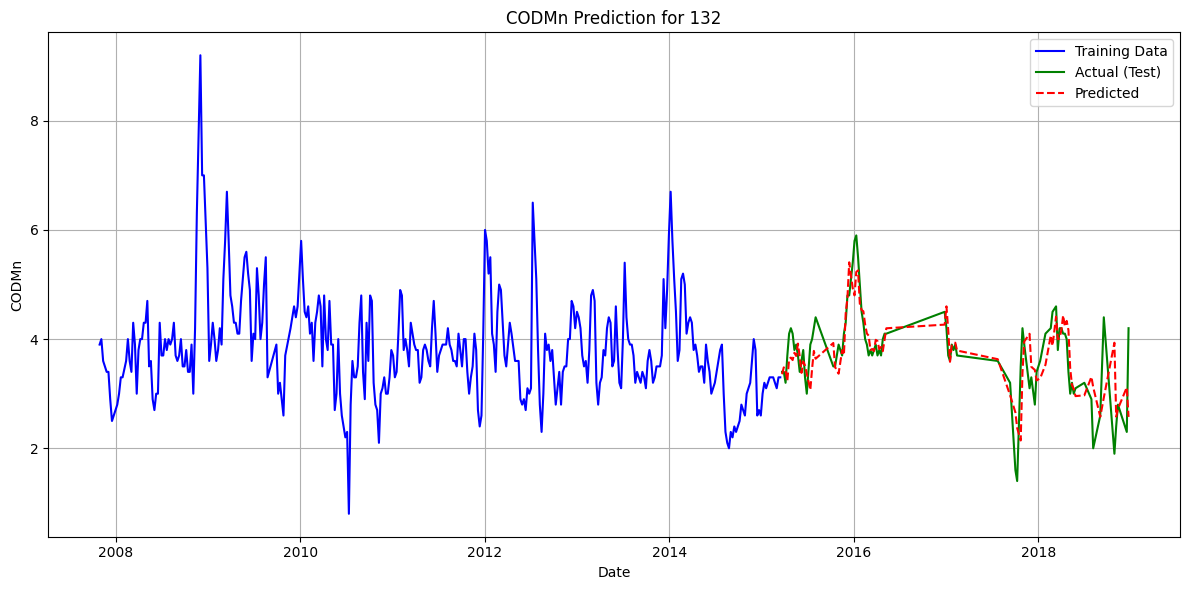

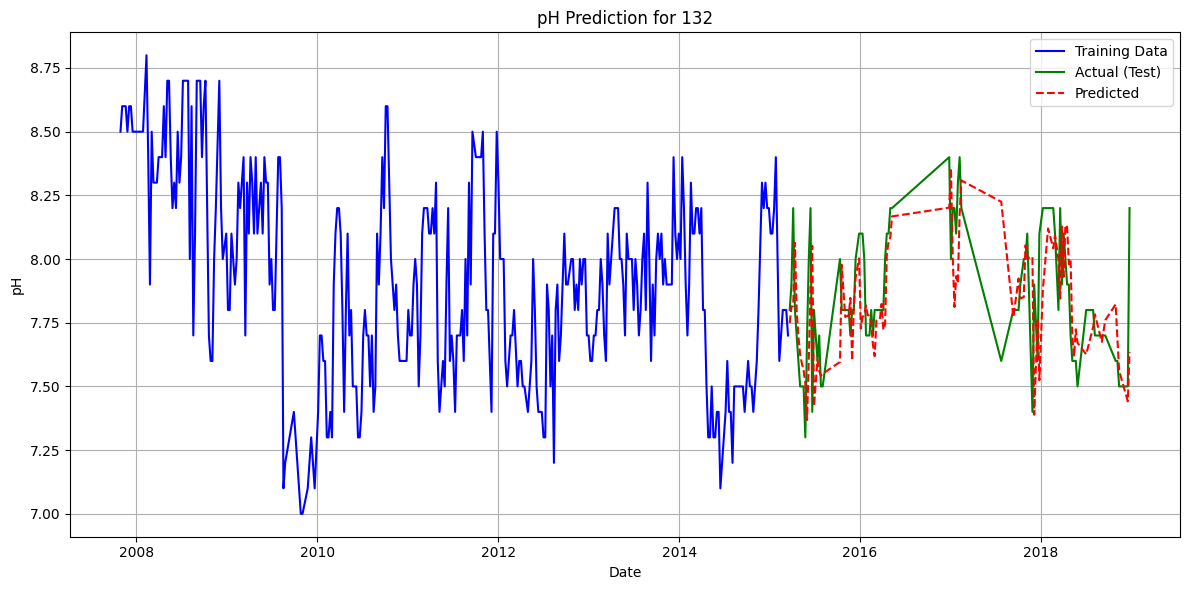

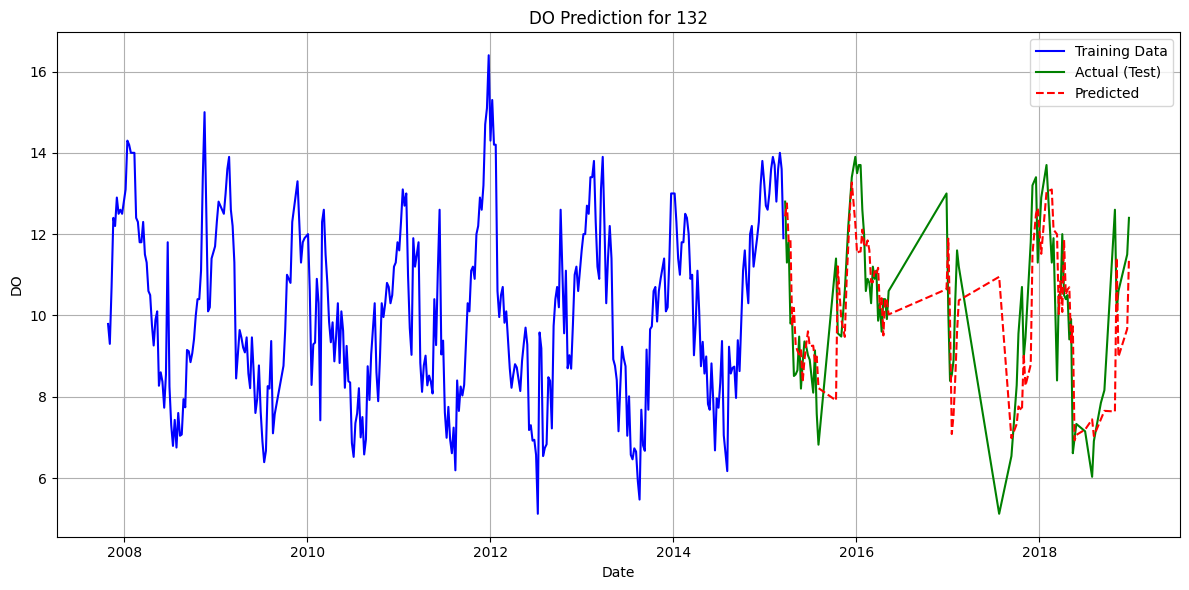

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

class ExponentialSmoothing(nn.Module):
    """Exponential Smoothing Layer for ETSformer"""
    def __init__(self, d_model, alpha=0.5):
        super(ExponentialSmoothing, self).__init__()
        self.alpha = alpha
        self.d_model = d_model
        self.weight = nn.Parameter(torch.ones(1, d_model))

    def forward(self, x):
        # Apply exponential smoothing
        smoothed = torch.zeros_like(x)
        smoothed[:, 0] = x[:, 0]
        for t in range(1, x.shape[1]):
            smoothed[:, t] = self.alpha * x[:, t] + (1 - self.alpha) * smoothed[:, t-1]
        return smoothed * self.weight

class ETSAttention(nn.Module):
    """ETSformer Attention Mechanism"""
    def __init__(self, d_model, n_heads, dropout=0.1):
        super(ETSAttention, self).__init__()
        self.multihead_attn = nn.MultiheadAttention(d_model, n_heads, dropout=dropout, batch_first=True)
        self.norm = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, level, trend):
        # Combine level and trend with input
        x_combined = x + level + trend
        # Multi-head attention
        attn_output, _ = self.multihead_attn(x_combined, x_combined, x_combined)
        # Add & Norm
        x = self.norm(x + self.dropout(attn_output))
        return x

class ETSformer(nn.Module):
    """ETSformer Model for Time Series Forecasting"""
    def __init__(self, num_features, d_model=64, n_heads=4, dropout=0.1, num_layers=2):
        super(ETSformer, self).__init__()
        self.d_model = d_model
        self.num_features = num_features

        # Input embedding
        self.input_embedding = nn.Linear(num_features, d_model)

        # Exponential smoothing layers
        self.level_smoothing = ExponentialSmoothing(d_model)
        self.trend_smoothing = ExponentialSmoothing(d_model)

        # ETSformer layers
        self.layers = nn.ModuleList([
            ETSAttention(d_model, n_heads, dropout) for _ in range(num_layers)
        ])

        # Output layer
        self.output_layer = nn.Linear(d_model, num_features)

    def forward(self, x):
        # Input embedding
        x = self.input_embedding(x)

        # Initialize level and trend
        level = self.level_smoothing(x)
        trend = self.trend_smoothing(x)

        # Apply ETSformer layers
        for layer in self.layers:
            x = layer(x, level, trend)

        # Output prediction
        output = self.output_layer(x[:, -1, :])  # Predict the next time step
        return output

# Loss Functions (Reuse from TFT implementation)
class LogCoshLoss(nn.Module):
    def forward(self, y_pred, y_true):
        return torch.mean(torch.log(torch.cosh(y_pred - y_true + 1e-12)))

class HuberLogCoshLoss(nn.Module):
    def __init__(self, delta=1.0):
        super().__init__()
        self.delta = delta

    def forward(self, y_pred, y_true):
        error = y_true - y_pred
        return torch.mean(torch.where(
            torch.abs(error) < self.delta,
            (error ** 2) / 2,
            torch.log(torch.cosh(error))
        ))

# Training Function (Reuse from TFT implementation)
def train_etsformer(data, features, seq_length=12, epochs=100):
    """
    Train an ETSformer model for multivariate time series forecasting.
    """
    results = {}
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    if 'Place' not in data.columns or 'date' not in data.columns:
        print("Columns 'Place' and 'date' must exist in the dataset.")
        return None

    # Combine 80% of data from each location into a single training set
    train_data_list = []
    test_data_dict = {}
    for place, group in data.groupby('Place'):
        group = group.dropna(subset=features)

        if group.shape[0] < seq_length + 10:
            print(f"Skipping {place} due to insufficient data.")
            continue

        group = group.sort_values(by='date')
        split_idx = int(len(group) * 0.8)
        train_data_list.append(group.iloc[:split_idx])
        test_data_dict[place] = group.iloc[split_idx:]

    train_data = pd.concat(train_data_list)
    X_train = train_data[features].values
    scaler_X = StandardScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)

    X_train_seq, y_train_seq = create_sequences(X_train_scaled, seq_length)
    X_train_tensor = torch.FloatTensor(X_train_seq)
    y_train_tensor = torch.FloatTensor(y_train_seq)

    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=False)

    # Initialize ETSformer model
    model = ETSformer(
        num_features=len(features),
        d_model=64,
        n_heads=4,
        dropout=0.1,
        num_layers=2
    ).to(device)

    # criterion = LogCoshLoss()  # Use Log-Cosh instead of MSE
    criterion = HuberLogCoshLoss(delta=1.0)
    # criterion = ExpWeightedLoss(alpha=0.1)
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

    # Training loop
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        if (epoch + 1) % 20 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}')

    # Inference and evaluation (Reuse from TFT implementation)
    model.eval()
    for place, test_data in test_data_dict.items():
        X_test = test_data[features].values
        X_test_scaled = scaler_X.transform(X_test)
        test_dates = test_data['date'].values
        input_seq = X_train_scaled[-seq_length:]

        y_pred_scaled = []
        with torch.no_grad():
            for _ in range(len(X_test_scaled)):
                seq_tensor = torch.FloatTensor(input_seq).unsqueeze(0).to(device)
                prediction = model(seq_tensor).cpu().numpy()
                y_pred_scaled.append(prediction)
                input_seq = np.vstack((input_seq[1:], X_test_scaled[len(y_pred_scaled)-1]))

        y_pred = scaler_X.inverse_transform(np.array(y_pred_scaled).squeeze())
        y_test = scaler_X.inverse_transform(X_test_scaled)

        results[place] = {
            "model": model,
            "test_dates": test_dates,
            "predictions": y_pred,
            "actual": y_test
        }

        for i, feature in enumerate(features):
            mse = mean_squared_error(y_test[:, i], y_pred[:, i])
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_test[:, i], y_pred[:, i])
            r2 = r2_score(y_test[:, i], y_pred[:, i])
            mape = mean_absolute_percentage_error(y_test[:, i], y_pred[:, i])

            se_list = np.sqrt((y_test[:, i]- y_pred[:, i])**2)
            se_max = np.max(se_list)

            results[place][f'{feature}_metrics'] = {
                "mse": mse,
                "rmse": rmse,
                "mae": mae,
                "r2": r2,
                "mape": mape,
                "se_max": se_max
            }

            print(f"{place} - {feature}: RMSE={rmse:.3f}, MAE={mae:.3f}, R²={r2:.3f}, MAPE={mape:.3f}%, SEMax={se_max:.3f} ")

        # Plot results (Reuse from TFT implementation)
        train_data_place = train_data[train_data['Place'] == place]
        train_dates_place = train_data_place['date'].values
        train_values_place = pd.concat(train_data_list)[features].values

        for i, feature in enumerate(features):
            plt.figure(figsize=(12, 6))
            plt.plot(train_dates_place, train_values_place[:, i], 'b-', label='Training Data')
            plt.plot(test_dates, y_test[:, i], 'g-', label='Actual (Test)')
            plt.plot(test_dates, y_pred[:, i], 'r--', label='Predicted')
            plt.title(f'{feature} Prediction for {place}')
            plt.xlabel('Date')
            plt.ylabel(feature)
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

    return results

# Define the features to forecast
features = ['NH4N', 'CODMn', 'pH', 'DO']

# Train the ETSformer model
results = train_etsformer(pivot_df, features, seq_length=4, epochs=40)

ETSFormer 2 (CNN)

Epoch [10/50], Train Loss: 0.1460
Epoch [20/50], Train Loss: 0.1191
Epoch [30/50], Train Loss: 0.0985
Epoch [40/50], Train Loss: 0.0884
Epoch [50/50], Train Loss: 0.0769
132 - NH4N: RMSE=0.150, MAE=0.081, R²=0.442, MAPE=42.549%, SE_max=0.625
132 - CODMn: RMSE=0.613, MAE=0.478, R²=0.369, MAPE=13.878%, SE_max=1.696
132 - pH: RMSE=0.239, MAE=0.181, R²=0.072, MAPE=2.285%, SE_max=0.729
132 - DO: RMSE=1.483, MAE=1.155, R²=0.422, MAPE=12.410%, SE_max=5.109


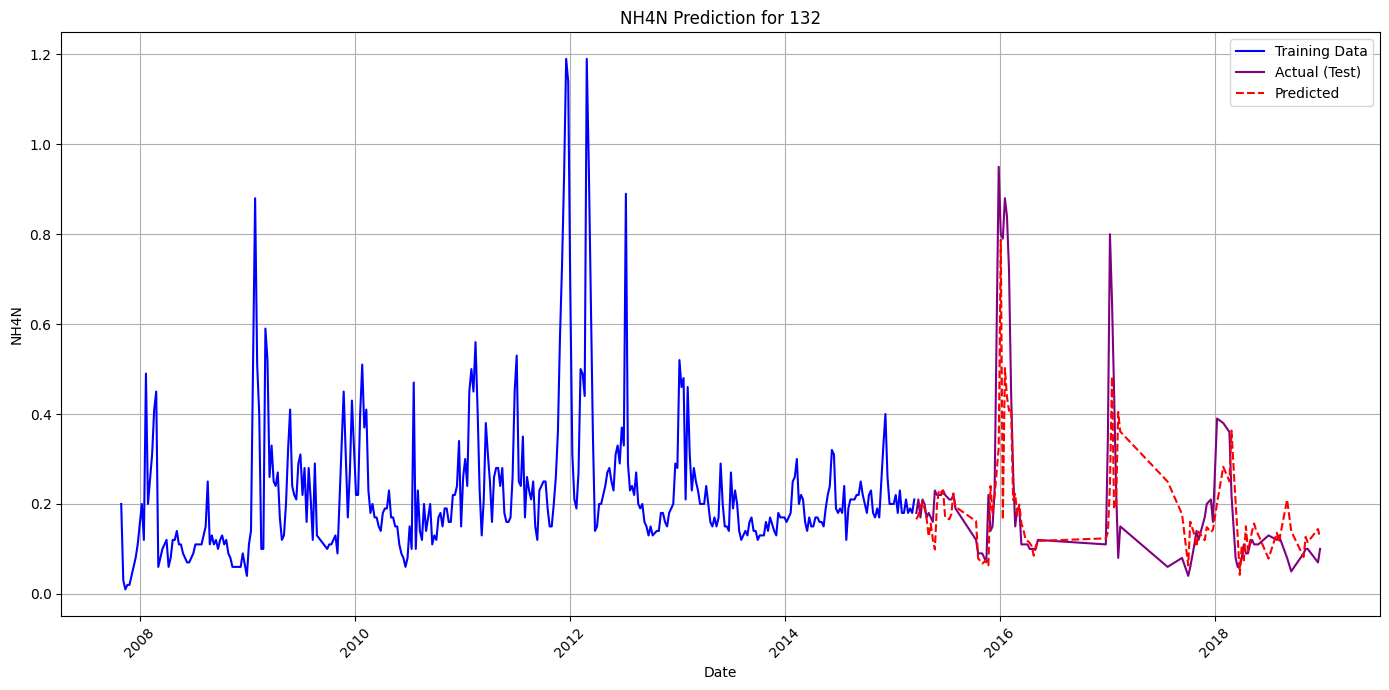

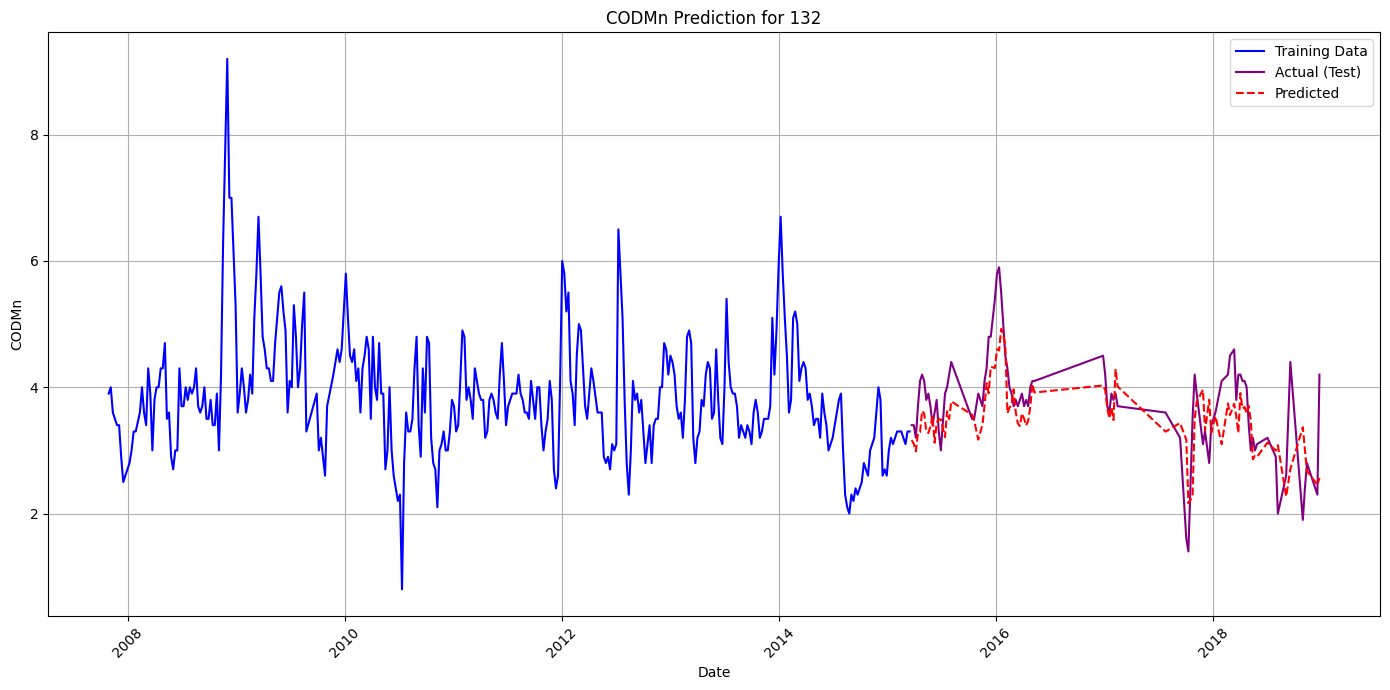

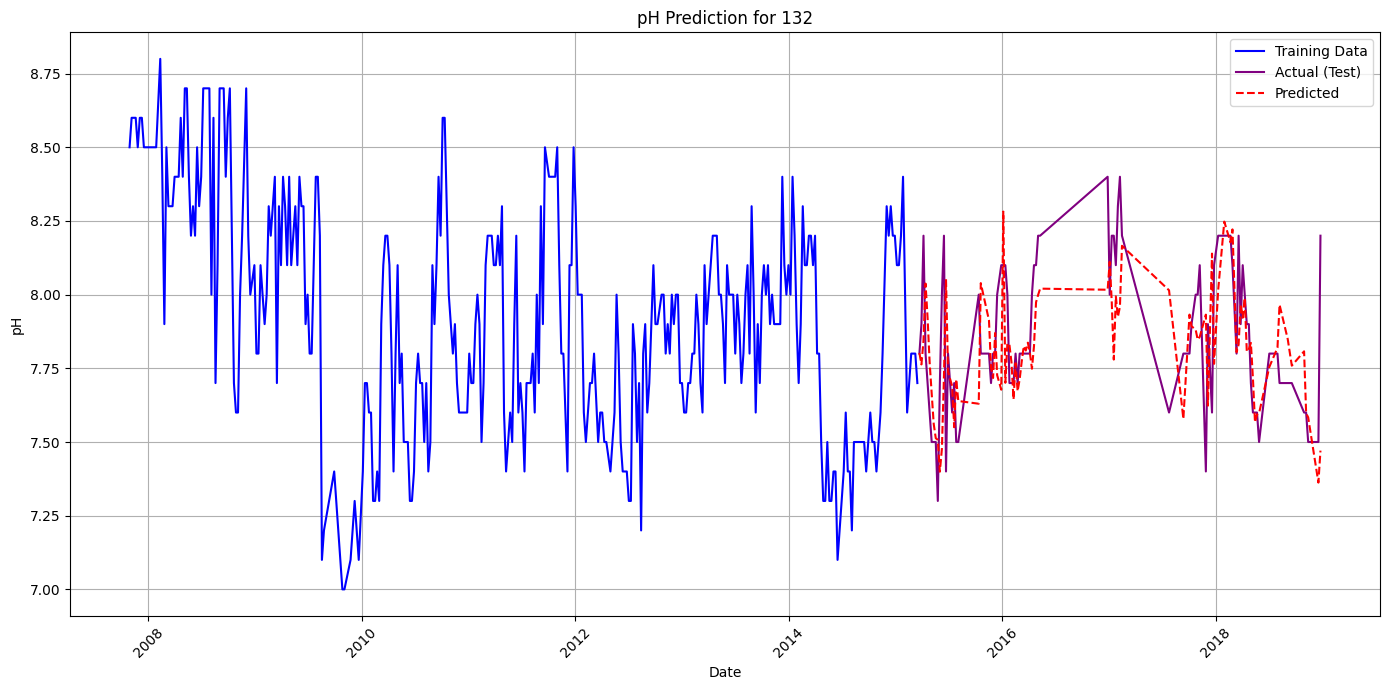

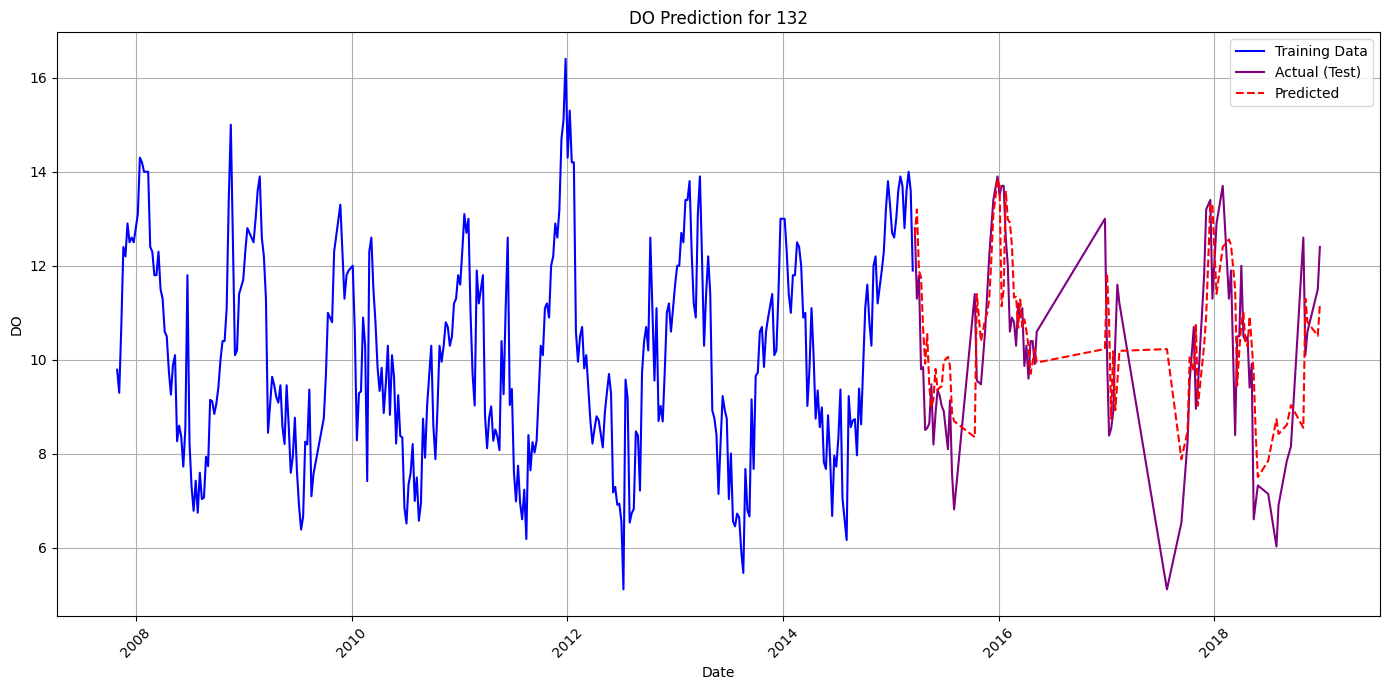

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import copy

# Add missing function that's referenced in the code
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100

# Modified create_sequences function to include time features
def create_sequences_with_time(data, time_data, seq_length):
    X, y = [], []
    time_features = []

    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
        time_features.append(time_data[i:i+seq_length])

    return np.array(X), np.array(y), np.array(time_features)

class ExponentialSmoothing(nn.Module):
    """Exponential Smoothing Layer for ETSformer"""
    def __init__(self, d_model, alpha=0.5):
        super(ExponentialSmoothing, self).__init__()
        self.alpha = alpha
        self.d_model = d_model
        self.weight = nn.Parameter(torch.ones(1, d_model))

    def forward(self, x):
        # Apply exponential smoothing
        smoothed = torch.zeros_like(x)
        smoothed[:, 0] = x[:, 0]
        for t in range(1, x.shape[1]):
            smoothed[:, t] = self.alpha * x[:, t] + (1 - self.alpha) * smoothed[:, t-1]
        return smoothed * self.weight

class ETSAttention(nn.Module):
    """ETSformer Attention Mechanism"""
    def __init__(self, d_model, n_heads, dropout=0.1):
        super(ETSAttention, self).__init__()
        self.multihead_attn = nn.MultiheadAttention(d_model, n_heads, dropout=dropout, batch_first=True)
        self.norm = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, level, trend):
        # Combine level and trend with input
        x_combined = x + level + trend
        # Multi-head attention
        attn_output, _ = self.multihead_attn(x_combined, x_combined, x_combined)
        # Add & Norm
        x = self.norm(x + self.dropout(attn_output))
        return x

class ETSformer(nn.Module):
    """ETSformer Model for Time Series Forecasting with conv layer and time features"""
    def __init__(self, num_features, d_model=64, n_heads=4, dropout=0.1, num_layers=2, time_dim=3):
        super(ETSformer, self).__init__()
        self.d_model = d_model
        self.num_features = num_features
        self.time_dim = time_dim

        # Input embedding with Conv1D as described in the paper
        self.input_embedding = nn.Conv1d(
            in_channels=num_features,
            out_channels=d_model,
            kernel_size=3,
            padding=1
        )

        # Time features embedding
        self.time_embedding = nn.Linear(time_dim, d_model)

        # Exponential smoothing layers
        self.level_smoothing = ExponentialSmoothing(d_model)
        self.trend_smoothing = ExponentialSmoothing(d_model)

        # ETSformer layers
        self.layers = nn.ModuleList([
            ETSAttention(d_model, n_heads, dropout) for _ in range(num_layers)
        ])

        # Output layer
        self.output_layer = nn.Linear(d_model, num_features)

    def forward(self, x, time_features):
        # Reshape for Conv1D: [batch, seq, features] -> [batch, features, seq]
        x_conv = x.transpose(1, 2)

        # Apply Conv1D for input embedding
        x_embedded = self.input_embedding(x_conv)

        # Reshape back: [batch, d_model, seq] -> [batch, seq, d_model]
        x_embedded = x_embedded.transpose(1, 2)

        # Embed time features [batch, seq, time_dim] -> [batch, seq, d_model]
        time_embedded = self.time_embedding(time_features)

        # Combine feature embeddings with time embeddings
        x_embedded = x_embedded + time_embedded

        # Initialize level and trend
        level = self.level_smoothing(x_embedded)
        trend = self.trend_smoothing(x_embedded)

        # Apply ETSformer layers
        for layer in self.layers:
            x_embedded = layer(x_embedded, level, trend)

        # Output prediction for the last time step
        output = self.output_layer(x_embedded[:, -1, :])
        return output

# Loss Functions
class LogCoshLoss(nn.Module):
    def forward(self, y_pred, y_true):
        return torch.mean(torch.log(torch.cosh(y_pred - y_true + 1e-12)))

class HuberLogCoshLoss(nn.Module):
    def __init__(self, delta=1.0):
        super().__init__()
        self.delta = delta

    def forward(self, y_pred, y_true):
        error = y_true - y_pred
        return torch.mean(torch.where(
            torch.abs(error) < self.delta,
            (error ** 2) / 2,
            torch.log(torch.cosh(error))
        ))

# Training Function
import copy

def train_etsformer_without_validation(data, features, seq_length=12, epochs=100):
    """
    Train an ETSformer model for multivariate time series forecasting with time features.
    Uses a simple 80-20 split for training and testing.
    """
    results = {}
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    if 'Place' not in data.columns or 'date' not in data.columns:
        print("Columns 'Place' and 'date' must exist in the dataset.")
        return None

    # Check if day, month, year columns exist
    time_columns = ['day', 'month', 'year']
    if not all(col in data.columns for col in time_columns):
        print(f"Columns {time_columns} must exist in the dataset.")
        return None

    # Split data into train (80%) and test (20%) sets for each location
    train_data_list = []
    test_data_dict = {}

    for place, group in data.groupby('Place'):
        group = group.dropna(subset=features + time_columns)

        if group.shape[0] < seq_length + 10:
            print(f"Skipping {place} due to insufficient data.")
            continue

        group = group.sort_values(by='date')
        split_idx = int(len(group) * 0.8)

        train_data_list.append(group.iloc[:split_idx])
        test_data_dict[place] = group.iloc[split_idx:]

    # Combine data from all locations for training
    train_data = pd.concat(train_data_list)

    # Prepare training data
    X_train = train_data[features].values

    # Convert time features to cyclical representation for training
    time_train = np.zeros((len(train_data), 3))
    time_train[:, 0] = train_data['day'].values / 31.0  # Normalize between 0 and 1
    time_train[:, 1] = train_data['month'].values / 12.0  # Normalize between 0 and 1

    # Normalize year
    min_year = train_data['year'].min()
    max_year = train_data['year'].max()
    if max_year > min_year:  # Avoid division by zero
        time_train[:, 2] = (train_data['year'].values - min_year) / (max_year - min_year)
    else:
        time_train[:, 2] = 0

    # Scale features
    scaler_X = StandardScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)

    # Create sequences
    X_train_seq, y_train_seq, time_train_seq = create_sequences_with_time(X_train_scaled, time_train, seq_length)

    # Convert to tensors
    X_train_tensor = torch.FloatTensor(X_train_seq)
    y_train_tensor = torch.FloatTensor(y_train_seq)
    time_train_tensor = torch.FloatTensor(time_train_seq)

    # Create dataset and data loader
    train_dataset = TensorDataset(X_train_tensor, time_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Initialize ETSformer model with time features
    model = ETSformer(
        num_features=len(features),
        d_model=64,
        n_heads=4,
        dropout=0.1,
        num_layers=2,
        time_dim=3  # day, month, year
    ).to(device)

    criterion = LogCoshLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

    # Training loop
    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0
        for batch_X, batch_time, batch_y in train_loader:
            batch_X, batch_time, batch_y = batch_X.to(device), batch_time.to(device), batch_y.to(device)
            optimizer.zero_grad()
            outputs = model(batch_X, batch_time)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_loader)

        # Print progress
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}')

    # Testing phase
    model.eval()
    for place, test_data in test_data_dict.items():
        X_test = test_data[features].values
        X_test_scaled = scaler_X.transform(X_test)
        test_dates = test_data['date'].values

        # Create time features for test data
        time_test = np.zeros((len(test_data), 3))
        time_test[:, 0] = test_data['day'].values / 31.0
        time_test[:, 1] = test_data['month'].values / 12.0
        if max_year > min_year:
            time_test[:, 2] = (test_data['year'].values - min_year) / (max_year - min_year)
        else:
            time_test[:, 2] = 0

        # Get the last sequence from training data for initial prediction
        input_seq = X_train_scaled[-seq_length:]
        input_time = time_train[-seq_length:]

        y_pred_scaled = []
        with torch.no_grad():
            for i in range(len(X_test_scaled)):
                seq_tensor = torch.FloatTensor(input_seq).unsqueeze(0).to(device)
                time_tensor = torch.FloatTensor(input_time).unsqueeze(0).to(device)

                prediction = model(seq_tensor, time_tensor).cpu().numpy()
                y_pred_scaled.append(prediction)

                # Update the input sequence with the latest test data
                input_seq = np.vstack((input_seq[1:], X_test_scaled[i]))
                input_time = np.vstack((input_time[1:], time_test[i]))

        y_pred = scaler_X.inverse_transform(np.array(y_pred_scaled).squeeze())
        y_test = X_test  # No need to inverse transform, we're using the original test data

        results[place] = {
            "model": model,
            "test_dates": test_dates,
            "predictions": y_pred,
            "actual": y_test
        }

        # Calculate and report metrics for each feature
        for i, feature in enumerate(features):
            mse = mean_squared_error(y_test[:, i], y_pred[:, i])
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_test[:, i], y_pred[:, i])
            r2 = r2_score(y_test[:, i], y_pred[:, i])
            mape = mean_absolute_percentage_error(y_test[:, i], y_pred[:, i])

            se_list = np.sqrt(np.square(y_test[:, i] - y_pred[:, i]))
            se_max = np.max(se_list)

            results[place][f'{feature}_metrics'] = {
                "mse": mse,
                "rmse": rmse,
                "mae": mae,
                "r2": r2,
                "mape": mape,
                "se_max": se_max
            }

            print(f"{place} - {feature}: RMSE={rmse:.3f}, MAE={mae:.3f}, R²={r2:.3f}, MAPE={mape:.3f}%, SE_max={se_max:.3f}")

        # Plot results
        plot_prediction_results(train_data, test_data, place, features, y_pred)

    return results

def plot_prediction_results(train_data, test_data, place, features, y_pred):
    """
    Plot the training and test results with predictions.
    """
    train_data_place = train_data[train_data['Place'] == place]

    train_dates_place = train_data_place['date'].values
    test_dates = test_data['date'].values

    train_values_place = train_data_place[features].values
    test_values = test_data[features].values

    for i, feature in enumerate(features):
        plt.figure(figsize=(14, 7))

        # Plot training data in blue
        plt.plot(train_dates_place, train_values_place[:, i], 'b-', label='Training Data')

        # Plot test data in purple
        plt.plot(test_dates, test_values[:, i], 'purple', label='Actual (Test)')

        # Plot predictions in red dashed line
        plt.plot(test_dates, y_pred[:, i], 'r--', label='Predicted')

        plt.title(f'{feature} Prediction for {place}')
        plt.xlabel('Date')
        plt.ylabel(feature)
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

def create_sequences_with_time(data, time_data, seq_length):
    """
    Create input sequences and targets from data and time features.
    """
    X, y, time_seq = [], [], []

    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
        time_seq.append(time_data[i:i + seq_length])

    return np.array(X), np.array(y), np.array(time_seq)

# Usage example:
features = ['NH4N', 'CODMn', 'pH', 'DO']
results = train_etsformer_without_validation(pivot_df, features, seq_length=4, epochs=50)

def create_sequences_with_time(data, time_data, seq_length):
    """
    Create input sequences and targets from data and time features.
    """
    X, y, time_seq = [], [], []

    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
        time_seq.append(time_data[i:i + seq_length])

    return np.array(X), np.array(y), np.array(time_seq)

ETSFormer 3 (CNN Growth Damping)

Epoch [20/30], Loss: 0.1145
132 - NH4N: RMSE=0.148, MAE=0.079, R²=0.458, MAPE=35.883%, SE_max=0.705
132 - CODMn: RMSE=0.665, MAE=0.519, R²=0.257, MAPE=15.106%, SE_max=2.059
132 - pH: RMSE=0.247, MAE=0.193, R²=0.015, MAPE=2.448%, SE_max=0.725
132 - DO: RMSE=1.503, MAE=1.025, R²=0.407, MAPE=10.730%, SE_max=5.384


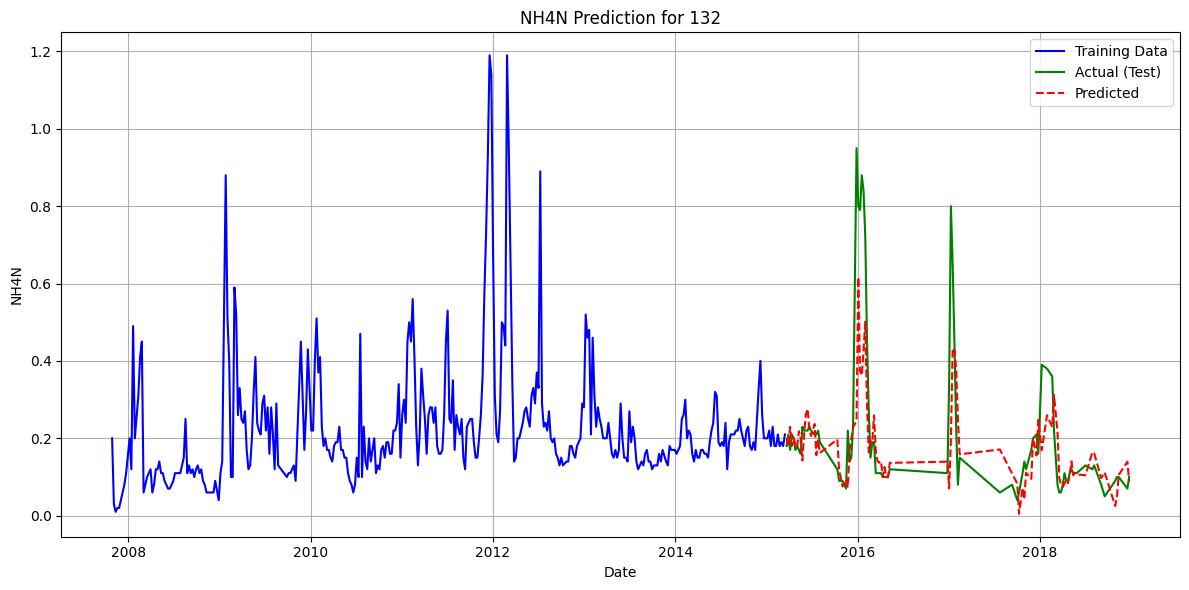

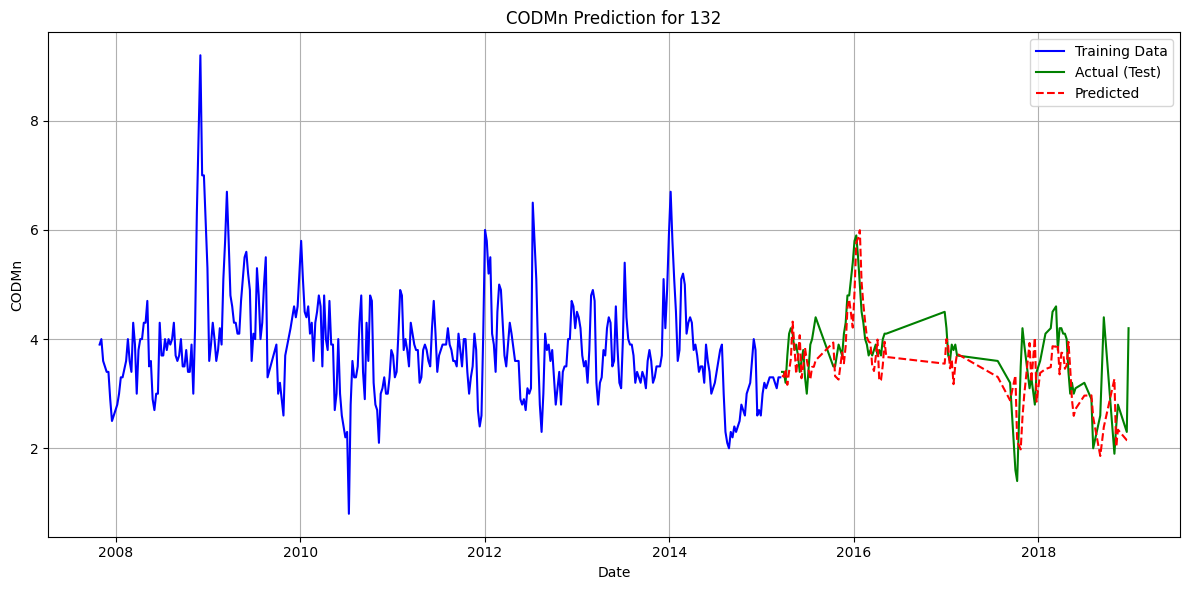

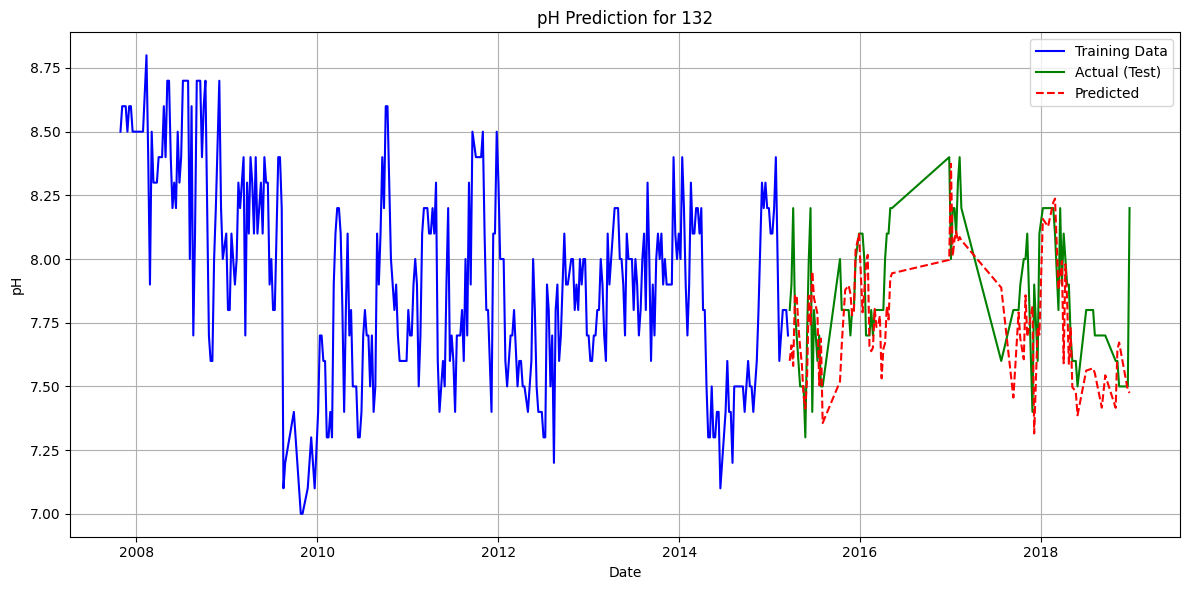

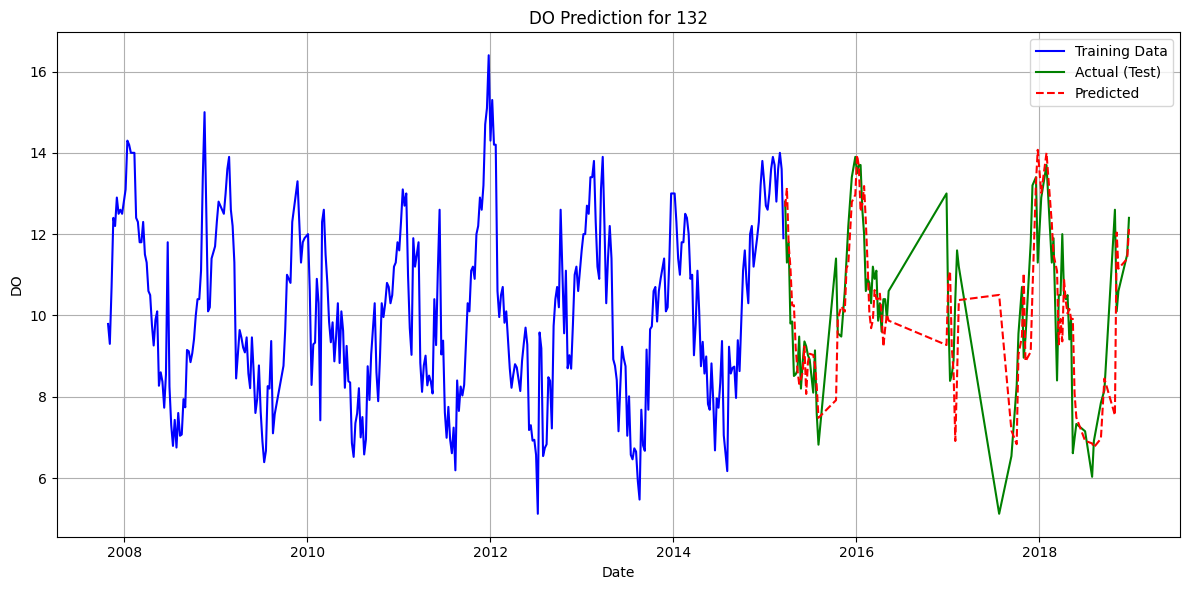

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Add missing function that's referenced in the code
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100

# Add missing function for creating sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# New function to extract time features from date column
def extract_time_features(df):
    """
    Extract time features (day, month, year) from a DataFrame with a 'date' column.
    Returns a DataFrame with the new features added.
    """
    df_copy = df.copy()

    # Convert date column to datetime if it's not already
    if not pd.api.types.is_datetime64_any_dtype(df_copy['date']):
        df_copy['date'] = pd.to_datetime(df_copy['date'])

    # Extract time features
    df_copy['day'] = df_copy['date'].dt.day
    df_copy['month'] = df_copy['date'].dt.month
    df_copy['year'] = df_copy['date'].dt.year

    # Option: add cyclical features for day and month
    df_copy['day_sin'] = np.sin(2 * np.pi * df_copy['day'] / 31)
    df_copy['day_cos'] = np.cos(2 * np.pi * df_copy['day'] / 31)
    df_copy['month_sin'] = np.sin(2 * np.pi * df_copy['month'] / 12)
    df_copy['month_cos'] = np.cos(2 * np.pi * df_copy['month'] / 12)

    return df_copy

class ExponentialSmoothing(nn.Module):
    """Exponential Smoothing Layer for ETSformer"""
    def __init__(self, d_model, alpha=0.5):
        super(ExponentialSmoothing, self).__init__()
        self.alpha = alpha
        self.d_model = d_model
        self.weight = nn.Parameter(torch.ones(1, d_model))

    def forward(self, x):
        # Apply exponential smoothing
        smoothed = torch.zeros_like(x)
        smoothed[:, 0] = x[:, 0]
        for t in range(1, x.shape[1]):
            smoothed[:, t] = self.alpha * x[:, t] + (1 - self.alpha) * smoothed[:, t-1]
        return smoothed * self.weight

class TrendDamping(nn.Module):
    """Growth Damping for ETSformer"""
    def __init__(self, d_model, forecast_horizon):
        super(TrendDamping, self).__init__()
        self.d_model = d_model
        self.forecast_horizon = forecast_horizon
        # Damping parameter (gamma in the paper)
        self.gamma = nn.Parameter(torch.ones(forecast_horizon, 1))

    def forward(self, trend):
        # trend: [batch_size, d_model]
        # Expand trend to match forecast horizon
        batch_size = trend.shape[0]
        damped_trend = torch.zeros(batch_size, self.forecast_horizon, self.d_model, device=trend.device)

        # Apply trend damping as described in the paper
        for j in range(self.forecast_horizon):
            damped_trend[:, j] = trend * torch.sum(self.gamma[:j+1])

        return damped_trend

class ForecastAttention(nn.Module):
    """Forecast Attention for seasonal patterns"""
    def __init__(self, d_model, seq_length, forecast_horizon, n_heads=4, dropout=0.1):
        super(ForecastAttention, self).__init__()
        self.d_model = d_model
        self.seq_length = seq_length
        self.forecast_horizon = forecast_horizon
        self.multihead_attn = nn.MultiheadAttention(d_model, n_heads, dropout=dropout, batch_first=True)

    def forward(self, seasonal):
        # seasonal: [batch_size, seq_length, d_model]
        batch_size = seasonal.shape[0]

        # Prepare forecast horizon queries (placeholder)
        queries = torch.zeros(batch_size, self.forecast_horizon, self.d_model, device=seasonal.device)

        # Use attention to project seasonal patterns to forecast horizon
        forecast_seasonal, _ = self.multihead_attn(queries, seasonal, seasonal)

        return forecast_seasonal

class ETSAttention(nn.Module):
    """ETSformer Attention Mechanism"""
    def __init__(self, d_model, n_heads, dropout=0.1):
        super(ETSAttention, self).__init__()
        self.multihead_attn = nn.MultiheadAttention(d_model, n_heads, dropout=dropout, batch_first=True)
        self.norm = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, level, trend):
        # Combine level and trend with input
        x_combined = x + level + trend
        # Multi-head attention
        attn_output, _ = self.multihead_attn(x_combined, x_combined, x_combined)
        # Add & Norm
        x = self.norm(x + self.dropout(attn_output))
        return x

class ETSformer(nn.Module):
    """ETSformer Model for Time Series Forecasting with updated decoder"""
    def __init__(self, num_features, seq_length, forecast_horizon=1, d_model=64, n_heads=4, dropout=0.1, num_layers=2):
        super(ETSformer, self).__init__()
        self.d_model = d_model
        self.num_features = num_features
        self.seq_length = seq_length
        self.forecast_horizon = forecast_horizon

        # Input embedding with Conv1D as described in the paper
        self.input_embedding = nn.Conv1d(
            in_channels=num_features,
            out_channels=d_model,
            kernel_size=3,
            padding=1
        )

        # Exponential smoothing layers
        self.level_smoothing = ExponentialSmoothing(d_model)
        self.trend_smoothing = ExponentialSmoothing(d_model)

        # ETSformer encoder layers
        self.layers = nn.ModuleList([
            ETSAttention(d_model, n_heads, dropout) for _ in range(num_layers)
        ])

        # Decoder components
        self.trend_damping = TrendDamping(d_model, forecast_horizon)
        self.forecast_attention = ForecastAttention(d_model, seq_length, forecast_horizon, n_heads)

        # Output layer
        self.output_layer = nn.Linear(d_model, num_features)

    def forward(self, x):
        batch_size = x.shape[0]

        # Reshape for Conv1D: [batch, seq, features] -> [batch, features, seq]
        x_conv = x.transpose(1, 2)

        # Apply Conv1D for input embedding
        x_embedded = self.input_embedding(x_conv)

        # Reshape back: [batch, d_model, seq] -> [batch, seq, d_model]
        x_embedded = x_embedded.transpose(1, 2)

        # Initialize level and trend
        level = self.level_smoothing(x_embedded)
        trend = self.trend_smoothing(x_embedded)

        # Apply ETSformer encoder layers
        for layer in self.layers:
            x_embedded = layer(x_embedded, level, trend)

        # Get the latest level, trend, and seasonal components
        last_level = level[:, -1]
        last_trend = trend[:, -1]
        seasonal = x_embedded  # Using the entire sequence for seasonal patterns

        # Decoder: Generate forecasts
        # 1. Repeat level for forecast horizon
        forecast_level = last_level.unsqueeze(1).repeat(1, self.forecast_horizon, 1)

        # 2. Apply trend damping for growth representation
        forecast_trend = self.trend_damping(last_trend)

        # 3. Use forecast attention for seasonal representation
        forecast_seasonal = self.forecast_attention(seasonal)

        # Combine components for final forecast
        forecast = forecast_level + forecast_trend + forecast_seasonal

        # Apply output layer to get final predictions for each time step in forecast horizon
        outputs = self.output_layer(forecast)

        # If forecast_horizon is 1, squeeze the dimension for backward compatibility
        if self.forecast_horizon == 1:
            outputs = outputs.squeeze(1)

        return outputs

# Loss Functions
class LogCoshLoss(nn.Module):
    def forward(self, y_pred, y_true):
        return torch.mean(torch.log(torch.cosh(y_pred - y_true + 1e-12)))

class HuberLogCoshLoss(nn.Module):
    def __init__(self, delta=1.0):
        super().__init__()
        self.delta = delta

    def forward(self, y_pred, y_true):
        error = y_true - y_pred
        return torch.mean(torch.where(
            torch.abs(error) < self.delta,
            (error ** 2) / 2,
            torch.log(torch.cosh(error))
        ))

# Modified Training Function with Time Features
def train_etsformer3(data, features, seq_length=12, forecast_horizon=1, epochs=100, include_time_features=True):
    """
    Train an ETSformer model for multivariate time series forecasting.
    Now supports time features (day, month, year).
    """
    results = {}
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    if 'Place' not in data.columns or 'date' not in data.columns:
        print("Columns 'Place' and 'date' must exist in the dataset.")
        return None

    # Add time features if requested
    if include_time_features:
        data = extract_time_features(data)
        # Add the time features to the feature list
        time_features = ['day', 'month', 'year']
        all_features = features + time_features
    else:
        all_features = features

    # Combine 80% of data from each location into a single training set
    train_data_list = []
    test_data_dict = {}
    for place, group in data.groupby('Place'):
        group = group.dropna(subset=all_features)

        if group.shape[0] < seq_length + 10:
            print(f"Skipping {place} due to insufficient data.")
            continue

        group = group.sort_values(by='date')
        split_idx = int(len(group) * 0.8)
        train_data_list.append(group.iloc[:split_idx])
        test_data_dict[place] = group.iloc[split_idx:]

    train_data = pd.concat(train_data_list)
    X_train = train_data[all_features].values
    scaler_X = StandardScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)

    X_train_seq, y_train_seq = create_sequences(X_train_scaled, seq_length)
    X_train_tensor = torch.FloatTensor(X_train_seq)
    y_train_tensor = torch.FloatTensor(y_train_seq)

    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=False)

    # Initialize ETSformer model with the updated number of features
    model = ETSformer(
        num_features=len(all_features),
        seq_length=seq_length,
        forecast_horizon=forecast_horizon,
        d_model=64,
        n_heads=4,
        dropout=0.1,
        num_layers=2
    ).to(device)

    criterion = HuberLogCoshLoss(delta=1.0)
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

    # Training loop
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            optimizer.zero_grad()
            outputs = model(batch_X)

            # Handle multi-step forecasting if necessary
            if forecast_horizon > 1:
                # Only use the first prediction for training
                loss = criterion(outputs[:, 0], batch_y)
            else:
                loss = criterion(outputs, batch_y)

            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        if (epoch + 1) % 20 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}')

    # Inference and evaluation
    model.eval()
    for place, test_data in test_data_dict.items():
        # Make sure test data also has time features if needed
        if include_time_features:
            test_data = extract_time_features(test_data)

        X_test = test_data[all_features].values
        X_test_scaled = scaler_X.transform(X_test)
        test_dates = test_data['date'].values

        # Use the last sequence from training data as initial input
        # Make sure to include time features in the initial sequence if they are used
        input_seq = X_train_scaled[-seq_length:]

        y_pred_scaled = []
        with torch.no_grad():
            for i in range(len(X_test_scaled)):
                seq_tensor = torch.FloatTensor(input_seq).unsqueeze(0).to(device)

                if forecast_horizon > 1:
                    prediction = model(seq_tensor)[:, 0].cpu().numpy()  # Only use first step for iterative prediction
                else:
                    prediction = model(seq_tensor).cpu().numpy()

                y_pred_scaled.append(prediction)

                # Update sequence with the next time step
                # We should use the actual values for time features
                next_input = X_test_scaled[i].copy()
                input_seq = np.vstack((input_seq[1:], next_input))

        y_pred = scaler_X.inverse_transform(np.array(y_pred_scaled).squeeze())
        y_test = X_test

        # Keep predictions and actual values only for the original features, not time features
        orig_feature_indices = [all_features.index(f) for f in features]
        y_pred_orig = y_pred[:, orig_feature_indices]
        y_test_orig = y_test[:, orig_feature_indices]

        results[place] = {
            "model": model,
            "test_dates": test_dates,
            "predictions": y_pred,
            "actual": y_test
        }

        for i, feature in enumerate(features):
            mse = mean_squared_error(y_test[:, i], y_pred[:, i])
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_test[:, i], y_pred[:, i])
            r2 = r2_score(y_test[:, i], y_pred[:, i])
            mape = mean_absolute_percentage_error(y_test[:, i], y_pred[:, i])

            se_list = np.sqrt(np.square(y_test[:, i] - y_pred[:, i]))
            se_max = np.max(se_list)

            results[place][f'{feature}_metrics'] = {
                "mse": mse,
                "rmse": rmse,
                "mae": mae,
                "r2": r2,
                "mape": mape,
                "se_max": se_max
            }

            print(f"{place} - {feature}: RMSE={rmse:.3f}, MAE={mae:.3f}, R²={r2:.3f}, MAPE={mape:.3f}%, SE_max={se_max:.3f}")

        # Plot results
        train_data_place = train_data[train_data['Place'] == place]
        train_dates_place = train_data_place['date'].values
        train_values_place = train_data[features].values

        for i, feature in enumerate(features):
            plt.figure(figsize=(12, 6))
            plt.plot(train_dates_place, train_values_place[:, i], 'b-', label='Training Data')
            plt.plot(test_dates, y_test[:, i], 'g-', label='Actual (Test)')
            plt.plot(test_dates, y_pred[:, i], 'r--', label='Predicted')
            plt.title(f'{feature} Prediction for {place}')
            plt.xlabel('Date')
            plt.ylabel(feature)
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

    return results

# Usage example:
features = ['NH4N', 'CODMn', 'pH', 'DO']
results = train_etsformer3(pivot_df, features, seq_length=4, forecast_horizon=20, epochs=30)

ORIGINAL ETSformer

In [ ]:
import torch
import torch.nn as nn
from einops import rearrange, reduce, repeat


class DampingLayer(nn.Module):

    def __init__(self, pred_len, nhead, dropout=0.1, output_attention=False):
        super().__init__()
        self.pred_len = pred_len
        self.nhead = nhead
        self.output_attention = output_attention
        self._damping_factor = nn.Parameter(torch.randn(1, nhead))
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = repeat(x, 'b 1 d -> b t d', t=self.pred_len)
        b, t, d = x.shape

        powers = torch.arange(self.pred_len).to(self._damping_factor.device) + 1
        powers = powers.view(self.pred_len, 1)
        damping_factors = self.damping_factor ** powers
        damping_factors = damping_factors.cumsum(dim=0)
        x = x.view(b, t, self.nhead, -1)
        x = self.dropout(x) * damping_factors.unsqueeze(-1)
        x = x.view(b, t, d)
        if self.output_attention:
            return x, damping_factors
        return x, None

    @property
    def damping_factor(self):
        return torch.sigmoid(self._damping_factor)


class DecoderLayer(nn.Module):

    def __init__(self, d_model, nhead, c_out, pred_len, dropout=0.1, output_attention=False):
        super().__init__()
        self.d_model = d_model
        self.nhead = nhead
        self.c_out = c_out
        self.pred_len = pred_len
        self.output_attention = output_attention

        self.growth_damping = DampingLayer(pred_len, nhead, dropout=dropout, output_attention=output_attention)
        self.dropout1 = nn.Dropout(dropout)

    def forward(self, growth, season):
        growth_horizon, growth_damping = self.growth_damping(growth[:, -1:])
        growth_horizon = self.dropout1(growth_horizon)

        seasonal_horizon = season[:, -self.pred_len:]

        if self.output_attention:
            return growth_horizon, seasonal_horizon, growth_damping
        return growth_horizon, seasonal_horizon, None


class Decoder(nn.Module):

    def __init__(self, layers):
        super().__init__()
        self.d_model = layers[0].d_model
        self.c_out = layers[0].c_out
        self.pred_len = layers[0].pred_len
        self.nhead = layers[0].nhead

        self.layers = nn.ModuleList(layers)
        self.pred = nn.Linear(self.d_model, self.c_out)

    def forward(self, growths, seasons):
        growth_repr = []
        season_repr = []
        growth_dampings = []

        for idx, layer in enumerate(self.layers):
            growth_horizon, season_horizon, growth_damping = layer(growths[idx], seasons[idx])
            growth_repr.append(growth_horizon)
            season_repr.append(season_horizon)
            growth_dampings.append(growth_damping)
        growth_repr = sum(growth_repr)
        season_repr = sum(season_repr)
        return self.pred(growth_repr), self.pred(season_repr), growth_dampings
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.fft as fft

import numpy as np
from einops import rearrange, reduce, repeat
import math, random


class GrowthLayer(nn.Module):

    def __init__(self, d_model, nhead, d_head=None, dropout=0.1, output_attention=False):
        super().__init__()
        self.d_head = d_head or (d_model // nhead)
        self.d_model = d_model
        self.nhead = nhead
        self.output_attention = output_attention

        self.z0 = nn.Parameter(torch.randn(self.nhead, self.d_head))
        self.in_proj = nn.Linear(self.d_model, self.d_head * self.nhead)
        self.es = ExponentialSmoothing(self.d_head, self.nhead, dropout=dropout)
        self.out_proj = nn.Linear(self.d_head * self.nhead, self.d_model)

        assert self.d_head * self.nhead == self.d_model, "d_model must be divisible by nhead"

    def forward(self, inputs):
        """
        :param inputs: shape: (batch, seq_len, dim)
        :return: shape: (batch, seq_len, dim)
        """
        b, t, d = inputs.shape
        values = self.in_proj(inputs).view(b, t, self.nhead, -1)
        values = torch.cat([repeat(self.z0, 'h d -> b 1 h d', b=b), values], dim=1)
        values = values[:, 1:] - values[:, :-1]
        out = self.es(values)
        out = torch.cat([repeat(self.es.v0, '1 1 h d -> b 1 h d', b=b), out], dim=1)
        out = rearrange(out, 'b t h d -> b t (h d)')
        out = self.out_proj(out)

        if self.output_attention:
            return out, self.es.get_exponential_weight(t)[1]
        return out, None


class FourierLayer(nn.Module):

    def __init__(self, d_model, pred_len, k=None, low_freq=1, output_attention=False):
        super().__init__()
        self.d_model = d_model
        self.pred_len = pred_len
        self.k = k
        self.low_freq = low_freq
        self.output_attention = output_attention

    def forward(self, x):
        """x: (b, t, d)"""

        if self.output_attention:
            return self.dft_forward(x)

        b, t, d = x.shape
        x_freq = fft.rfft(x, dim=1)

        if t % 2 == 0:
            x_freq = x_freq[:, self.low_freq:-1]
            f = fft.rfftfreq(t)[self.low_freq:-1]
        else:
            x_freq = x_freq[:, self.low_freq:]
            f = fft.rfftfreq(t)[self.low_freq:]

        x_freq, index_tuple = self.topk_freq(x_freq)
        f = repeat(f, 'f -> b f d', b=x_freq.size(0), d=x_freq.size(2))
        f = rearrange(f[index_tuple], 'b f d -> b f () d').to(x_freq.device)

        return self.extrapolate(x_freq, f, t), None

    def extrapolate(self, x_freq, f, t):
        x_freq = torch.cat([x_freq, x_freq.conj()], dim=1)
        f = torch.cat([f, -f], dim=1)
        t_val = rearrange(torch.arange(t + self.pred_len, dtype=torch.float),
                      't -> () () t ()').to(x_freq.device)

        amp = rearrange(x_freq.abs() / t, 'b f d -> b f () d')
        phase = rearrange(x_freq.angle(), 'b f d -> b f () d')

        x_time = amp * torch.cos(2 * math.pi * f * t_val + phase)

        return reduce(x_time, 'b f t d -> b t d', 'sum')

    def topk_freq(self, x_freq):
        values, indices = torch.topk(x_freq.abs(), self.k, dim=1, largest=True, sorted=True)
        mesh_a, mesh_b = torch.meshgrid(torch.arange(x_freq.size(0)), torch.arange(x_freq.size(2)))
        index_tuple = (mesh_a.unsqueeze(1), indices, mesh_b.unsqueeze(1))
        x_freq = x_freq[index_tuple]

        return x_freq, index_tuple

    def dft_forward(self, x):
        T = x.size(1)

        dft_mat = fft.fft(torch.eye(T))
        i, j = torch.meshgrid(torch.arange(self.pred_len + T), torch.arange(T))
        omega = np.exp(2 * math.pi * 1j / T)
        idft_mat = (np.power(omega, i * j) / T).cfloat()

        x_freq = torch.einsum('ft,btd->bfd', [dft_mat, x.cfloat()])

        if T % 2 == 0:
            x_freq = x_freq[:, self.low_freq:T // 2]
        else:
            x_freq = x_freq[:, self.low_freq:T // 2 + 1]

        _, indices = torch.topk(x_freq.abs(), self.k, dim=1, largest=True, sorted=True)
        indices = indices + self.low_freq
        indices = torch.cat([indices, -indices], dim=1)

        dft_mat = repeat(dft_mat, 'f t -> b f t d', b=x.shape[0], d=x.shape[-1])
        idft_mat = repeat(idft_mat, 't f -> b t f d', b=x.shape[0], d=x.shape[-1])

        mesh_a, mesh_b = torch.meshgrid(torch.arange(x.size(0)), torch.arange(x.size(2)))

        dft_mask = torch.zeros_like(dft_mat)
        dft_mask[mesh_a, indices, :, mesh_b] = 1
        dft_mat = dft_mat * dft_mask

        idft_mask = torch.zeros_like(idft_mat)
        idft_mask[mesh_a, :, indices, mesh_b] = 1
        idft_mat = idft_mat * idft_mask

        attn = torch.einsum('bofd,bftd->botd', [idft_mat, dft_mat]).real
        return torch.einsum('botd,btd->bod', [attn, x]), rearrange(attn, 'b o t d -> b d o t')


class LevelLayer(nn.Module):

    def __init__(self, d_model, c_out, dropout=0.1):
        super().__init__()
        self.d_model = d_model
        self.c_out = c_out

        self.es = ExponentialSmoothing(1, self.c_out, dropout=dropout, aux=True)
        self.growth_pred = nn.Linear(self.d_model, self.c_out)
        self.season_pred = nn.Linear(self.d_model, self.c_out)

    def forward(self, level, growth, season):
        b, t, _ = level.shape
        growth = self.growth_pred(growth).view(b, t, self.c_out, 1)
        season = self.season_pred(season).view(b, t, self.c_out, 1)
        growth = growth.view(b, t, self.c_out, 1)
        season = season.view(b, t, self.c_out, 1)
        level = level.view(b, t, self.c_out, 1)
        out = self.es(level - season, aux_values=growth)
        out = rearrange(out, 'b t h d -> b t (h d)')
        return out

class EncoderLayer(nn.Module):

    def __init__(self, d_model, nhead, c_out, seq_len, pred_len, k, dim_feedforward=None, dropout=0.1,
                 activation='sigmoid', layer_norm_eps=1e-5, output_attention=False):
        super().__init__()
        self.d_model = d_model
        self.nhead = nhead
        self.c_out = c_out
        self.seq_len = seq_len
        self.pred_len = pred_len
        dim_feedforward = dim_feedforward or 4 * d_model
        self.dim_feedforward = dim_feedforward

        self.growth_layer = GrowthLayer(d_model, nhead, dropout=dropout, output_attention=output_attention)
        self.seasonal_layer = FourierLayer(d_model, pred_len, k=k, output_attention=output_attention)
        self.level_layer = LevelLayer(d_model, c_out, dropout=dropout)

        # Implementation of Feedforward model
        self.ff = Feedforward(d_model, dim_feedforward, dropout=dropout, activation=activation)
        self.norm1 = nn.LayerNorm(d_model, eps=layer_norm_eps)
        self.norm2 = nn.LayerNorm(d_model, eps=layer_norm_eps)

        self.dropout1 = nn.Dropout(dropout)
        self.dropout2 = nn.Dropout(dropout)

    def forward(self, res, level, attn_mask=None):
        season, season_attn = self._season_block(res)
        res = res - season[:, :-self.pred_len]
        growth, growth_attn = self._growth_block(res)
        res = self.norm1(res - growth[:, 1:])
        res = self.norm2(res + self.ff(res))

        level = self.level_layer(level, growth[:, :-1], season[:, :-self.pred_len])

        return res, level, growth, season, season_attn, growth_attn

    def _growth_block(self, x):
        x, growth_attn = self.growth_layer(x)
        return self.dropout1(x), growth_attn

    def _season_block(self, x):
        x, season_attn = self.seasonal_layer(x)
        return self.dropout2(x), season_attn


class Encoder(nn.Module):

    def __init__(self, layers):
        super().__init__()
        self.layers = nn.ModuleList(layers)

    def forward(self, res, level, attn_mask=None):
        growths = []
        seasons = []
        season_attns = []
        growth_attns = []
        for layer in self.layers:
            res, level, growth, season, season_attn, growth_attn = layer(res, level, attn_mask=None)
            growths.append(growth)
            seasons.append(season)
            season_attns.append(season_attn)
            growth_attns.append(growth_attn)

        return level, growths, seasons, season_attns, growth_attns
        import math

import torch
import torch.nn as nn
import torch.fft as fft

from einops import rearrange, reduce, repeat
from scipy.fftpack import next_fast_len


def conv1d_fft(f, g, dim=-1):
    N = f.size(dim)
    M = g.size(dim)

    fast_len = next_fast_len(N + M - 1)

    F_f = fft.rfft(f, fast_len, dim=dim)
    F_g = fft.rfft(g, fast_len, dim=dim)

    F_fg = F_f * F_g.conj()
    out = fft.irfft(F_fg, fast_len, dim=dim)
    out = out.roll((-1,), dims=(dim,))
    idx = torch.as_tensor(range(fast_len - N, fast_len)).to(out.device)
    out = out.index_select(dim, idx)

    return out


class ExponentialSmoothing(nn.Module):

    def __init__(self, dim, nhead, dropout=0.1, aux=False):
        super().__init__()
        self._smoothing_weight = nn.Parameter(torch.randn(nhead, 1))
        self.v0 = nn.Parameter(torch.randn(1, 1, nhead, dim))
        self.dropout = nn.Dropout(dropout)
        if aux:
            self.aux_dropout = nn.Dropout(dropout)

    def forward(self, values, aux_values=None):
        b, t, h, d = values.shape

        init_weight, weight = self.get_exponential_weight(t)
        output = conv1d_fft(self.dropout(values), weight, dim=1)
        output = init_weight * self.v0 + output

        if aux_values is not None:
            aux_weight = weight / (1 - self.weight) * self.weight
            aux_output = conv1d_fft(self.aux_dropout(aux_values), aux_weight)
            output = output + aux_output

        return output

    def get_exponential_weight(self, T):
        # Generate array [0, 1, ..., T-1]
        powers = torch.arange(T, dtype=torch.float, device=self.weight.device)

        # (1 - \alpha) * \alpha^t, for all t = T-1, T-2, ..., 0]
        weight = (1 - self.weight) * (self.weight ** torch.flip(powers, dims=(0,)))

        # \alpha^t for all t = 1, 2, ..., T
        init_weight = self.weight ** (powers + 1)

        return rearrange(init_weight, 'h t -> 1 t h 1'), \
               rearrange(weight, 'h t -> 1 t h 1')

    @property
    def weight(self):
        return torch.sigmoid(self._smoothing_weight)
import torch
import torch.nn as nn
from einops import reduce

class Transform:
    def __init__(self, sigma):
        self.sigma = sigma

    @torch.no_grad()
    def transform(self, x):
        return self.jitter(self.shift(self.scale(x)))

    def jitter(self, x):
        return x + (torch.randn(x.shape).to(x.device) * self.sigma)

    def scale(self, x):
        return x * (torch.randn(x.size(-1)).to(x.device) * self.sigma + 1)

    def shift(self, x):
        return x + (torch.randn(x.size(-1)).to(x.device) * self.sigma)


class ETSformer(nn.Module):

    def __init__(self, configs):
        super().__init__()
        self.seq_len = configs.seq_len
        self.label_len = configs.label_len
        self.pred_len = configs.pred_len

        self.configs = configs

        assert configs.e_layers == configs.d_layers, "Encoder and decoder layers must be equal"

        # Embedding
        self.enc_embedding = ETSEmbedding(configs.enc_in, configs.d_model, dropout=configs.dropout)

        # Encoder
        self.encoder = Encoder(
            [
                EncoderLayer(
                    configs.d_model, configs.n_heads, configs.c_out, configs.seq_len, configs.pred_len, configs.K,
                    dim_feedforward=configs.d_ff,
                    dropout=configs.dropout,
                    activation=configs.activation,
                    output_attention=configs.output_attention,
                ) for _ in range(configs.e_layers)
            ]
        )

        # Decoder
        self.decoder = Decoder(
            [
                DecoderLayer(
                    configs.d_model, configs.n_heads, configs.c_out, configs.pred_len,
                    dropout=configs.dropout,
                    output_attention=configs.output_attention,
                ) for _ in range(configs.d_layers)
            ],
        )

        self.transform = Transform(sigma=self.configs.std)

    def forward(self, x_enc, x_mark_enc, x_dec, x_mark_dec,
                enc_self_mask=None, dec_self_mask=None, dec_enc_mask=None,
                decomposed=False, attention=False):
        with torch.no_grad():
            if self.training:
                x_enc = self.transform.transform(x_enc)
        res = self.enc_embedding(x_enc)
        level, growths, seasons, season_attns, growth_attns = self.encoder(res, x_enc, attn_mask=enc_self_mask)

        growth, season, growth_dampings = self.decoder(growths, seasons)

        if decomposed:
            return level[:, -1:], growth, season

        preds = level[:, -1:] + growth + season

        if attention:
            decoder_growth_attns = []
            for growth_attn, growth_damping in zip(growth_attns, growth_dampings):
                decoder_growth_attns.append(torch.einsum('bth,oh->bhot', [growth_attn.squeeze(-1), growth_damping]))

            season_attns = torch.stack(season_attns, dim=0)[:, :, -self.pred_len:]
            season_attns = reduce(season_attns, 'l b d o t -> b o t', reduction='mean')
            decoder_growth_attns = torch.stack(decoder_growth_attns, dim=0)[:, :, -self.pred_len:]
            decoder_growth_attns = reduce(decoder_growth_attns, 'l b d o t -> b o t', reduction='mean')
            return preds, season_attns, decoder_growth_attns
        return preds
import torch.nn as nn
import torch.nn.functional as F


class ETSEmbedding(nn.Module):
    def __init__(self, c_in, d_model, dropout=0.1):
        super().__init__()
        self.conv = nn.Conv1d(in_channels=c_in, out_channels=d_model,
                              kernel_size=3, padding=2, bias=False)
        self.dropout = nn.Dropout(p=dropout)
        nn.init.kaiming_normal_(self.conv.weight)

    def forward(self, x,):
        x = self.conv(x.permute(0,2,1))[..., :-2]
        return self.dropout(x.transpose(1,2))


class Feedforward(nn.Module):
    def __init__(self, d_model, dim_feedforward, dropout=0.1, activation='sigmoid'):
        # Implementation of Feedforward model
        super().__init__()
        self.linear1 = nn.Linear(d_model, dim_feedforward, bias=False)
        self.dropout1 = nn.Dropout(dropout)
        self.linear2 = nn.Linear(dim_feedforward, d_model, bias=False)
        self.dropout2 = nn.Dropout(dropout)
        self.activation = getattr(F, activation)

    def forward(self, x):
        x = self.linear2(self.dropout1(self.activation(self.linear1(x))))
        return self.dropout2(x)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
class Config:
    def __init__(self):
        self.seq_len = 24
        self.label_len = 12
        self.pred_len = 12
        self.enc_in = 4  # Number of input features (NH4N, CODMn, pH, DO)
        self.c_out = 4    # Number of output features
        self.d_model = 512
        self.n_heads = 16
        self.e_layers = 2
        self.d_layers = 2
        self.d_ff = 2048
        self.K = 1        # Top-k frequencies to keep
        self.dropout = 0.1
        self.activation = 'gelu'
        self.output_attention = False
        self.std = 0.2    # Standard deviation for data augmentation

configs = Config()
class HuberLogCoshLoss(nn.Module):
    def __init__(self, delta=1.0):
        super().__init__()
        self.delta = delta

    def forward(self, y_pred, y_true):
        error = y_true - y_pred
        return torch.mean(torch.where(
            torch.abs(error) < self.delta,
            (error ** 2) / 2,  # MSE-like behavior for small errors
            torch.log(torch.cosh(error))  # Log-Cosh behavior for large errors
        ))
def train_etsformer_multivariate(data, features, seq_length=24, pred_length=12, epochs=100):
    """
    Train an ETSformer model for multivariate time series forecasting.

    Args:
    data (DataFrame): The dataset with 'Place', 'date', and feature columns.
    features (list): Feature column names.
    seq_length (int): Sequence length for transformer input.
    pred_length (int): Prediction length.
    epochs (int): Number of training epochs.

    Returns:
    dict: A dictionary containing models and evaluation metrics for each place.
    """
    results = {}
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    if 'Place' not in data.columns or 'date' not in data.columns:
        print("Columns 'Place' and 'date' must exist in the dataset.")
        return None
    #This add time features::
    data = add_time_features(data)
    # Add the time features to the feature list
    time_features = ['day', 'month', 'year']
    features = features + time_features

    # Combine 80% of data from each location into a single training set
    train_data_list = []
    test_data_dict = {}
    for place, group in data.groupby('Place'):
        # Drop rows with missing values in selected columns
        group = group.dropna(subset=features)

        if group.shape[0] < seq_length + pred_length + 10:  # Skip locations with too few data points
            print(f"Skipping {place} due to insufficient data.")
            continue

        # Sort by date to maintain time order
        group = group.sort_values(by='date')

        # Time-based split (80% train, 20% test)
        split_idx = int(len(group) * 0.8)
        train_data_list.append(group.iloc[:split_idx])
        test_data_dict[place] = group.iloc[split_idx:]

    # Combine all training data
    train_data = pd.concat(train_data_list)

    # Extract features for training
    X_train = train_data[features].values

    # Normalize the training data
    scaler_X = StandardScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)

    # Create sequences for training
    X_train_seq, y_train_seq = create_sequences(X_train_scaled, seq_length, pred_length)

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train_seq)
    y_train_tensor = torch.FloatTensor(y_train_seq)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    # Initialize ETSformer model
    configs = Config()
    configs.seq_len = seq_length
    configs.pred_len = pred_length
    configs.enc_in = len(features)
    configs.c_out = len(features)

    model = ETSformer(configs).to(device)

    # Loss and optimizer
    # criterion = HuberLogCoshLoss(delta=1.0)
    criterion = nn.MSELoss();
    optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)

    # Training loop
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            # Forward pass
            optimizer.zero_grad()
            outputs = model(batch_X, None, None, None)
            loss = criterion(outputs, batch_y)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}')

    # Prepare for inference on individual test sets
    model.eval()

    for place, test_data in test_data_dict.items():
        # Extract features for testing
        X_test = test_data[features].values

        # Normalize the test data using the same scalers
        X_test_scaled = scaler_X.transform(X_test)

        # Create sequences from test data for prediction
        test_dates = test_data['date'].values

        # Initialize with the last sequence from training data
        input_seq = X_train_scaled[-seq_length:]

        # Recursive forecasting
        y_pred_scaled = []

        with torch.no_grad():
            for i in range(0, len(X_test_scaled), pred_length):
                # Convert sequence to tensor
                seq_tensor = torch.FloatTensor(input_seq).unsqueeze(0).to(device)

                # Predict next values
                predictions = model(seq_tensor, None, None, None).cpu().numpy()

                # Take only the predictions we need (might be less than pred_length at the end)
                current_pred_length = min(pred_length, len(X_test_scaled) - i)
                y_pred_scaled.extend(predictions[0, :current_pred_length])

                # Update input sequence with actual test values (for recursive forecasting)
                if i + pred_length < len(X_test_scaled):
                    input_seq = np.vstack((input_seq[current_pred_length:], X_test_scaled[i:i+current_pred_length]))
                else:
                    # For the last partial batch
                    remaining = len(X_test_scaled) - i
                    input_seq = np.vstack((input_seq[remaining:], X_test_scaled[i:i+remaining]))

        # Convert predictions back to original scale
        y_pred = scaler_X.inverse_transform(np.array(y_pred_scaled).reshape(-1, len(features)))

        # Actual test values
        y_test = scaler_X.inverse_transform(X_test_scaled)

        # Store results
        results[place] = {
            "model": model,
            "test_dates": test_dates,
            "predictions": y_pred,
            "actual": y_test
        }

        # Calculate evaluation metrics for each feature
        for i, feature in enumerate(features):
            mse = mean_squared_error(y_test[:, i], y_pred[:, i])
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_test[:, i], y_pred[:, i])
            r2 = r2_score(y_test[:, i], y_pred[:, i])
            mape = mean_absolute_percentage_error(y_test[:, i], y_pred[:, i])

            se_list = np.sqrt((y_test[:, i]-y_pred[:, i])**2)
            max_se = np.max(se_list)

            # Add metrics to results
            results[place][f'{feature}_metrics'] = {
                "mse": mse,
                "rmse": rmse,
                "mae": mae,
                "r2": r2,
                "mape": mape,
                "max_se": max_se
            }

            print(f"{place} - {feature}: RMSE={rmse:.3f}, MAE={mae:.3f}, R²={r2:.3f}, MAPE={mape:.3f}%", f"Max SE={max_se:.3f}")

        # Plot results for each feature
        for i, feature in enumerate(features):
            plt.figure(figsize=(15, 6))

            # Get training data for the current location
            train_data_place = train_data[train_data['Place'] == place]
            train_dates_place = train_data_place['date'].values
            train_values_place = train_data_place[features].values

            # Plot training data
            plt.plot(train_dates_place, train_values_place[:, i], 'b-', label='Training Data', alpha=0.7)

            # Plot test data
            plt.plot(test_dates, y_test[:, i], 'g-', label='Actual (Test)', linewidth=2)
            plt.plot(test_dates, y_pred[:, i], 'r--', label='Predicted', linewidth=2)

            # Add vertical line separating train and test
            split_date = test_dates[0]
            plt.axvline(x=split_date, color='k', linestyle='--', linewidth=1)
            plt.text(split_date, plt.ylim()[1]*0.9, ' Train/Test Split', ha='left', va='center')

            plt.title(f'{feature} Prediction for {place} using ETSformer')
            plt.xlabel('Date')
            plt.ylabel(feature)
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

    return results


def create_sequences(data, seq_length, pred_length):
    """
    Create input sequences and corresponding targets for time series forecasting.

    Args:
        data: numpy array of shape (timesteps, features)
        seq_length: length of input sequence
        pred_length: length of prediction sequence

    Returns:
        X: input sequences of shape (samples, seq_length, features)
        y: target sequences of shape (samples, pred_length, features)
    """
    X, y = [], []
    for i in range(len(data) - seq_length - pred_length + 1):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length:i+seq_length+pred_length])
    return np.array(X), np.array(y)

Epoch [10/120], Loss: 0.5491
Epoch [20/120], Loss: 0.4982
Epoch [30/120], Loss: 0.5054
Epoch [40/120], Loss: 0.4598
Epoch [50/120], Loss: 0.4530
Epoch [60/120], Loss: 0.4366
Epoch [70/120], Loss: 0.4144
Epoch [80/120], Loss: 0.3888
Epoch [90/120], Loss: 0.4426
Epoch [100/120], Loss: 0.3700
Epoch [110/120], Loss: 0.3744
Epoch [120/120], Loss: 0.3491
132 - NH4N: RMSE=0.145, MAE=0.072, R²=0.482, MAPE=0.290% Max SE=0.780
132 - CODMn: RMSE=0.579, MAE=0.434, R²=0.437, MAPE=0.129% Max SE=1.916
132 - pH: RMSE=0.225, MAE=0.177, R²=0.181, MAPE=0.022% Max SE=0.680
132 - DO: RMSE=1.413, MAE=1.025, R²=0.476, MAPE=0.109% Max SE=5.578
132 - day: RMSE=9.568, MAE=7.090, R²=-0.091, MAPE=1.157% Max SE=22.951
132 - month: RMSE=2.168, MAE=1.274, R²=0.651, MAPE=0.595% Max SE=9.562
132 - year: RMSE=0.952, MAE=0.882, R²=0.362, MAPE=0.000% Max SE=1.896


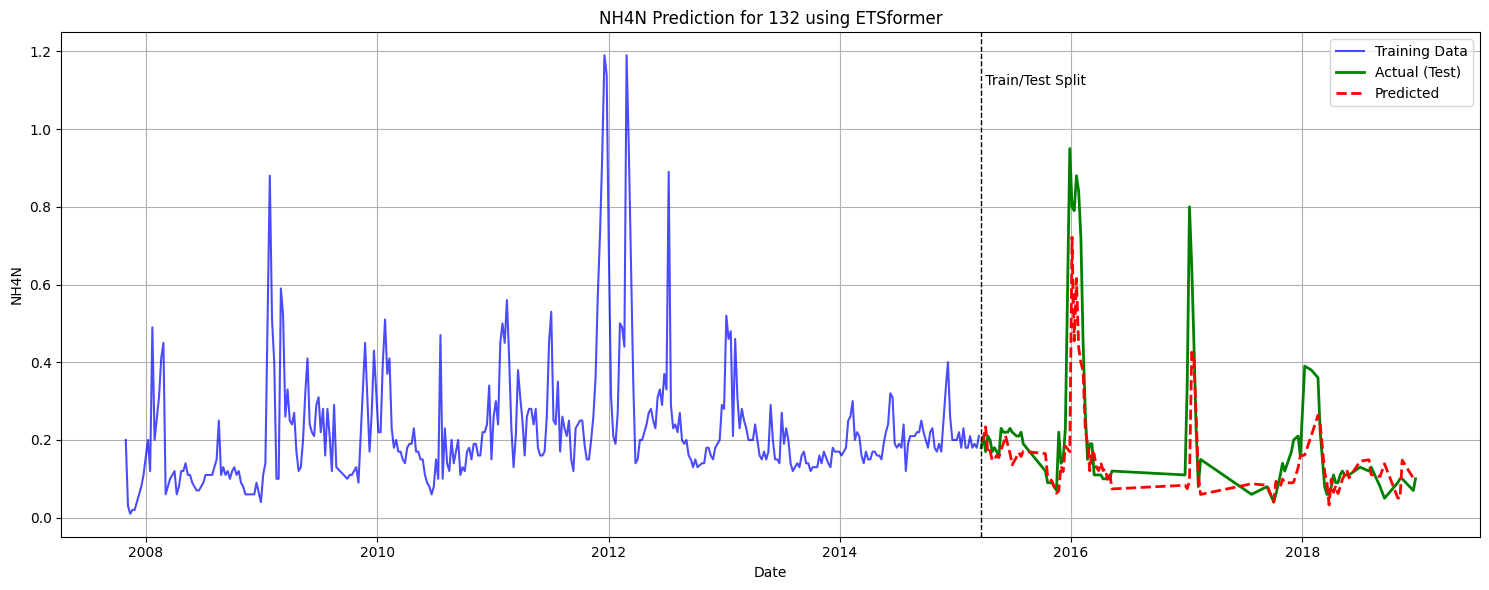

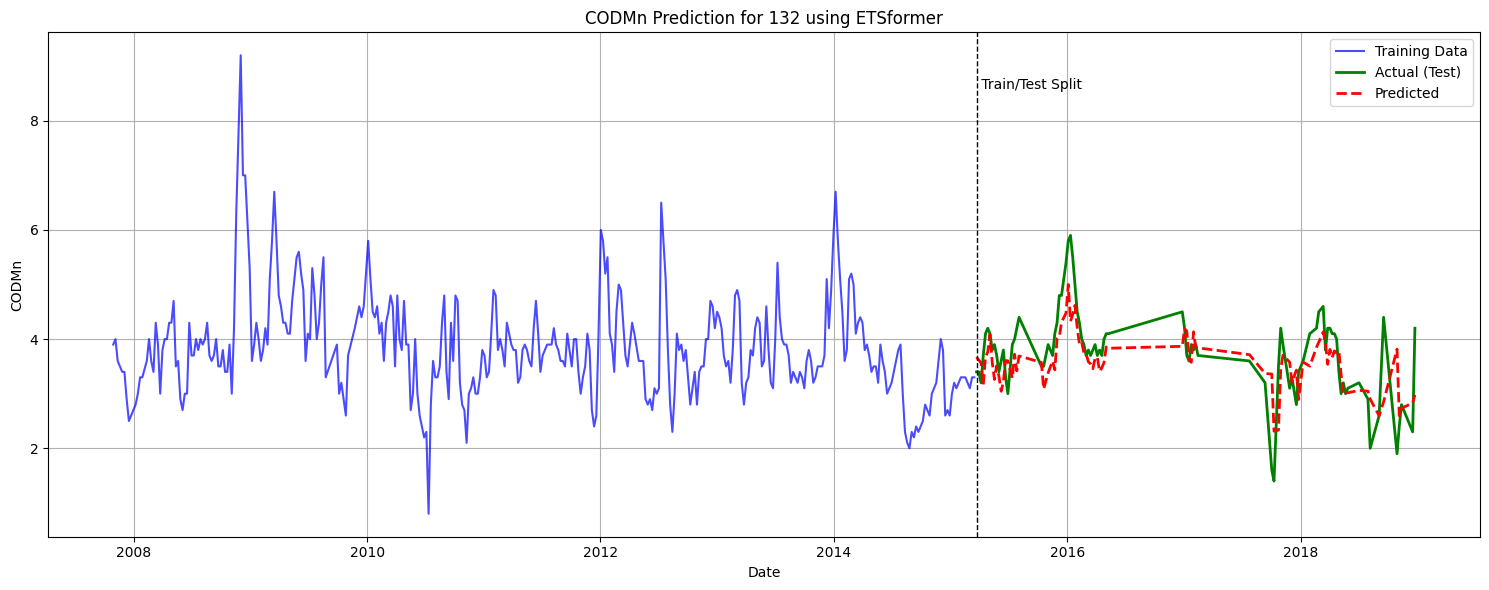

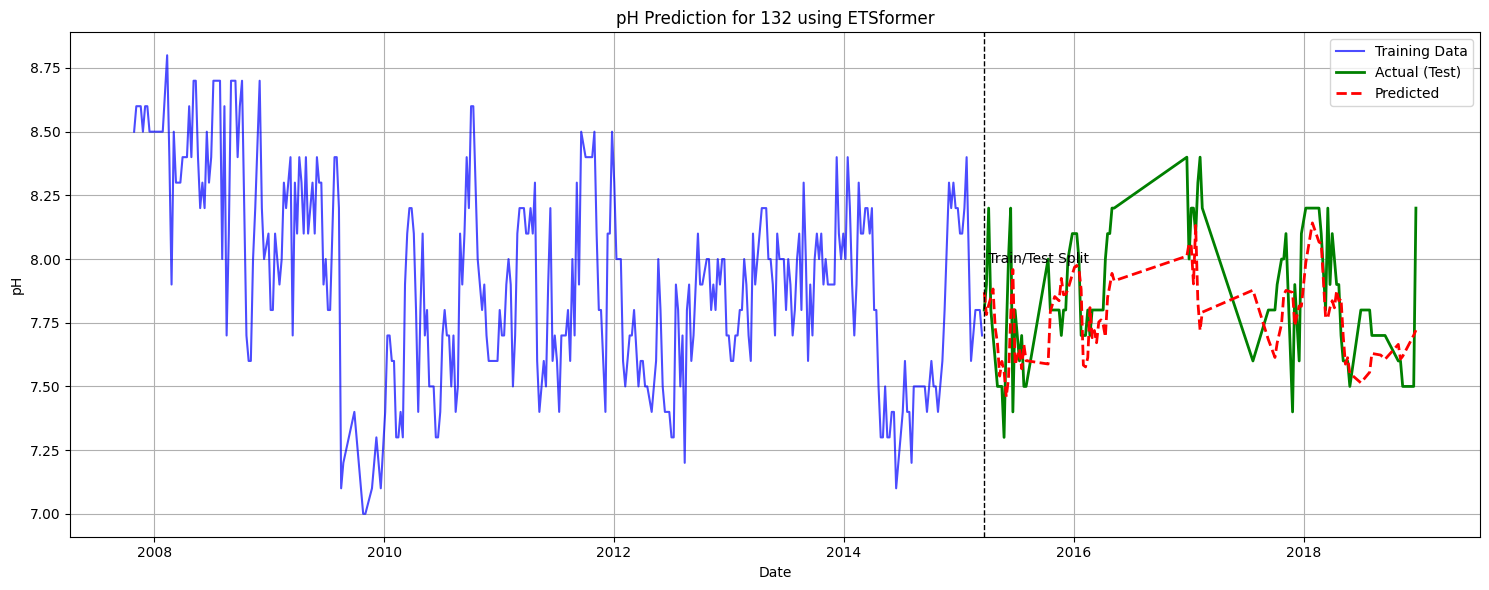

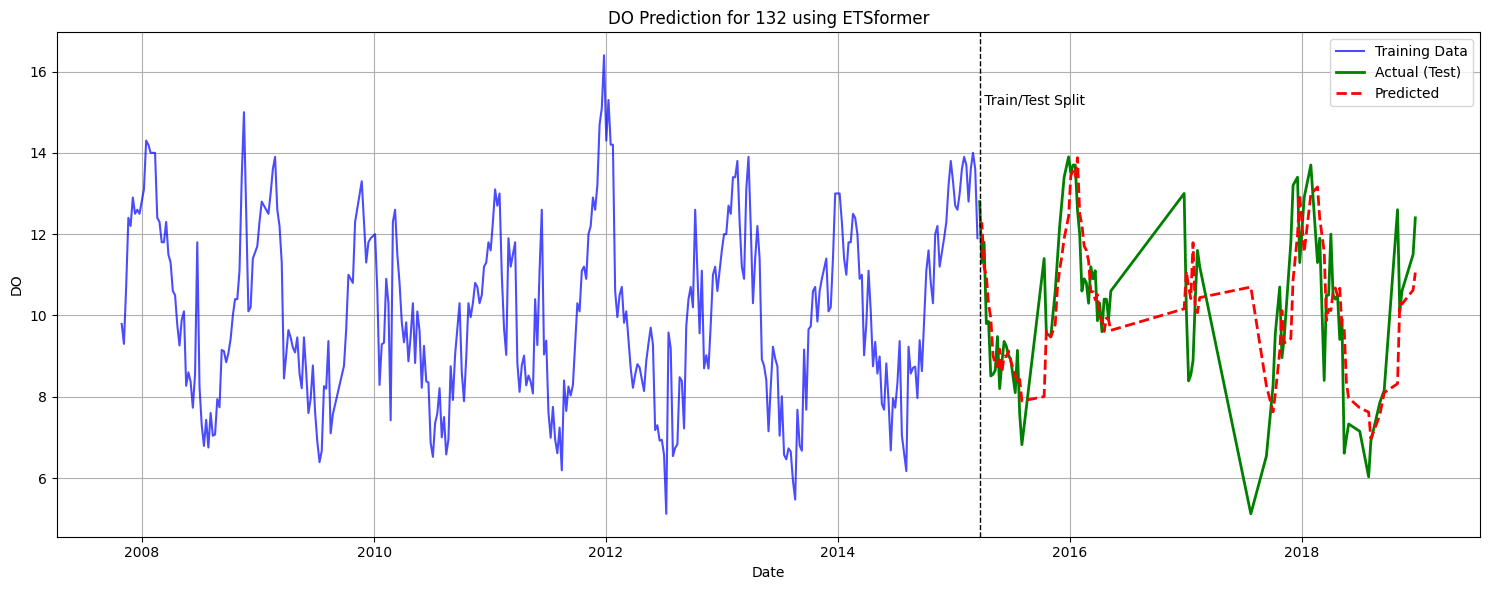

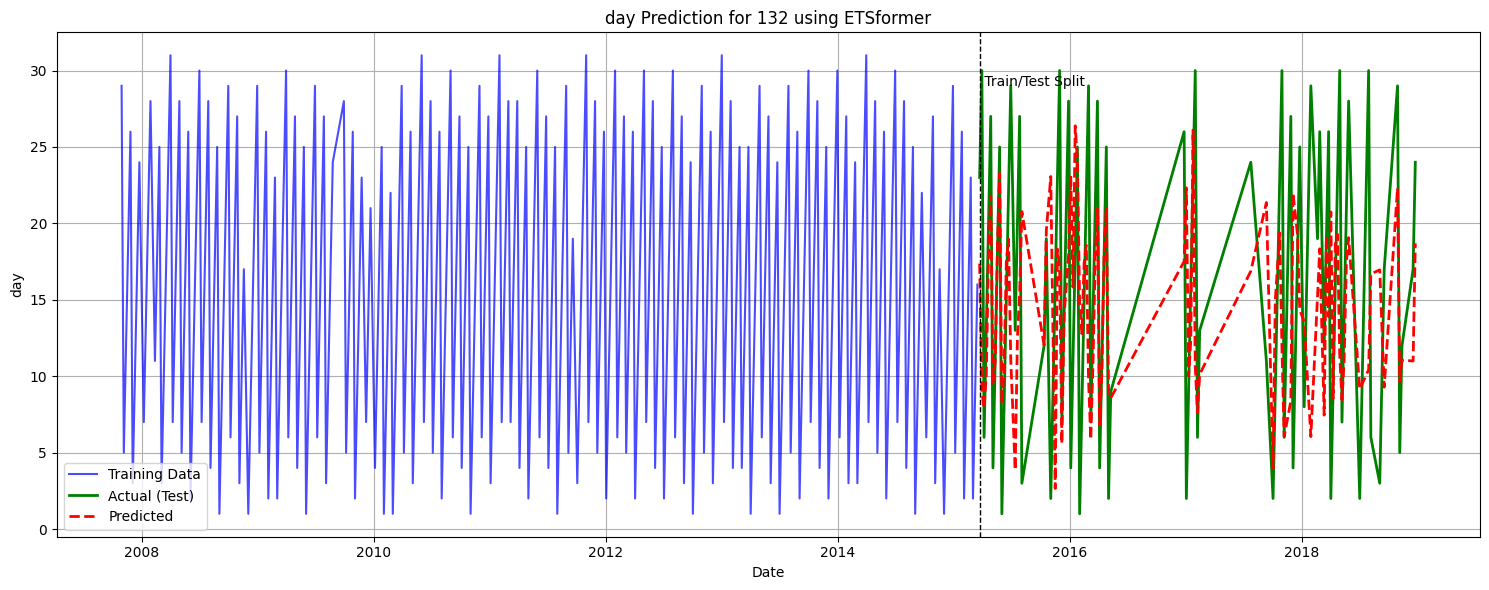

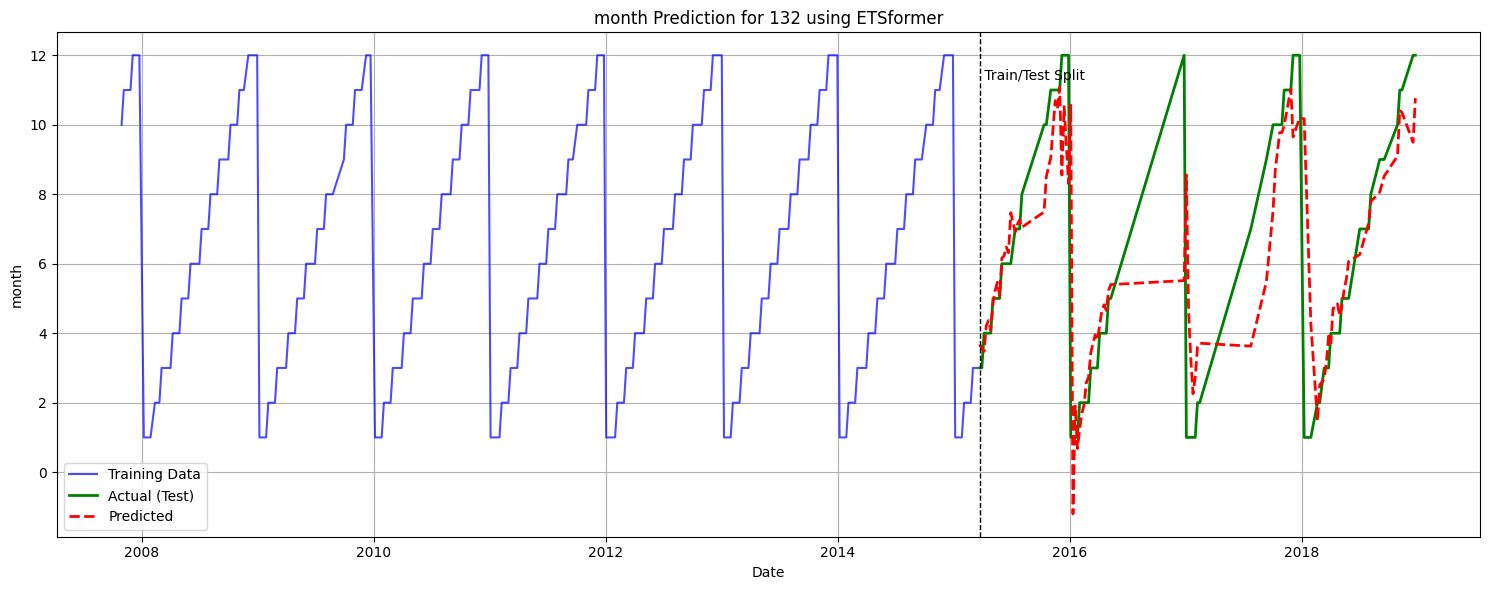

<ipython-input-43-f0cf2f07a8bb>:244: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


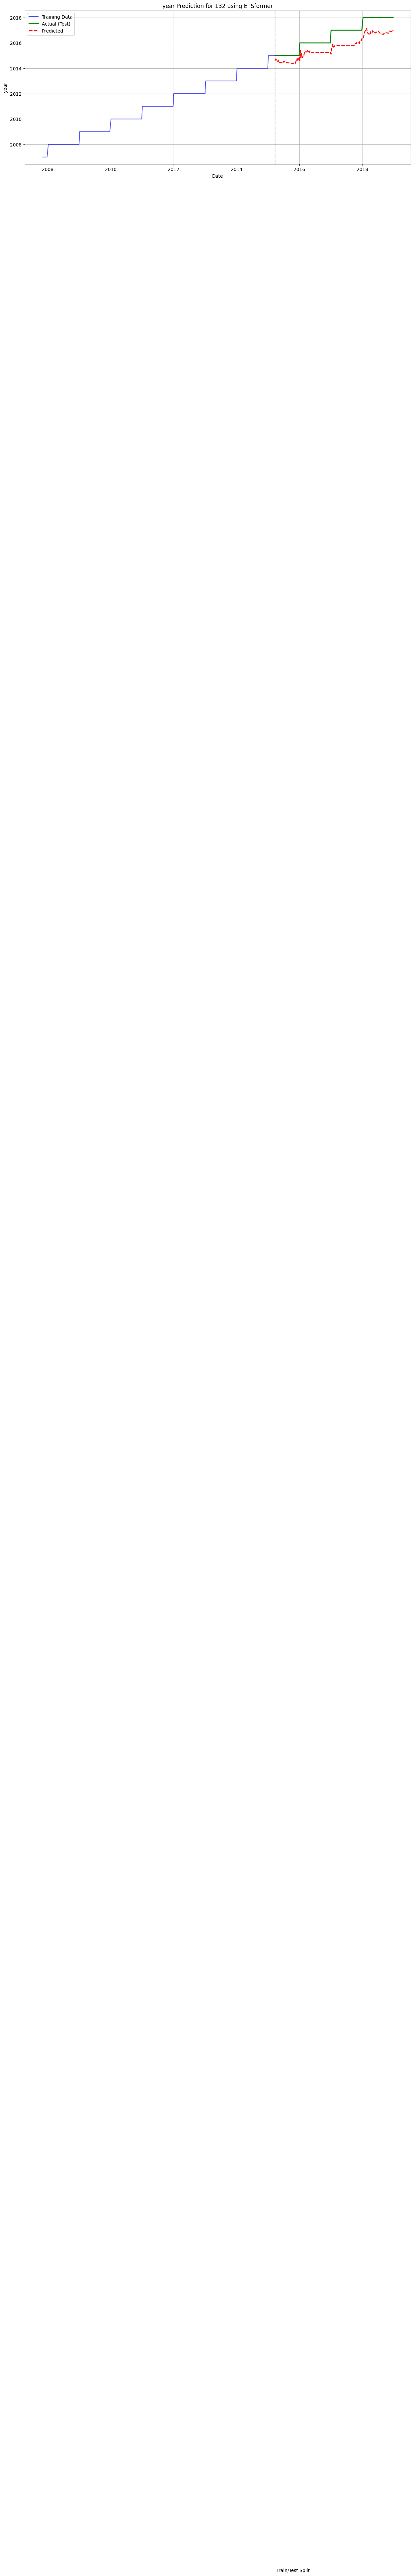

In [ ]:
# Define your features
features = ['NH4N', 'CODMn', 'pH', 'DO']

# Run the training and evaluation
results = train_etsformer_multivariate(pivot_df, features, seq_length=4, pred_length=1, epochs=120)

Parallel ETSFormer


In [81]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.fft as fft

import numpy as np
from einops import rearrange, reduce, repeat
import math, random
from typing import List, Tuple, Optional
from scipy.fftpack import next_fast_len
from einops import rearrange, reduce, repeat
import torch.fft as fft

from einops import rearrange, reduce, repeat
from scipy.fftpack import next_fast_len

class Transform:
    def __init__(self, sigma):
        self.sigma = sigma

    @torch.no_grad()
    def transform(self, x):
        return self.jitter(self.shift(self.scale(x)))

    def jitter(self, x):
        return x + (torch.randn(x.shape).to(x.device) * self.sigma)

    def scale(self, x):
        return x * (torch.randn(x.size(-1)).to(x.device) * self.sigma + 1)

    def shift(self, x):
        return x + (torch.randn(x.size(-1)).to(x.device) * self.sigma)


def conv1d_fft(f, g, dim=-1):
    N = f.size(dim)
    M = g.size(dim)

    fast_len = next_fast_len(N + M - 1)

    F_f = fft.rfft(f, fast_len, dim=dim)
    F_g = fft.rfft(g, fast_len, dim=dim)

    F_fg = F_f * F_g.conj()
    out = fft.irfft(F_fg, fast_len, dim=dim)
    out = out.roll((-1,), dims=(dim,))
    idx = torch.as_tensor(range(fast_len - N, fast_len)).to(out.device)
    out = out.index_select(dim, idx)

    return out


class ExponentialSmoothing(nn.Module):

    def __init__(self, dim, nhead, dropout=0.1, aux=False):
        super().__init__()
        self._smoothing_weight = nn.Parameter(torch.randn(nhead, 1))
        self.v0 = nn.Parameter(torch.randn(1, 1, nhead, dim))
        self.dropout = nn.Dropout(dropout)
        if aux:
            self.aux_dropout = nn.Dropout(dropout)

    def forward(self, values, aux_values=None):
        b, t, h, d = values.shape

        init_weight, weight = self.get_exponential_weight(t)
        output = conv1d_fft(self.dropout(values), weight, dim=1)
        output = init_weight * self.v0 + output

        if aux_values is not None:
            aux_weight = weight / (1 - self.weight) * self.weight
            aux_output = conv1d_fft(self.aux_dropout(aux_values), aux_weight)
            output = output + aux_output

        return output

    def get_exponential_weight(self, T):
        # Generate array [0, 1, ..., T-1]
        powers = torch.arange(T, dtype=torch.float, device=self.weight.device)

        # (1 - \alpha) * \alpha^t, for all t = T-1, T-2, ..., 0]
        weight = (1 - self.weight) * (self.weight ** torch.flip(powers, dims=(0,)))

        # \alpha^t for all t = 1, 2, ..., T
        init_weight = self.weight ** (powers + 1)

        return rearrange(init_weight, 'h t -> 1 t h 1'), \
               rearrange(weight, 'h t -> 1 t h 1')

    @property
    def weight(self):
        return torch.sigmoid(self._smoothing_weight)

class ETSEmbedding(nn.Module):
    def __init__(self, c_in, d_model, dropout=0.1):
        super().__init__()
        kernel_size = 3
        # Calculate padding to maintain sequence length: (kernel_size - 1) // 2
        padding = 1 # For kernel=3, padding=2
        self.conv = nn.Conv1d(in_channels=c_in, out_channels=d_model,
                              kernel_size=kernel_size, padding=padding, bias=False)
        self.dropout = nn.Dropout(p=dropout)
        nn.init.kaiming_normal_(self.conv.weight)

    def forward(self, x):
        # x shape: (batch, seq_len, c_in)
        x = x.permute(0, 2, 1) # Shape: (batch, c_in, seq_len)
        # Conv1d output with correct padding should have same length as input
        x = self.conv(x) # Shape: (batch, d_model, seq_len)
        # --- REMOVE THE SLICING ---
        # x = x[..., :-2] # <--- REMOVE THIS LINE
        # --- END REMOVAL ---
        x = x.transpose(1, 2) # Shape: (batch, seq_len, d_model)
        return self.dropout(x)


class Feedforward(nn.Module):
    def __init__(self, d_model, dim_feedforward, dropout=0.1, activation='sigmoid'):
        # Implementation of Feedforward model
        super().__init__()
        self.linear1 = nn.Linear(d_model, dim_feedforward, bias=False)
        self.dropout1 = nn.Dropout(dropout)
        self.linear2 = nn.Linear(dim_feedforward, d_model, bias=False)
        self.dropout2 = nn.Dropout(dropout)
        self.activation = getattr(F, activation)

    def forward(self, x):
        x = self.linear2(self.dropout1(self.activation(self.linear1(x))))
        return self.dropout2(x)

class ExponentialSmoothing(nn.Module):
    def __init__(self, dim, nhead, dropout=0.1, aux=False, identifier=""): # Added identifier
        super().__init__()
        self.nhead = max(1, nhead)
        self.dim = dim # Dimension PER HEAD
        self.identifier = identifier # Store identifier

        # --- CORRECTED INITIALIZATION ---
        self.v0 = nn.Parameter(torch.randn(1, 1, self.nhead, self.dim))
        # --- END CORRECTION ---

        # --- DEBUG PRINT ---
        # print(f"ES Init ({self.identifier}): nhead={self.nhead}, dim={self.dim}, Requested v0 last dim={self.dim}, Actual v0 shape={self.v0.shape}")
        # --- END DEBUG ---

        self._smoothing_weight = nn.Parameter(torch.randn(self.nhead, 1))
        self.dropout = nn.Dropout(dropout)
        self.aux = aux
        if aux:
            self.aux_dropout = nn.Dropout(dropout)

    def forward(self, values, aux_values=None):
        # values shape: (b, t, h, d) where d should == self.dim
        b, t, h, d = values.shape

        # --- DEBUG PRINT ---
        # print(f"ES Forward ({self.identifier}): Instance dim={self.dim}, Input values last dim (d)={d}, v0 shape={self.v0.shape}")
        if d != self.dim:
             print(f"----> ERROR: Instance dim ({self.dim}) != Input values last dim ({d}) <----")
             # This check should ideally prevent the crash later if it fails
             # raise ValueError(f"Input dimension d ({d}) does not match self.dim ({self.dim})") # Or just print
        # --- END DEBUG ---


        if d != self.dim:
             # If the check above fails, maybe return zeros to avoid crash, although the root cause needs fixing
             # print(f"----> WARNING: Dimension mismatch detected in ES ({self.identifier}). Returning zeros. <----")
             return torch.zeros_like(values)


        init_weight, weight = self.get_exponential_weight(t) # Shape: [1, t, h, 1]

        values_dropped = self.dropout(values)
        output = conv1d_fft(values_dropped, weight, dim=1) # Shape: (b, t, h, d)

        # --- DEBUG PRINT ---
        term_a = init_weight * self.v0
        # print(f"ES Forward ({self.identifier}) - Before Add: init_weight*v0 shape={term_a.shape}, output shape={output.shape}")
        # --- END DEBUG ---


        # v0 shape (1, 1, h, d), init_weight shape (1, t, h, 1)
        # init_weight * v0 broadcasts to (1, t, h, d)
        # output shape (b, t, h, d)
        output = term_a + output # Error occurs here if shapes mismatch

        if self.aux and aux_values is not None:
            # ... (auxiliary calculation part) ...
            if aux_values.shape != values.shape:
                 # This check might be important if LevelLayer's ES is somehow getting wrong aux shapes
                 print(f"----> WARNING: Aux values shape mismatch in ES ({self.identifier}) <----")
                 # raise ValueError(f"aux_values shape {aux_values.shape} must match values shape {values.shape}")
            else:
                 alpha = torch.sigmoid(self._smoothing_weight).view(1, 1, h, 1)
                 safe_denom = torch.clamp(1 - alpha, min=1e-6)
                 aux_weight = weight / safe_denom * alpha
                 aux_values_dropped = self.aux_dropout(aux_values)
                 aux_output = conv1d_fft(aux_values_dropped, aux_weight, dim=1)
                 output = output + aux_output # Add aux component
        return output

    # get_exponential_weight and weight property remain the same
    def get_exponential_weight(self, T):
        powers = torch.arange(T, dtype=torch.float, device=self.weight.device)
        init_weight = self.weight ** (powers + 1)
        weight = (1 - self.weight) * (self.weight ** torch.flip(powers, dims=(0,)))
        return rearrange(init_weight, 'h t -> 1 t h 1'), \
               rearrange(weight, 'h t -> 1 t h 1')

    @property
    def weight(self):
        return torch.sigmoid(self._smoothing_weight)

class GrowthLayer(nn.Module):
    def __init__(self, d_model, nhead, d_head=None, dropout=0.1, output_attention=False):
        super().__init__()
        # ... (other initializations) ...
        self.nhead = nhead
        self.d_head = d_head or (d_model // max(1, nhead))
        self.d_model = d_model
        # ... (value checks) ...
        self.z0 = nn.Parameter(torch.randn(self.nhead, self.d_head))
        self.in_proj = nn.Linear(self.d_model, self.d_head * self.nhead)
        self.output_attention = output_attention
        # Pass d_head as dim and an identifier
        self.es = ExponentialSmoothing(self.d_head, self.nhead, dropout=dropout, identifier="GrowthLayer_ES") # Added identifier
        self.out_proj = nn.Linear(self.d_head * self.nhead, self.d_model)
    # ... (forward method) ...
    def forward(self, inputs):
        b, t, _ = inputs.shape
        values = self.in_proj(inputs).view(b, t, self.nhead, self.d_head)
        z0_repeated = repeat(self.z0, 'h d -> b 1 h d', b=b)
        values_with_z0 = torch.cat([z0_repeated, values], dim=1)
        diffs = values_with_z0[:, 1:] - values_with_z0[:, :-1] # Shape: (b, t, h, d_head)
        smoothed_diffs = self.es(diffs) # Call ES forward
        v0_repeated = repeat(self.es.v0, '1 1 h d -> b 1 h d', b=b) # v0 now has d_head in last dim
        out_with_v0 = torch.cat([v0_repeated, smoothed_diffs], dim=1) # Shape: (b, t+1, h, d_head)
        out_reshaped = rearrange(out_with_v0, 'b time h d -> b time (h d)')
        out_final = self.out_proj(out_reshaped) # Shape: (b, t+1, d_model)

        if self.output_attention:
            _, attn_weights = self.es.get_exponential_weight(t) # Shape: [1, t, h, 1]
            attn = repeat(attn_weights, '1 t h 1 -> b t h 1', b=b)
            return out_final, attn
        return out_final, None


class LevelLayer(nn.Module):
    def __init__(self, d_model, c_out, dropout=0.1):
        super().__init__()
        self.d_model = d_model
        self.c_out = c_out

        self.es = ExponentialSmoothing(dim=1, nhead=self.c_out, dropout=dropout, aux=True, identifier="LevelLayer_ES") # Added identifier
        self.growth_pred = nn.Linear(self.d_model, self.c_out)
        self.season_pred = nn.Linear(self.d_model, self.c_out)
    # ... (forward method) ...
    def forward(self, level, growth, season):
        b, t_level, _ = level.shape # level is (b, t, c_out)
        common_t = t_level

        growth_sliced = growth[:, 1:common_t+1, :]
        season_sliced = season[:, :common_t, :]

        growth_proj = self.growth_pred(growth_sliced)
        season_proj = self.season_pred(season_sliced)

        level_reshaped = rearrange(level, 'b t h -> b t h 1')
        season_reshaped = rearrange(season_proj, 'b t h -> b t h 1')
        growth_reshaped = rearrange(growth_proj, 'b t h -> b t h 1')

        es_input = level_reshaped - season_reshaped
        level_output_reshaped = self.es(es_input, aux_values=growth_reshaped) # Call ES forward
        level_output = rearrange(level_output_reshaped, 'b t h 1 -> b t h')
        return level_output

class FourierLayer(nn.Module):

    def __init__(self, d_model, pred_len, k=None, low_freq=1, output_attention=False):
        super().__init__()
        self.d_model = d_model
        self.pred_len = pred_len
        self.k = k
        self.low_freq = low_freq
        self.output_attention = output_attention

    def forward(self, x):
        """x: (b, t, d)"""

        if self.output_attention:
            return self.dft_forward(x)

        b, t, d = x.shape
        x_freq = fft.rfft(x, dim=1)

        if t % 2 == 0:
            x_freq = x_freq[:, self.low_freq:-1]
            f = fft.rfftfreq(t)[self.low_freq:-1]
        else:
            x_freq = x_freq[:, self.low_freq:]
            f = fft.rfftfreq(t)[self.low_freq:]

        x_freq, index_tuple = self.topk_freq(x_freq)
        f = repeat(f, 'f -> b f d', b=x_freq.size(0), d=x_freq.size(2))
        f = rearrange(f[index_tuple], 'b f d -> b f () d').to(x_freq.device)

        return self.extrapolate(x_freq, f, t), None

    def extrapolate(self, x_freq, f, t):
        x_freq = torch.cat([x_freq, x_freq.conj()], dim=1)
        f = torch.cat([f, -f], dim=1)
        t_val = rearrange(torch.arange(t + self.pred_len, dtype=torch.float),
                      't -> () () t ()').to(x_freq.device)

        amp = rearrange(x_freq.abs() / t, 'b f d -> b f () d')
        phase = rearrange(x_freq.angle(), 'b f d -> b f () d')

        x_time = amp * torch.cos(2 * math.pi * f * t_val + phase)

        return reduce(x_time, 'b f t d -> b t d', 'sum')

    def topk_freq(self, x_freq):

        values, indices = torch.topk(x_freq.abs(), self.k, dim=1, largest=True, sorted=True)
        mesh_a, mesh_b = torch.meshgrid(torch.arange(x_freq.size(0)), torch.arange(x_freq.size(2)))
        index_tuple = (mesh_a.unsqueeze(1), indices, mesh_b.unsqueeze(1))
        x_freq = x_freq[index_tuple]

        return x_freq, index_tuple

    def dft_forward(self, x):
        T = x.size(1)

        dft_mat = fft.fft(torch.eye(T))
        i, j = torch.meshgrid(torch.arange(self.pred_len + T), torch.arange(T))
        omega = np.exp(2 * math.pi * 1j / T)
        idft_mat = (np.power(omega, i * j) / T).cfloat()

        x_freq = torch.einsum('ft,btd->bfd', [dft_mat, x.cfloat()])

        if T % 2 == 0:
            x_freq = x_freq[:, self.low_freq:T // 2]
        else:
            x_freq = x_freq[:, self.low_freq:T // 2 + 1]

        _, indices = torch.topk(x_freq.abs(), self.k, dim=1, largest=True, sorted=True)
        indices = indices + self.low_freq
        indices = torch.cat([indices, -indices], dim=1)

        dft_mat = repeat(dft_mat, 'f t -> b f t d', b=x.shape[0], d=x.shape[-1])
        idft_mat = repeat(idft_mat, 't f -> b t f d', b=x.shape[0], d=x.shape[-1])

        mesh_a, mesh_b = torch.meshgrid(torch.arange(x.size(0)), torch.arange(x.size(2)))

        dft_mask = torch.zeros_like(dft_mat)
        dft_mask[mesh_a, indices, :, mesh_b] = 1
        dft_mat = dft_mat * dft_mask

        idft_mask = torch.zeros_like(idft_mat)
        idft_mask[mesh_a, :, indices, mesh_b] = 1
        idft_mat = idft_mat * idft_mask

        attn = torch.einsum('bofd,bftd->botd', [idft_mat, dft_mat]).real
        return torch.einsum('botd,btd->bod', [attn, x]), rearrange(attn, 'b o t d -> b d o t')


# --- Encoder Layer (Processes one "head" input) ---
class EncoderLayer(nn.Module):
    def __init__(self, d_model, nhead, c_out, seq_len, pred_len, k, dim_feedforward=None, dropout=0.1,
                 activation='relu', layer_norm_eps=1e-5, output_attention=False):
        super().__init__()
        self.d_model = d_model
        self.nhead = nhead # nhead for internal GrowthLayer/DampingLayer head splitting
        self.c_out = c_out
        self.seq_len = seq_len
        self.pred_len = pred_len
        dim_feedforward = dim_feedforward or 4 * d_model
        self.output_attention = output_attention

        self.growth_layer = GrowthLayer(d_model, nhead, dropout=dropout, output_attention=output_attention)
        # Pass pred_len and k to FourierLayer
        self.seasonal_layer = FourierLayer(d_model, pred_len, k=k, output_attention=output_attention)
        # Pass d_model and c_out to LevelLayer
        self.level_layer = LevelLayer(d_model, c_out, dropout=dropout)

        # Feedforward and Normalization
        self.ff = Feedforward(d_model, dim_feedforward, dropout=dropout, activation=activation)
        self.norm1 = nn.LayerNorm(d_model, eps=layer_norm_eps)
        self.norm2 = nn.LayerNorm(d_model, eps=layer_norm_eps)
        self.dropout1 = nn.Dropout(dropout)
        self.dropout2 = nn.Dropout(dropout)

    def forward(self, res, level, attn_mask=None):
        # res: (b, t, d_model) - Residual from embedding/previous layer
        # level: (b, t, c_out) - Level component (raw input initially)

        # Ensure inputs are not modified if shared across parallel heads
        res_copy = res # .clone() might be needed if layers modify in-place
        level_copy = level # .clone()

        # 1. Seasonal Block
        # Input: res_copy (b, t, d_model)
        # Output: season (b, t+pred_len, d_model), season_attn
        season, season_attn = self._season_block(res_copy)
        # Residual connection: Subtract season from original seq length part of res
        # Need to slice season: [:, :self.seq_len, :]
        res_after_season = res_copy - season[:, :self.seq_len, :]

        # 2. Growth Block
        # Input: res_after_season (b, t, d_model)
        # Output: growth (b, t+1, d_model), growth_attn
        growth, growth_attn = self._growth_block(res_after_season)
        # Residual connection: Subtract growth from res_after_season
        # Need to slice growth: [:, 1:, :] to match time dimension t and exclude initial state v0
        res_after_growth = res_after_season - growth[:, 1:self.seq_len+1, :] # Match (b,t,d)
        # Normalize before FF
        res_norm1 = self.norm1(res_after_growth) # Apply norm on (res - season - growth)


        # 3. Feedforward Block
        res_ff = self.ff(res_norm1)
        # Add & Norm
        res_final = self.norm2(res_norm1 + res_ff)

        # 4. Level Block (Update Level)
        # Input: level_copy (b, t, c_out)
        # Input: growth (b, t+1, d_model) -> slice -> (b, t, d_model) needed? Check LevelLayer internal slicing
        # Input: season (b, t+pred_len, d_model) -> slice -> (b, t, d_model) needed? Check LevelLayer internal slicing
        level_updated = self.level_layer(level_copy, growth, season) # Let LevelLayer handle slicing

        # Return:
        # res_final: Updated residual for next layer/encoder output (if sequential) - Shape (b, t, d_model)
        # level_updated: Updated level component - Shape (b, t, c_out)
        # growth: Full growth component (incl. initial state) - Shape (b, t+1, d_model)
        # season: Full seasonal component (incl. prediction) - Shape (b, t+pred_len, d_model)
        # season_attn, growth_attn: Attention weights if output_attention=True
        return res_final, level_updated, growth, season, season_attn, growth_attn

    def _growth_block(self, x):
        # Growth layer expects (b, t, d_model), returns (b, t+1, d_model)
        x_out, growth_attn = self.growth_layer(x)
        # Apply dropout to the output (excluding initial state?)
        # Let's apply dropout to the whole output sequence including v0 for simplicity
        return self.dropout1(x_out), growth_attn

    def _season_block(self, x):
        # Seasonal layer expects (b, t, d_model), returns (b, t+pred_len, d_model)
        x_out, season_attn = self.seasonal_layer(x)
        return self.dropout2(x_out), season_attn


# --- Parallel Encoder (Replaces original Encoder/MultiHeadEncoder) ---
class ParallelEncoder(nn.Module):
    """
    Encoder that processes inputs in parallel across multiple 'heads',
    where each head is an independent instance of EncoderLayer.
    Assumes the number of heads (num_encoder_layers) matches the number of decoder layers.
    """
    def __init__(self, encoder_layers: List[EncoderLayer]):
        super().__init__()
        if not encoder_layers:
            raise ValueError("ParallelEncoder requires at least one EncoderLayer.")
        self.heads = nn.ModuleList(encoder_layers)
        self.num_heads = len(encoder_layers)
        # Store output_attention flag from the first layer (assuming consistent)
        self.output_attention = encoder_layers[0].output_attention

    def forward(self, res: torch.Tensor, level: torch.Tensor, attn_mask: Optional[torch.Tensor] = None) -> Tuple[List[torch.Tensor], List[torch.Tensor], List[torch.Tensor], List[Optional[torch.Tensor]], List[Optional[torch.Tensor]]]:
        """
        Forward pass for the ParallelEncoder.

        Args:
            res: Residual tensor from embedding (batch, seq_len, d_model).
            level: Initial level tensor, usually raw input (batch, seq_len, c_out).
            attn_mask: Optional attention mask (not used by ETSformer layers).

        Returns:
            all_levels: List of final level tensors [(b, t, c_out)] from each head.
            all_growths: List of growth tensors [(b, t+1, d_model)] from each head.
            all_seasons: List of season tensors [(b, t+pred_len, d_model)] from each head.
            all_season_attns: List of season attention tensors from each head.
            all_growth_attns: List of growth attention tensors from each head.
        """
        all_levels = []
        all_growths = []
        all_seasons = []
        all_season_attns = []
        all_growth_attns = []

        # Process each head independently on the *same* initial inputs
        for head_layer in self.heads:
            # Each head takes the *original* res and level.
            # EncoderLayer returns: res_final, level_updated, growth, season, season_attn, growth_attn
            # We don't need res_final from the encoder heads here.
            _, level_head, growth_head, season_head, season_attn_head, growth_attn_head = head_layer(
                res, level, attn_mask=attn_mask
            )

            # Collect outputs from this head
            all_levels.append(level_head)
            all_growths.append(growth_head)
            all_seasons.append(season_head)
            all_season_attns.append(season_attn_head) # Will be None if output_attention=False
            all_growth_attns.append(growth_attn_head) # Will be None if output_attention=False

        # Return lists of components, one item per head
        return all_levels, all_growths, all_seasons, all_season_attns, all_growth_attns


# --- Damping Layer (Used by DecoderLayer) ---
class DampingLayer(nn.Module):
    def __init__(self, pred_len, nhead, dropout=0.1):
        super().__init__()
        self.pred_len = pred_len
        self.nhead = max(1, nhead) # Ensure nhead > 0
        self._damping_factor = nn.Parameter(torch.randn(1, self.nhead)) # Shape (1, H)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # Input x: (b, 1, d_model) - Typically the last growth value
        b, _, d_model = x.shape
        # d_head calculation must match GrowthLayer's internal split
        d_head = d_model // self.nhead
        if d_head * self.nhead != d_model:
             raise ValueError(f"d_model ({d_model}) not divisible by nhead ({self.nhead}) in DampingLayer")

        # Repeat the last value for the prediction horizon
        x_repeated = repeat(x, 'b 1 d -> b t d', t=self.pred_len) # Shape: (b, pred_len, d_model)

        # Calculate damping factors
        powers = torch.arange(1, self.pred_len + 1, device=self._damping_factor.device) # 1, 2, ..., pred_len
        powers = powers.view(self.pred_len, 1) # Shape: (pred_len, 1)

        # Damping factor: sigmoid(param) -> (0, 1) range. Shape: (1, nhead)
        # Damp factor ^ powers -> Shape: (pred_len, nhead)
        damping_factors = self.damping_factor ** powers
        # Cumulative sum along time dim: Represents the forecasted growth trend contribution
        damping_factors_cumulative = damping_factors.cumsum(dim=0) # Shape: (pred_len, nhead)

        # Reshape input to align with heads: (b, pred_len, nhead, d_head)
        x_reshaped = x_repeated.view(b, self.pred_len, self.nhead, d_head)

        # Apply dropout
        x_dropped = self.dropout(x_reshaped)

        # Apply damping: Needs broadcasting (b, t, h, d) * (t, h) ->unsqueeze-> (b, t, h, d) * (t, h, 1)
        damped_x = x_dropped * damping_factors_cumulative.unsqueeze(0).unsqueeze(-1) # Shapes: (b,t,h,d) * (1,t,h,1)

        # Reshape back to (b, pred_len, d_model)
        output = damped_x.view(b, self.pred_len, d_model)

        # Return damped output and the cumulative factors for potential attention visualization
        # damping_factors_cumulative shape: (pred_len, nhead)
        return output, damping_factors_cumulative

    @property
    def damping_factor(self):
        return torch.sigmoid(self._damping_factor)


# --- Decoder Layer (Processes one head's growth/season) ---
class DecoderLayer(nn.Module):
    def __init__(self, d_model, nhead, c_out, pred_len, dropout=0.1, output_attention=False):
        super().__init__()
        self.d_model = d_model
        self.nhead = nhead # nhead for DampingLayer's internal splitting
        self.c_out = c_out
        self.pred_len = pred_len
        self.output_attention = output_attention

        # DampingLayer applies damped trend to the last growth component
        self.growth_damping = DampingLayer(pred_len, nhead, dropout=dropout)
        self.dropout1 = nn.Dropout(dropout)

    def forward(self, growth, season):
        # growth: (b, t+1, d_model) - From the corresponding encoder head's GrowthLayer
        # season: (b, t+pred_len, d_model) - From the corresponding encoder head's FourierLayer

        # 1. Growth Horizon Forecast
        # Take the last value of the growth component (represents final trend magnitude)
        last_growth_val = growth[:, -1:, :] # Shape: (b, 1, d_model)
        # Apply damping to extrapolate trend over prediction horizon
        growth_horizon, growth_damping_factors = self.growth_damping(last_growth_val) # Shapes: (b, pred_len, d_model), (pred_len, nhead)
        growth_horizon = self.dropout1(growth_horizon) # Apply dropout

        # 2. Seasonal Horizon Forecast
        # Take the predicted part of the seasonal component
        seasonal_horizon = season[:, -self.pred_len:, :] # Shape: (b, pred_len, d_model)

        # Return horizon components and damping factors
        # Note: growth_damping_factors are returned directly (not attn weights derived from them yet)
        if self.output_attention:
            return growth_horizon, seasonal_horizon, growth_damping_factors
        return growth_horizon, seasonal_horizon, None


# --- Decoder (Aggregates results from Decoder Layers) ---
class Decoder(nn.Module):
    def __init__(self, decoder_layers: List[DecoderLayer]):
        super().__init__()
        if not decoder_layers:
             raise ValueError("Decoder requires at least one DecoderLayer.")
        # Assuming all layers have consistent attributes
        self.d_model = decoder_layers[0].d_model
        self.c_out = decoder_layers[0].c_out
        self.pred_len = decoder_layers[0].pred_len
        self.nhead = decoder_layers[0].nhead # nhead used internally in layers

        self.layers = nn.ModuleList(decoder_layers)
        # Final projection from d_model to output channels (c_out)
        self.pred = nn.Linear(self.d_model, self.c_out)
        self.num_layers = len(decoder_layers) # Should match num_encoder_heads

    def forward(self, growths: List[torch.Tensor], seasons: List[torch.Tensor]):
        # growths: List [(b, t+1, d_model)] from ParallelEncoder heads
        # seasons: List [(b, t+pred_len, d_model)] from ParallelEncoder heads

        if len(growths) != self.num_layers or len(seasons) != self.num_layers:
            raise ValueError(f"Number of growths ({len(growths)}) and seasons ({len(seasons)})"
                             f" must match number of decoder layers ({self.num_layers})")

        growth_repr_list = []
        season_repr_list = []
        growth_dampings_list = [] # Collect damping factors from each layer/head

        # Process each head's output through the corresponding decoder layer
        for idx, layer in enumerate(self.layers):
            growth_horizon, season_horizon, growth_damping = layer(growths[idx], seasons[idx])
            growth_repr_list.append(growth_horizon)
            season_repr_list.append(season_horizon)
            growth_dampings_list.append(growth_damping) # Store factors (pred_len, nhead) or None

        # Aggregate results across heads/layers by summing
        # Summing assumes each head contributes additively to the final forecast
        growth_repr_sum = sum(growth_repr_list) # Shape: (b, pred_len, d_model)
        season_repr_sum = sum(season_repr_list) # Shape: (b, pred_len, d_model)

        # Project aggregated representations to the final output dimension (c_out)
        growth_final = self.pred(growth_repr_sum) # Shape: (b, pred_len, c_out)
        season_final = self.pred(season_repr_sum) # Shape: (b, pred_len, c_out)

        # Return final growth/season components and the list of damping factors
        # growth_dampings_list contains (pred_len, nhead) tensors or Nones
        return growth_final, season_final, growth_dampings_list


# --- Modified ETSformer ---
class ETSformer(nn.Module):
    def __init__(self, configs):
        super().__init__()
        self.seq_len = configs.seq_len
        self.label_len = configs.label_len # Not used in forward? Keep for consistency.
        self.pred_len = configs.pred_len
        self.output_attention = configs.output_attention
        self.configs = configs # Store configs for potential use

        # Ensure e_layers (num parallel encoder heads) matches d_layers (num decoder layers)
        if configs.e_layers != configs.d_layers:
            raise ValueError(f"Number of encoder heads (e_layers={configs.e_layers}) "
                             f"must match number of decoder layers (d_layers={configs.d_layers}) "
                             f"for this implementation.")
        self.num_heads = configs.e_layers # Or configs.d_layers

        # Embedding
        self.enc_embedding = ETSEmbedding(configs.enc_in, configs.d_model, dropout=configs.dropout)

        # Parallel Encoder: Create num_heads independent EncoderLayer instances
        self.encoder = ParallelEncoder(
            [
                EncoderLayer(
                    configs.d_model, configs.n_heads, configs.c_out, configs.seq_len, configs.pred_len, configs.K,
                    dim_feedforward=configs.d_ff,
                    dropout=configs.dropout,
                    activation=configs.activation,
                    layer_norm_eps=getattr(configs, 'layer_norm_eps', 1e-5), # Add default if needed
                    output_attention=configs.output_attention,
                ) for _ in range(self.num_heads)
            ]
        )

        # Decoder: Create num_heads independent DecoderLayer instances
        self.decoder = Decoder(
            [
                DecoderLayer(
                    configs.d_model, configs.n_heads, configs.c_out, configs.pred_len,
                    dropout=configs.dropout,
                    output_attention=configs.output_attention,
                ) for _ in range(self.num_heads)
            ],
        )

        # Optional Data Transformation (like Noisy Linear)
        if hasattr(configs, 'std') and configs.std > 0:
             self.transform = Transform(sigma=configs.std)
        else:
             self.transform = None # Or a no-op transform

    def forward(self, x_enc, x_mark_enc=None, x_dec=None, x_mark_dec=None, # Keep signature consistent
                enc_self_mask=None, dec_self_mask=None, dec_enc_mask=None,
                decomposed=False):
        # x_enc: (batch, seq_len, enc_in) - Input sequence
        # level (initial): Use x_enc directly if c_out == enc_in, otherwise need projection?
        # Let's assume c_out matches the feature dim we want to forecast, potentially a subset/projection of enc_in.
        # For simplicity, assume level input to encoder uses the raw x_enc features intended for output (c_out).
        # This requires c_out <= enc_in. If c_out != enc_in, a projection might be needed.
        # Let's assume x_enc already has shape (batch, seq_len, c_out) for the level input pathway.
        # OR modify LevelLayer to take enc_in and project internally? No, keep LevelLayer c_out focused.
        # --> We need initial level of shape (b, t, c_out). Let's use the target features from x_enc.
        # This assumes the features to be forecast (c_out) are present in x_enc.

        if x_enc.shape[-1] != self.configs.c_out:
             # print(f"Warning: x_enc features ({x_enc.shape[-1]}) != c_out ({self.configs.c_out}). Using first c_out features as initial level.")
             level_input = x_enc[:, :, :self.configs.c_out]
             if level_input.shape[-1] != self.configs.c_out:
                  raise ValueError(f"Cannot extract c_out={self.configs.c_out} features from x_enc shape {x_enc.shape}")
        else:
             level_input = x_enc # Shape: (b, t, c_out)


        # Apply transform if training and configured
        if self.training and self.transform is not None:
            x_enc_transformed = self.transform.transform(x_enc)
        else:
            x_enc_transformed = x_enc

        # 1. Embedding: (b, t, enc_in) -> (b, t, d_model)
        res = self.enc_embedding(x_enc_transformed)

        # 2. Parallel Encoder
        # Input: res (b, t, d_model), level_input (b, t, c_out)
        # Output: Lists (length num_heads) of levels, growths, seasons, attentions
        all_levels, all_growths, all_seasons, all_season_attns, all_growth_attns = self.encoder(
            res, level_input, attn_mask=enc_self_mask
        )

        # 3. Decoder
        # Input: Lists of growths, seasons
        # Output: final growth (b, pred, c_out), final season (b, pred, c_out), list of dampings
        growth_pred, season_pred, growth_dampings_list = self.decoder(all_growths, all_seasons)

        # 4. Final Prediction: Level + Growth + Season
        # We need the level component forecast. The encoder outputs updated levels (b, t, c_out) for each head.
        # How to get the final level value or forecast?
        # Option A: Average the final level value across heads: avg(levels[h][:, -1:, :])
        # Option B: Assume level persists: Use the average of the last *input* level value.
        # Option C: Use the Exponential Smoothing from LevelLayer to forecast level? (Not directly available)
        # Let's use Option A: Average the last level value from the encoder heads.
        final_levels_across_heads = [level_head[:, -1:, :] for level_head in all_levels] # List of (b, 1, c_out)
        final_level_avg = torch.stack(final_levels_across_heads).mean(dim=0) # Shape: (b, 1, c_out)

        # Combine components: Level component is constant over pred_len horizon
        preds = final_level_avg + growth_pred + season_pred # Shape: (b, pred_len, c_out)

        # --- Output Handling ---
        if decomposed:
             # Return the final components separately
            return final_level_avg.repeat(1, self.pred_len, 1), growth_pred, season_pred

        if self.output_attention:
            # Need to aggregate attention information from the lists returned by encoder/decoder.
            # Average attentions across heads.
            # Ensure tensors exist before stacking/averaging.

            valid_season_attns = [attn for attn in all_season_attns if attn is not None]
            valid_growth_attns = [attn for attn in all_growth_attns if attn is not None]
            valid_growth_dampings = [damp for damp in growth_dampings_list if damp is not None]

            # Placeholder for aggregated attentions - need precise shapes from layers
            avg_season_attn = None
            avg_growth_attn = None # Maybe combine growth_attn and damping factors?

            if valid_season_attns:
                 # Assuming season_attn from FourierLayer is (b, k, d) or similar
                 # How to best aggregate? Stacking and averaging might work if shapes are consistent.
                 try:
                      stacked_season_attns = torch.stack(valid_season_attns, dim=0) # Shape [num_heads, b, k, d] ?
                      avg_season_attn = reduce(stacked_season_attns, 'h ... -> ...', 'mean') # Average over heads
                      # Keep only pred_len relevant part? Season attn relates to input freqs.
                      # Let's return the averaged map as is.
                 except Exception as e:
                      print(f"Warning: Could not stack/average season attentions: {e}")


            # Combine growth attention (from ES weights) and damping factors?
            # growth_attn might be (b, t, h, 1). damping is (pred_len, h).
            # Difficult to combine meaningfully into a single (b, pred_len, seq_len) map.
            # Let's return the averaged growth ES weights for now.
            if valid_growth_attns:
                 try:
                      # Assuming growth_attn from GrowthLayer is (b, t, nhead, 1)
                      stacked_growth_attns = torch.stack(valid_growth_attns, dim=0) # Shape [num_heads, b, t, nhead, 1] ?
                      # Average over encoder heads (dim 0) and internal ES heads (dim 3?)
                      avg_growth_attn = reduce(stacked_growth_attns, 'h b t nh 1 -> b t', 'mean') # Average over all heads?
                      # Select pred_len part? Growth attn refers to input seq.
                      # Let's return the (b, t) map representing input importance.
                 except Exception as e:
                      print(f"Warning: Could not stack/average growth attentions: {e}")


            # Return preds and averaged attentions (or None if unavailable)
            return preds, avg_season_attn, avg_growth_attn

        # Default return: predictions only
        return preds

In [103]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def add_time_features(data):
    """
    Add time-based features (day, month, year) to the dataframe

    Args:
    data (DataFrame): DataFrame with a 'date' column

    Returns:
    DataFrame: Original dataframe with additional time features
    """
    # Make a copy to avoid modifying the original
    df = data.copy()

    # Ensure date column is datetime type
    if not pd.api.types.is_datetime64_any_dtype(df['date']):
        df['date'] = pd.to_datetime(df['date'])

    # Extract time features
    df['day'] = df['date'].dt.day
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year

    df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)
    df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

    return df
class Config:
    def __init__(self):
        self.seq_len = 24
        self.label_len = 12
        self.pred_len = 12
        self.enc_in = 4  # Number of input features (NH4N, CODMn, pH, DO)
        self.c_out = 4    # Number of output features
        self.d_model = 512
        self.n_heads = 16
        self.e_layers = 2
        self.d_layers = 2
        self.d_ff = 2048
        self.K = 1        # Top-k frequencies to keep
        self.dropout = 0.1
        self.activation = 'gelu'
        self.output_attention = False
        self.std = 0.05    # Standard deviation for data augmentation

configs = Config()
class HuberLogCoshLoss(nn.Module):
    def __init__(self, delta=1.0):
        super().__init__()
        self.delta = delta

    def forward(self, y_pred, y_true):
        error = y_true - y_pred
        return torch.mean(torch.where(
            torch.abs(error) < self.delta,
            (error ** 2) / 2,  # MSE-like behavior for small errors
            torch.log(torch.cosh(error))  # Log-Cosh behavior for large errors
        ))
def train_etsformer_multivariate(data, features, seq_length=24, pred_length=12, epochs=100):
    """
    Train an ETSformer model for multivariate time series forecasting.

    Args:
    data (DataFrame): The dataset with 'Place', 'date', and feature columns.
    features (list): Feature column names.
    seq_length (int): Sequence length for transformer input.
    pred_length (int): Prediction length.
    epochs (int): Number of training epochs.

    Returns:
    dict: A dictionary containing models and evaluation metrics for each place.
    """
    results = {}
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    if 'Place' not in data.columns or 'date' not in data.columns:
        print("Columns 'Place' and 'date' must exist in the dataset.")
        return None
    #This add time features::
    data = add_time_features(data)
    # Add the time features to the feature list
    time_features = ['day', 'month', 'year']
    features = features + time_features

    # Combine 80% of data from each location into a single training set
    train_data_list = []
    test_data_dict = {}
    for place, group in data.groupby('Place'):
        # Drop rows with missing values in selected columns
        group = group.dropna(subset=features)

        if group.shape[0] < seq_length + pred_length + 10:  # Skip locations with too few data points
            print(f"Skipping {place} due to insufficient data.")
            continue

        # Sort by date to maintain time order
        group = group.sort_values(by='date')

        # Time-based split (80% train, 20% test)
        split_idx = int(len(group) * 0.8)
        train_data_list.append(group.iloc[:split_idx])
        test_data_dict[place] = group.iloc[split_idx:]

    # Combine all training data
    train_data = pd.concat(train_data_list)

    # Extract features for training
    X_train = train_data[features].values

    # Normalize the training data
    scaler_X = StandardScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)

    # Create sequences for training
    X_train_seq, y_train_seq = create_sequences(X_train_scaled, seq_length, pred_length)

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train_seq)
    y_train_tensor = torch.FloatTensor(y_train_seq)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    # Initialize ETSformer model
    configs = Config()
    configs.seq_len = seq_length
    configs.pred_len = pred_length
    configs.enc_in = len(features)
    configs.c_out = len(features)

    model = ETSformer(configs).to(device)

    # Loss and optimizer
    criterion = HuberLogCoshLoss(delta=1.0)
    # criterion = nn.MSELoss();
    optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)

    # Training loop
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            # Forward pass
            optimizer.zero_grad()
            outputs = model(batch_X, None, None, None)
            loss = criterion(outputs, batch_y)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}')

    # Prepare for inference on individual test sets
    model.eval()

    for place, test_data in test_data_dict.items():
        # Extract features for testing
        X_test = test_data[features].values

        # Normalize the test data using the same scalers
        X_test_scaled = scaler_X.transform(X_test)

        # Create sequences from test data for prediction
        test_dates = test_data['date'].values

        # Initialize with the last sequence from training data
        input_seq = X_train_scaled[-seq_length:]

        # Recursive forecasting
        y_pred_scaled = []

        with torch.no_grad():
            for i in range(0, len(X_test_scaled), pred_length):
                # Convert sequence to tensor
                seq_tensor = torch.FloatTensor(input_seq).unsqueeze(0).to(device)

                # Predict next values
                predictions = model(seq_tensor, None, None, None).cpu().numpy()

                # Take only the predictions we need (might be less than pred_length at the end)
                current_pred_length = min(pred_length, len(X_test_scaled) - i)
                y_pred_scaled.extend(predictions[0, :current_pred_length])

                # Update input sequence with actual test values (for recursive forecasting)
                if i + pred_length < len(X_test_scaled):
                    input_seq = np.vstack((input_seq[current_pred_length:], X_test_scaled[i:i+current_pred_length]))
                else:
                    # For the last partial batch
                    remaining = len(X_test_scaled) - i
                    input_seq = np.vstack((input_seq[remaining:], X_test_scaled[i:i+remaining]))

        # Convert predictions back to original scale
        y_pred = scaler_X.inverse_transform(np.array(y_pred_scaled).reshape(-1, len(features)))

        # Actual test values
        y_test = scaler_X.inverse_transform(X_test_scaled)

        # Store results
        results[place] = {
            "model": model,
            "test_dates": test_dates,
            "predictions": y_pred,
            "actual": y_test
        }

        # Calculate evaluation metrics for each feature
        for i, feature in enumerate(features):
            mse = mean_squared_error(y_test[:, i], y_pred[:, i])
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_test[:, i], y_pred[:, i])
            r2 = r2_score(y_test[:, i], y_pred[:, i])
            mape = mean_absolute_percentage_error(y_test[:, i], y_pred[:, i])

            se_list = np.sqrt((y_test[:, i]-y_pred[:, i])**2)
            max_se = np.max(se_list)

            # Add metrics to results
            results[place][f'{feature}_metrics'] = {
                "mse": mse,
                "rmse": rmse,
                "mae": mae,
                "r2": r2,
                "mape": mape,
                "max_se": max_se
            }

            print(f"{place} - {feature}: RMSE={rmse:.3f}, MAE={mae:.3f}, R²={r2:.3f}, MAPE={mape:.3f}%", f"Max SE={max_se:.3f}")

        # Plot results for each feature
        for i, feature in enumerate(features):
            plt.figure(figsize=(15, 6))

            # Get training data for the current location
            train_data_place = train_data[train_data['Place'] == place]
            train_dates_place = train_data_place['date'].values
            train_values_place = train_data_place[features].values

            # Plot training data
            plt.plot(train_dates_place, train_values_place[:, i], 'b-', label='Training Data', alpha=0.7)

            # Plot test data
            plt.plot(test_dates, y_test[:, i], 'g-', label='Actual (Test)', linewidth=2)
            plt.plot(test_dates, y_pred[:, i], 'r--', label='Predicted', linewidth=2)

            # Add vertical line separating train and test
            split_date = test_dates[0]
            plt.axvline(x=split_date, color='k', linestyle='--', linewidth=1)
            plt.text(split_date, plt.ylim()[1]*0.9, ' Train/Test Split', ha='left', va='center')

            plt.title(f'{feature} Prediction for {place} using ETSformer')
            plt.xlabel('Date')
            plt.ylabel(feature)
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

    return results


def create_sequences(data, seq_length, pred_length):
    """
    Create input sequences and corresponding targets for time series forecasting.

    Args:
        data: numpy array of shape (timesteps, features)
        seq_length: length of input sequence
        pred_length: length of prediction sequence

    Returns:
        X: input sequences of shape (samples, seq_length, features)
        y: target sequences of shape (samples, pred_length, features)
    """
    X, y = [], []
    for i in range(len(data) - seq_length - pred_length + 1):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length:i+seq_length+pred_length])
    return np.array(X), np.array(y)

Epoch [10/120], Loss: 0.2120
Epoch [20/120], Loss: 0.2018
Epoch [30/120], Loss: 0.1998
Epoch [40/120], Loss: 0.1901
Epoch [50/120], Loss: 0.1881
Epoch [60/120], Loss: 0.1852
Epoch [70/120], Loss: 0.1796
Epoch [80/120], Loss: 0.1742
Epoch [90/120], Loss: 0.1780
Epoch [100/120], Loss: 0.1693
Epoch [110/120], Loss: 0.1717
Epoch [120/120], Loss: 0.1684
132 - NH4N: RMSE=0.114, MAE=0.063, R²=0.676, MAPE=0.364% Max SE=0.695
132 - CODMn: RMSE=0.557, MAE=0.405, R²=0.479, MAPE=0.120% Max SE=2.079
132 - pH: RMSE=0.224, MAE=0.165, R²=0.191, MAPE=0.021% Max SE=0.677
132 - DO: RMSE=1.354, MAE=0.955, R²=0.519, MAPE=0.101% Max SE=5.147
132 - day: RMSE=9.671, MAE=6.805, R²=-0.114, MAPE=1.124% Max SE=23.022
132 - month: RMSE=2.159, MAE=0.936, R²=0.653, MAPE=0.489% Max SE=10.583
132 - year: RMSE=0.366, MAE=0.286, R²=0.906, MAPE=0.000% Max SE=1.508


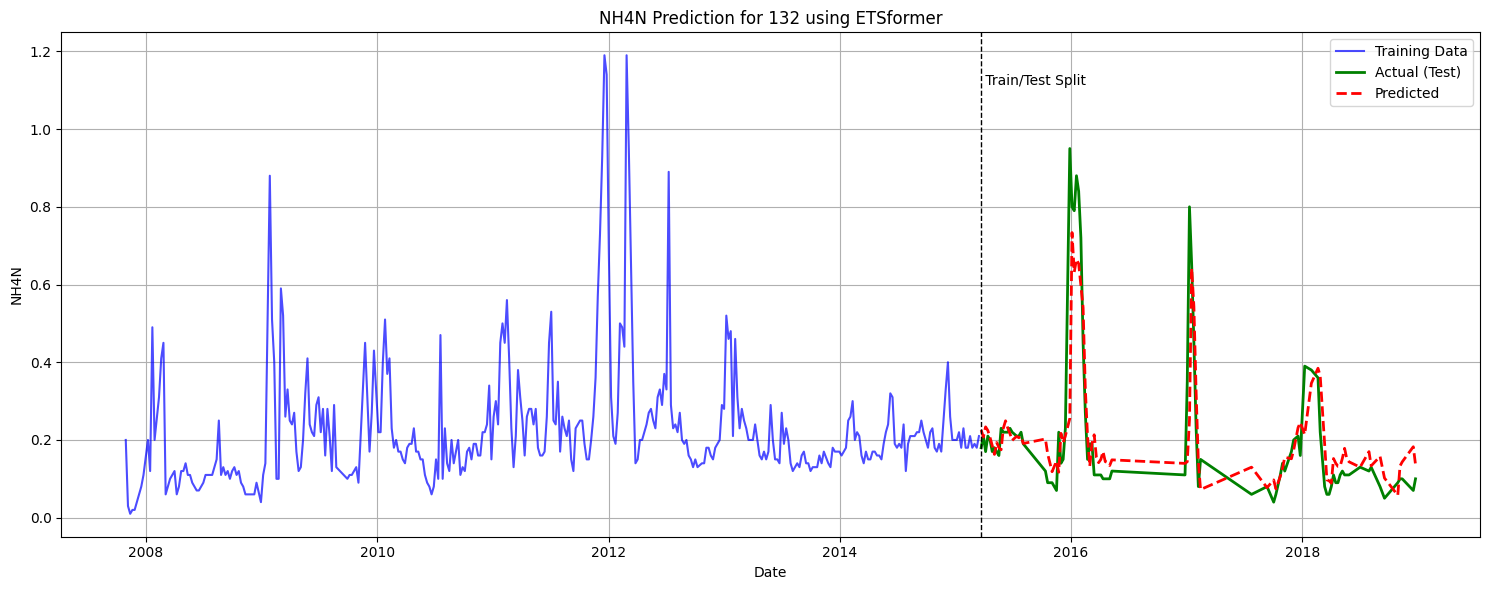

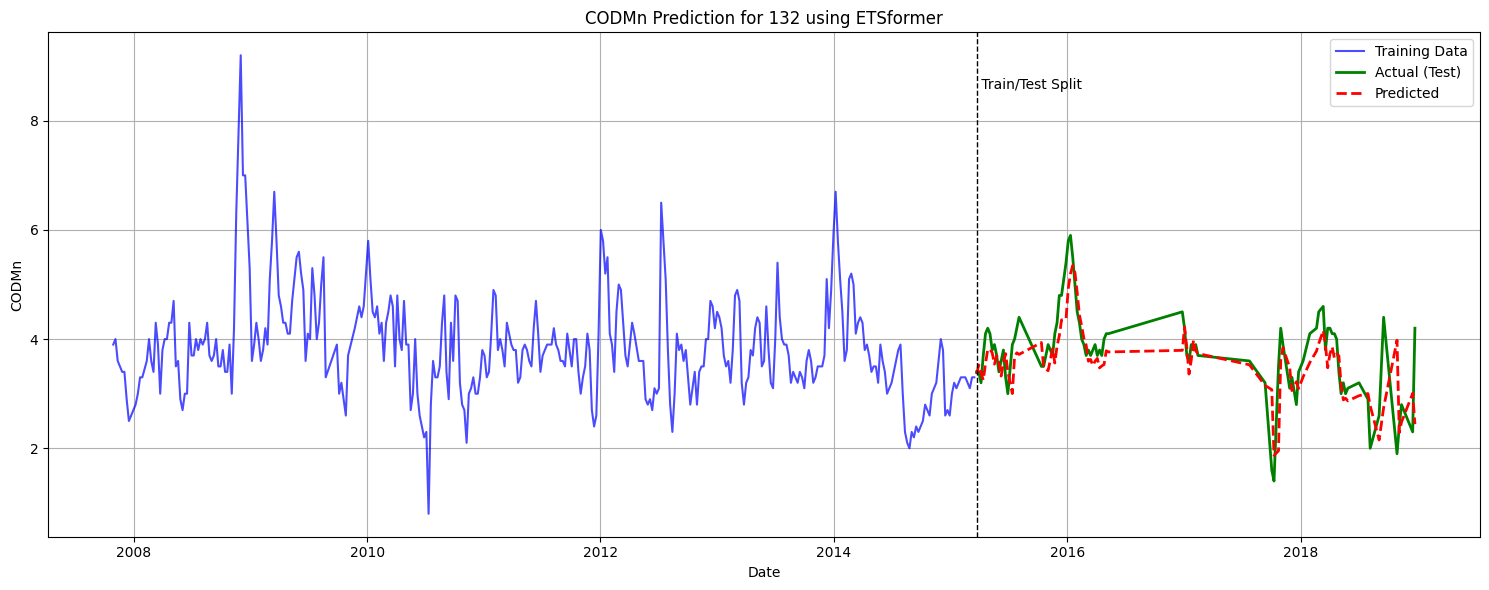

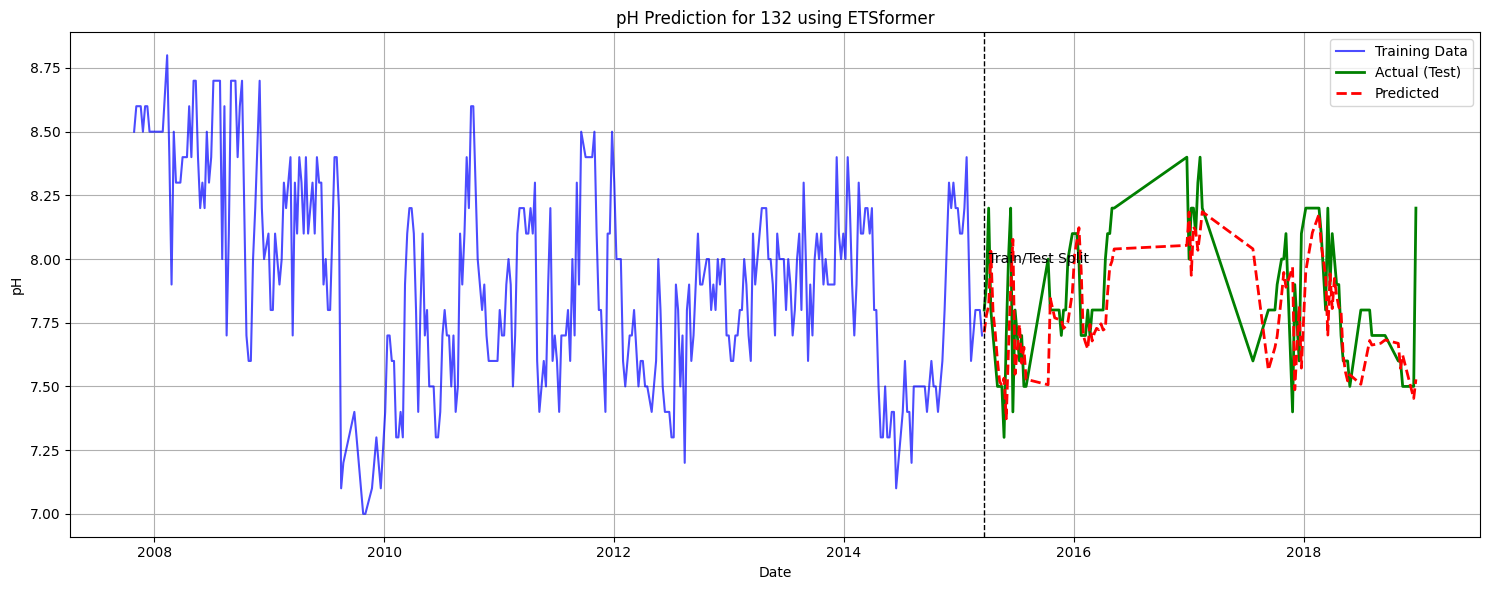

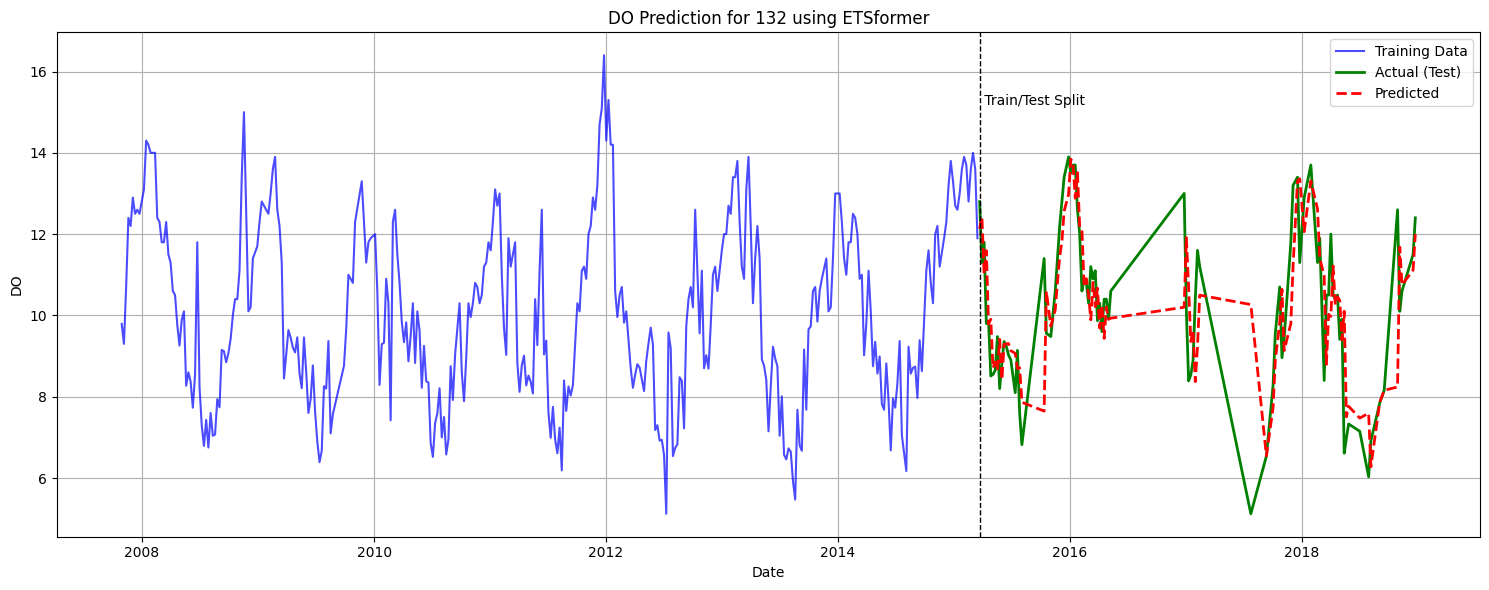

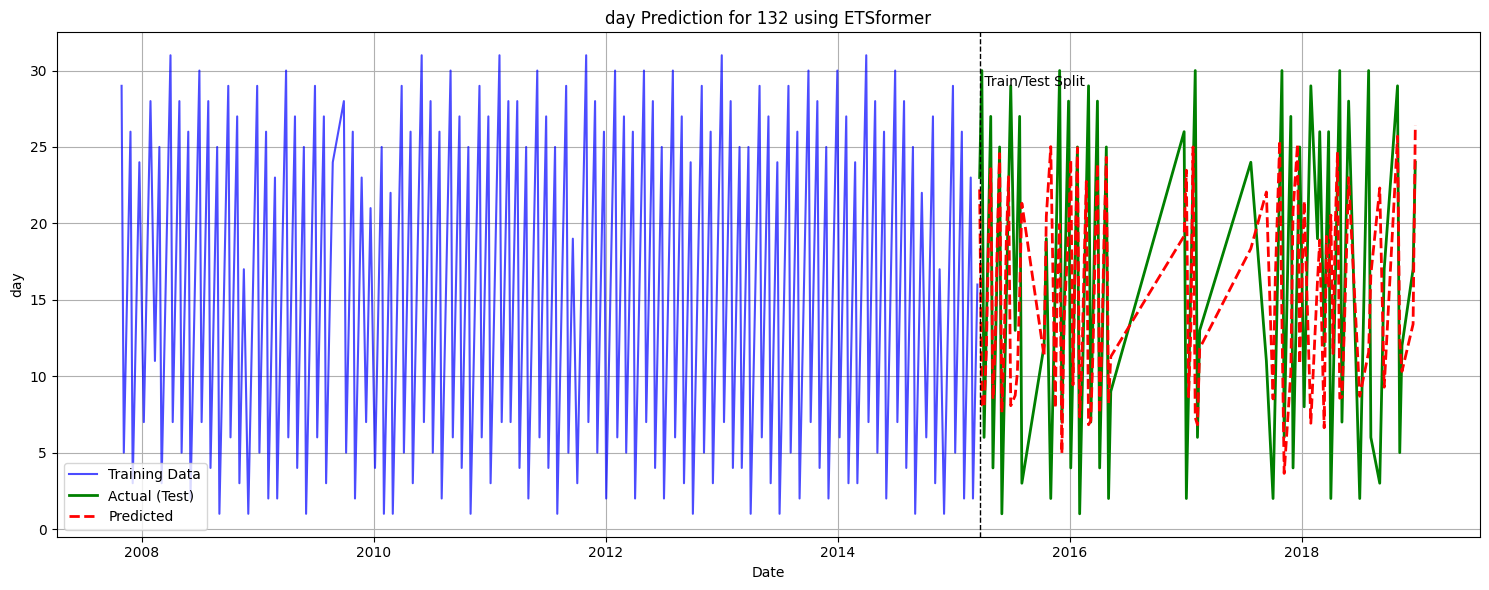

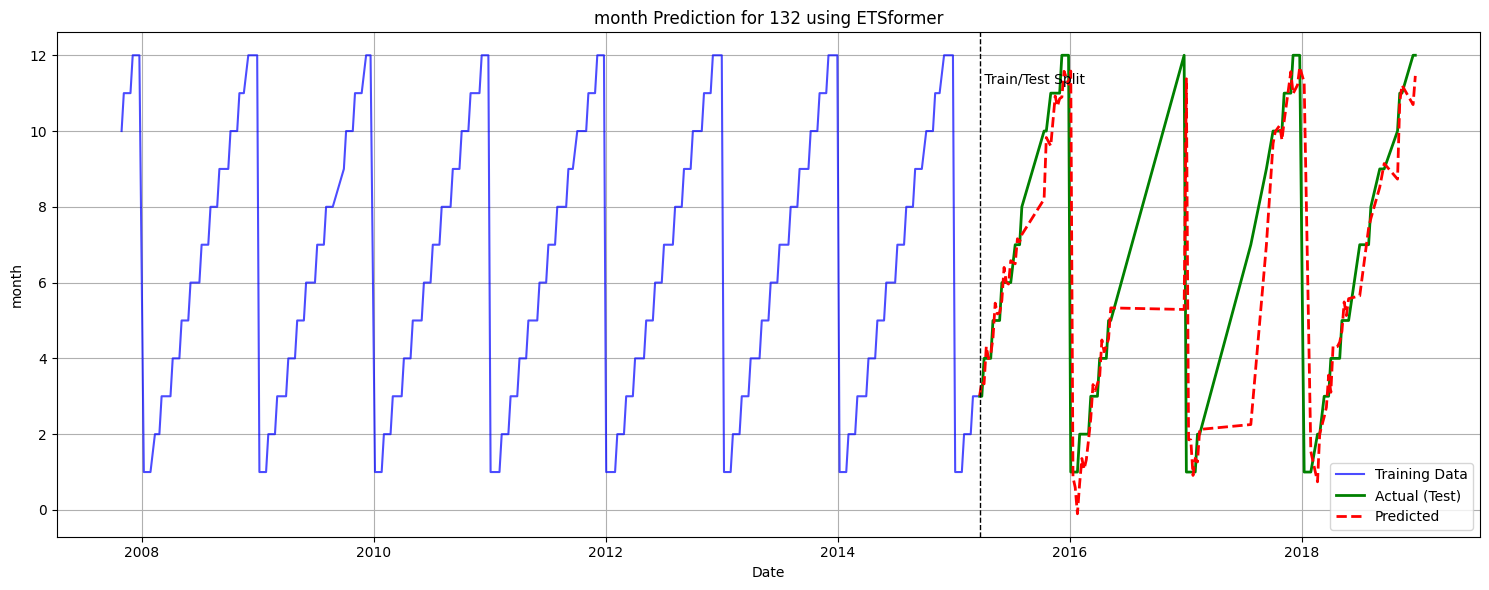

<ipython-input-103-92decd0a0801>:272: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


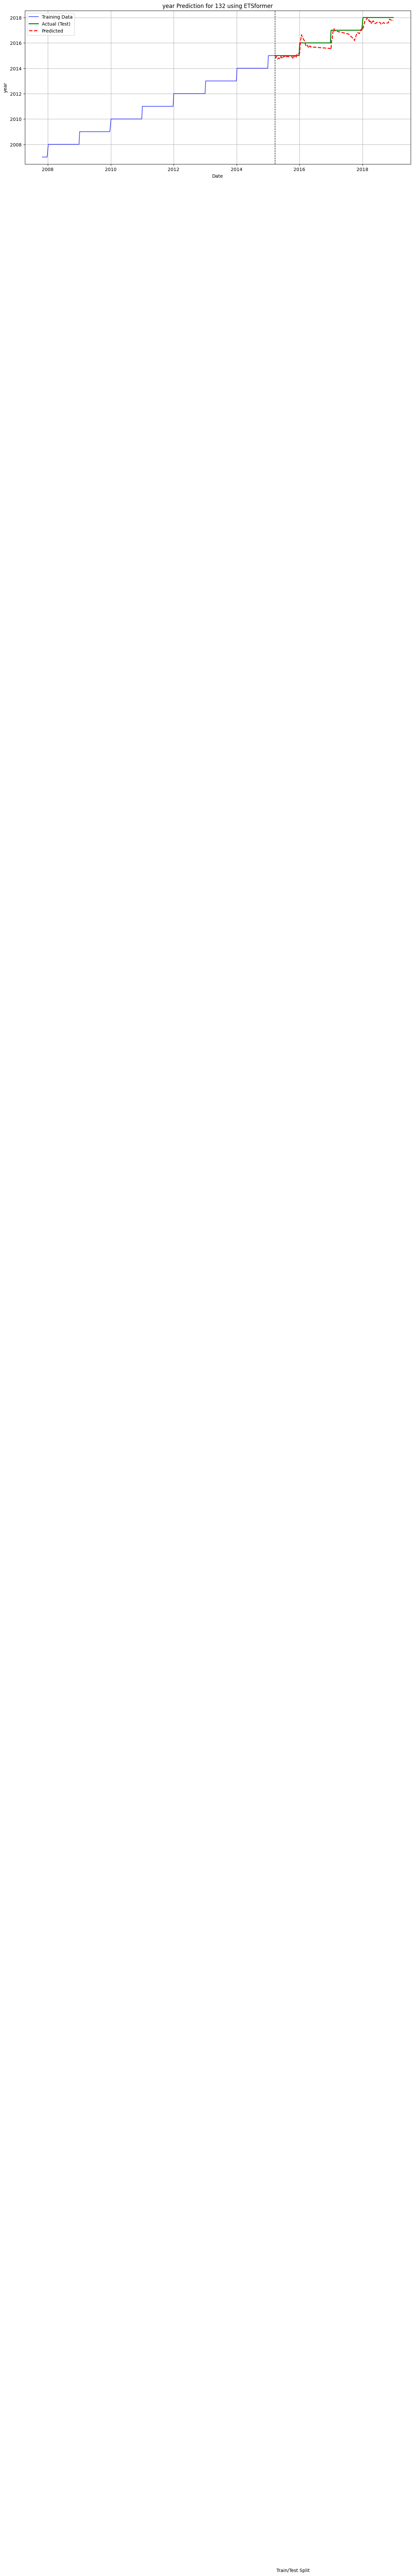

In [104]:
# Define your features
features = ['NH4N', 'CODMn', 'pH', 'DO']

# Run the training and evaluation
results = train_etsformer_multivariate(pivot_df, features, seq_length=4, pred_length=1, epochs=120)